## Introduction to Machine Learning: Applications in Economics 

Zhiyuan Chen

*Empirical Methods*

**Remin Business School**

**2025 Spring** 

## Roadmap 
- **Regression and the Best Linear Prediction Problem**
  - **Properties of Linear Regression** 
  - **Problem of Overfitting**
  - *Application: Wage Prediction*

## Foundations of Linear Regression 
### Best Linear Predictor
The **Linear Regrssion** is to find the best linear predictor of the interested dependent variable $Y$ given the independent variables $X=(X_1, X_2,\cdots,X_p)$ by minimizing the *Mean Squared Error (MSE)*:
$$
\min_{b\in\mathbb{R}^p} E [(Y - b'X)^2],
$$
* The first-order conditions imply that: $E[(Y - \beta'X)X] = 0$
* Define the error as $\epsilon = Y - \beta'X$, then we have $E(\epsilon X) = 0$
* The Best Linear Predictor (BLP) provides a simple decomposition of the dependent variable $Y$:
$$
Y = \beta'X + \epsilon,
$$

### Best Linear Approximation Property 

By the law of iterated expectations:
$$
E[(Y - \beta'X)X] = 0 \Rightarrow E[(E[Y|X]-\beta ' X)X] =0 
$$

* The BLP of $Y$ is also the BLP for the conditional expectation given $X$, $E[Y|X]$
* This motivates the use of various transformations of regressors to form $X$ 

### From BLP to Best Predictor
Let $W$ be "raw" regressors/features, *constructed regressors* are of the form:
$$
X = T(W)=(T_1(W), T_2(W), \cdots, T_p(W))'
$$
* $T(W)$ is called *dictionary* of transformations 
* E.g., polynomials, interactions terms, logarithms, etc.

The **Best Predictor** of $Y$ solves the following best prediction problem:
$$
\min_{m(W)}E[(Y - m(W))^2].
$$

* The linear predictor provides the best linear approximation to the best predictor:
 \begin{equation*}
E[(Y-b'T(W))^2] = \underbrace{E[(g(W) - b'T(W))^2]}_{\text{mean squared prediction error}} + E[(Y-g(W))^2]
\end{equation*}
> Minimizing the MSE of the linear predictor is equivalent to minimizing the mean squared approximation error!

### Example: Approximating a Smooth Function with a Polynomial Dictionary 
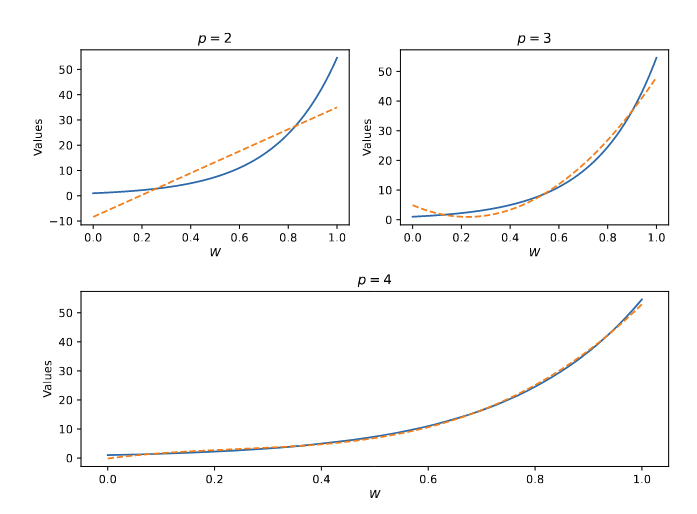

## Statistical Properties of Linear Regression 
In finite samples $(X_i, Y_i)_{i=1}^n$ are i.i.d. random variables, the Ordinary Least Squares (OLS) estimator of $\hat{\beta}$ is given by:
$$
\min_{b\in\mathbb{R}^p} \frac{1}{n}\sum_{i=1}^n (Y_i - b'X_i)^2 
$$
* The first-order condition is $\frac{1}{n}\sum_{i=1}^n (Y_i - b'X_i)X_i = 0$
* Define $\hat{\epsilon}_i:=Y_i-\hat{\beta}'X_i$, then we have 
  $$
  \frac{1}{n}\sum_{i=1}^n \hat{\epsilon}_i X_i = 0
  $$
* The key question is whether $\hat{\beta}$ estimates $\beta$ well.

### Approximation of BLP by OLS 
Intuitively, to estimate each parameter $\beta_j$ we need to have enough variation in $X_j$ (many observations per parameter) to identify the parameter, i.e., $n/p$ should be large enough 

> **Theorem**: (Approximation of BLP by OLS) Under regularity conditions, 
> $$
> \sqrt{E_x(\beta ' X-\hat{\beta}'X)^2} = \sqrt{(\hat{\beta}-\beta)'E_x(X X')(\hat{\beta}-\beta)} \\
> \leq const_p \sqrt{E(\epsilon^2)} \sqrt{\frac{p}{n}} $$
> The inequality holds with probability 1 as $n\to\infty$.

* When $p/n$ is small, the sample BLP approximates the population/true BLP well. 

### Analysis of Variance 
* The ratio of explained variation to the total variation is the **poluation $R^2$**:
$$
R_{pop}^2 = \frac{E[(\hat{\beta}'X)^2]}{E[Y^2]} = 1 -\frac{ E[\epsilon^2]}{E[Y^2]} \in [0,1]
$$
* The sample $R^2$ is defined as:
$$
R_{sample}^2 = 1 - \frac{E_n[\hat{\epsilon}^2]}{E_n[Y^2]} = 1 - \frac{E_n[\hat{\epsilon}^2]}{E_n[Y^2]} \in [0,1]
$$
 > When $p/n$ is small, $R_{sample}^2$ approximates $R_{pop}^2$ well.

### Overfitting Problem
* When $p/n$ is not small, the in-sample BLP becomes misleading 
* Consider $p=n$ and all $X_i$ are independent, we have 
  $$
  MSE_{sample}= 0 \text{ and }R^2_{sample} = 1
  $$
  no matter what $MSE_{pop}$ and $R^2_{pop}$ are. 
* With $p<n$, **adjusted $R^2$** and *adjusted MSE* are: 
  $$
  MSE_{adj} = \frac{n}{n-p} E_n[\hat{\epsilon}^2] \text{ and } R^2_{adj} = 1 - \frac{n}{n-p} \frac{E_n[\hat{\epsilon}^2]}{E_n[Y^2]}
  $$
  > $\frac{n}{n-p}$ corrects for overfitting. The intuition is that the in-sample fit increases as the number of parameters increase and potentially causes overfitting. 

In [33]:
import numpy as np
import statsmodels.api as sm
import warnings
warnings.simplefilter('ignore')

In [56]:
def regression_stats(n, p):
    np.random.seed(123)
    X = np.random.normal(size=(n, p))
    y = np.random.normal(size=(n, 1))
    R2 = sm.OLS(y, X).fit().rsquared
    R2_adj = sm.OLS(y, X).fit().rsquared_adj
    return R2, R2_adj

In [60]:
n = 1000
i = 0  
R2vec = np.zeros(7)
R2_adjvec = np.zeros(7)
# Loop over different values of p
for p in [50, 100, 200, 500, 800, 900, 1000]:
    R2, R2_adj = regression_stats(n, p)
    R2vec[i] = R2
    R2_adjvec[i] = R2_adj
    i = i + 1

Text(0.5, 1.0, 'R2 and R2_adj vs Number of Predictors')

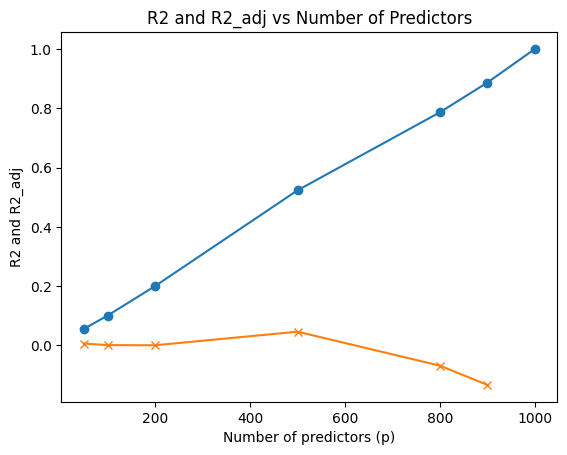

In [67]:
# plot the results
import matplotlib.pyplot as plt
plt.plot([50, 100, 200, 500, 800, 900, 1000], R2vec, "-o",label='R2')
plt.plot([50, 100, 200, 500, 800, 900, 1000], R2_adjvec,"-x", label='R2_adj')
plt.xlabel('Number of predictors (p)')
plt.ylabel('R2 and R2_adj')
plt.title('R2 and R2_adj vs Number of Predictors')

### Sample Splitting 
*Data splitting* is a common practice to measure predictive performance. The idea is as follows:
>    1. Use a **training sample** to estimate the model'
>    2. Use a **test sample** to evaluate the quality of the prediction rule, using $MSE$ and $R^2$

Formally, we define the **data splitting procedure** as:
> 1. *Randomly* partition the data into **training** and **testing** samples: $n$ observations for training and $m$ observations for testing.
> 2. Use the **training sample** to compute a prediction rule $\hat{f}(X)$. e.g., $\hat{f}(X) = \hat{\beta}'X$.
> 3. Use the **testing sample** to compute the prediction error:$MSE_{test}$ and $R^2_{test}$. 

* **Cross-validation** is a more data-efficient evaluation procedure. 
* **Stratified splitting** guarantees that the training and testing samples are similar. 

### Inference 
Let $X = (D, W')'$, where $D$ is the regressor of interest and $W$ other regressors/controls/covariates, we write the model as 
\begin{equation*}
Y = \underbrace{\beta_1 D + \beta_2 W}_{\text{predicted value}}+ \underbrace{\epsilon}_{\text{error}}
\end{equation*}
> The **Frisch-Waugh-Loveall Theorem**: 
> $$
> \beta_1 = argmin_{b1}E[(\tilde{Y}-b_1 \tilde{D})^2] =(E[\tilde{D}^2])^{-1}E[\tilde{D}\tilde{Y}]
> $$
> where $\tilde{Y}$ and $\tilde{D}$ are the residuals of $Y$ and $D$ after regressing on $W$.



> **Inference**: Under regularity conditions and if $p/n \approx 0$: 
> $$
> \sqrt{n}(\hat{\beta_1}-\beta_1) \xrightarrow{d} N(0, (E[\tilde{D}^2])^{-1}E[\tilde{D}^2\tilde{\epsilon}^2]E[\tilde{D}^2])^{-1})
> $$

* Then the 95% confidence interval can be constructed as:
$$
\left [\hat{\beta_1} - 1.96 \sqrt{\hat{V}/n} , \hat{\beta_1} + 1.96 \sqrt{\hat{V}/n}\right]
$$

## Application: Wage Prediction
In labor economics an important question is what determines the wage of workers. This is a causal question, but we could begin to investigate from a predictive perspective.

In the following wage example,  𝑌  is the `(log) hourly wage of a worker` and  𝑋  is a vector of `worker's characteristics`, e.g., education, experience, sex. Two main questions here are:

* How to use job-relevant characteristics, such as education and experience, to best predict wages?

* What is the difference in predicted wages between male and female workers with the same job-relevant characteristics?

In this lab, we focus on the prediction question first.

## Data

The data set we consider is from the March Supplement of the U.S. Current Population Survey, year 2015. 
* We select white non-hispanic individuals, aged 25 to 64 years, and working more than 35 hours per week during at least 50 weeks of the year. 
* We exclude self-employed workers; individuals living in group quarters; individuals in the military, agricultural or private household sectors; individuals with inconsistent reports on earnings and employment status; individuals with allocated or missing information in any of the variables used in the analysis; and individuals with hourly wage below  3 .

* The variable of interest  𝑌  is the (log) hourly wage rate constructed as the `ratio of the annual earnings to the total number of hours worked`, which is constructed in turn as the product of number of weeks worked and the usual number of hours worked per week. 
* Focus on single (never married) workers. The final sample is of size  $n=5150$ .

In [35]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import sklearn.linear_model as lm
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import warnings
# ignore potential convergence warnings; for some small penalty levels,
# tried out, optimization might not converge
warnings.simplefilter('ignore')

## Data Analysis

In [36]:
file = "https://raw.githubusercontent.com/CausalAIBook/MetricsMLNotebooks/main/data/wage2015_subsample_inference.csv"
df = pd.read_csv(file)
df.describe()

,wage,lwage,sex,shs,hsg,scl,clg,ad,mw,so,we,ne,exp1,exp2,exp3,exp4,occ,occ2,ind,ind2
count,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000
mean,23.410410,2.970787,0.444466,0.023301,0.243883,0.278058,0.317670,0.137087,0.259612,0.296505,0.216117,0.227767,13.760583,3.018925,8.235867,25.118038,5310.737476,11.670874,6629.154951,13.316893
std,21.003016,0.570385,0.496955,0.150872,0.429465,0.448086,0.465616,0.343973,0.438464,0.456761,0.411635,0.419432,10.609465,4.000904,14.488962,53.530225,11874.356080,6.966684,5333.443992,5.701019
min,3.021978,1.105912,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,1.000000,370.000000,2.000000
25%,13.461538,2.599837,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.250000,0.125000,0.062500,1740.000000,5.000000,4880.000000,9.000000
50%,19.230769,2.956512,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,1.000000,1.000000,1.000000,4040.000000,13.000000,7370.000000,14.000000
75%,27.777778,3.324236,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,21.000000,4.410000,9.261000,19.448100,5610.000000,17.000000,8190.000000,18.000000
max,528.845673,6.270697,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,47.000000,22.090000,103.823000,487.968100,100000.000000,22.000000,100000.000000,22.000000


### Variable Construction and Regression

We are constructing the output variable  $Y$  and the matrix  $Z$  which includes the characteristics of workers

In [37]:
Y = np.log(df['wage'])
Z = df.drop(['wage', 'lwage'], axis=1)
Z.shape

(5150, 18)

For the outcome variable (log) wage and a subset of the raw regressors, we calculate the empirical mean and other empirical measures to get familiar with the data.



In [38]:
Z.describe()

,sex,shs,hsg,scl,clg,ad,mw,so,we,ne,exp1,exp2,exp3,exp4,occ,occ2,ind,ind2
count,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000
mean,0.444466,0.023301,0.243883,0.278058,0.317670,0.137087,0.259612,0.296505,0.216117,0.227767,13.760583,3.018925,8.235867,25.118038,5310.737476,11.670874,6629.154951,13.316893
std,0.496955,0.150872,0.429465,0.448086,0.465616,0.343973,0.438464,0.456761,0.411635,0.419432,10.609465,4.000904,14.488962,53.530225,11874.356080,6.966684,5333.443992,5.701019
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,1.000000,370.000000,2.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.250000,0.125000,0.062500,1740.000000,5.000000,4880.000000,9.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,1.000000,1.000000,1.000000,4040.000000,13.000000,7370.000000,14.000000
75%,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,21.000000,4.410000,9.261000,19.448100,5610.000000,17.000000,8190.000000,18.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,47.000000,22.090000,103.823000,487.968100,100000.000000,22.000000,100000.000000,22.000000


E.g., the share of female workers in our sample is ~44% ( 𝑠𝑒𝑥=1  if female).

In [39]:
# if you want to print this table to latex
# print(Z.describe().style.to_latex())

## Prediction Question
Now, we will construct a prediction rule for hourly (log) wage  $Y$, which depends linearly on job-relevant characteristics  $X$:
$$
Y = \beta'X + \epsilon
$$
where  $X$  is a vector of characteristics of the worker, including `Female`,  `Some High School`, `High School Graduate`, `Some College`, `College Graduate`, `Advanced Degree`,  `Experience`.

Our goals are:

* Predict wages using various characteristics of workers.

* Assess the predictive performance of a given model using the (adjusted) sample MSE, the (adjusted) sample $R^2$ and the out-of-sample MSE and $R^2$.

### Measuring Prediction Quality
Toward answering the latter, we measure the prediction quality of the two models via **data splitting**:

- Randomly split the data into one training sample and one testing sample. Here we just use a simple method (stratified splitting is a more sophisticated version of splitting that we might consider).
- Use the training sample to estimate the parameters of the Basic Model and the Flexible Model.
- Before using the testing sample, we evaluate in-sample fit.


In [40]:
# split the data into train and test sets
# 80% train, 20% test   
# set random_state to ensure reproducibility
train, test = train_test_split(df, test_size=0.20, random_state=123)


We employ two different specifications for prediction:


1. **Basic Model**:   $X$ consists of a set of raw regressors (e.g. gender, experience, education indicators,  occupation and industry indicators and regional indicators).


2. **Flexible Model**:  $X$ consists of all raw regressors from the basic model plus a *dictionary of transformations** (e.g., ${exp}^2$ and ${exp}^3$) and additional two-way interactions of a polynomial in experience with other regressors. An example of a regressor created through a two-way interaction is *experience* times the indicator of having a *college degree*.

* Using the **Flexible Model** enables us to approximate the real relationship by a more complex regression model and therefore to reduce the bias. 
  
* The **Flexible Model** increases the range of potential shapes of the estimated regression function. In general, flexible models often deliver higher prediction accuracy but are harder to interpret.

## Data-Splitting: In-sample performance

Let us fit both models to our data by running ordinary least squares (ols):

In [41]:
# 1. Basic Model
model_base = 'lwage ~ sex + exp1 + shs + hsg+ scl + clg + mw + so + we + C(occ2) + C(ind2)'
base = smf.ols(model_base, data=train)
results_base = base.fit()

In [42]:
# R-squared and MSE for the basic model
rsquared_base = results_base.rsquared
rsquared_adj_base = results_base.rsquared_adj
mse_base = np.mean(results_base.resid**2)
mse_adj_base = results_base.mse_resid
print(f'Rsquared={rsquared_base:.4f}')
print(f'Rsquared_adjusted={rsquared_adj_base:.4f}')
print(f'MSE={mse_base:.4f}')
print(f'MSE_adjusted={mse_adj_base:.4f}')

Rsquared=0.3176
Rsquared_adjusted=0.3092
MSE=0.2202
MSE_adjusted=0.2229


In [43]:
# verify the formulas
X, y = base.data.exog, base.data.endog
n, p = X.shape
mse = np.mean((y - results_base.predict(X, transform=False))**2)
mse_adj = mse * n / (n - p)
rsquared = 1 - mse / np.var(y)
rsquared_adj = 1 - mse_adj / np.var(y)
print(f'Rsquared={rsquared:.4f}')
print(f'Rsquared_adjusted={rsquared_adj:.4f}')
print(f'MSE={mse:.4f}')
print(f'MSE_adjusted={mse_adj:.4f}')

Rsquared=0.3176
Rsquared_adjusted=0.3091
MSE=0.2202
MSE_adjusted=0.2229


In [44]:
# 2. Flexible Model
model_flex = ('lwage ~ sex + shs+hsg+scl+clg+C(occ2)+C(ind2)+mw+so+we '
              '+ (exp1+exp2+exp3+exp4)*(shs+hsg+scl+clg+C(occ2)+C(ind2)+mw+so+we)')
flex = smf.ols(model_flex, data=train)
results_flex = flex.fit()

In [45]:
rsquared_flex = results_flex.rsquared
rsquared_adj_flex = results_flex.rsquared_adj
mse_flex = np.mean(results_flex.resid**2)
mse_adj_flex = results_flex.mse_resid
print(f'Rsquared={rsquared_flex:.4f}')
print(f'Rsquared_adjusted={rsquared_adj_flex:.4f}')
print(f'MSE={mse_flex:.4f}')
print(f'MSE_adjusted={mse_adj_flex:.4f}')

Rsquared=0.3643
Rsquared_adjusted=0.3241
MSE=0.2051
MSE_adjusted=0.2181


In [46]:
# make a table of results for two models
results = pd.DataFrame({
    'Model': ['Baseline', 'Flexible'],
    'R2': [rsquared_base, rsquared_flex],
    'R2_adj': [rsquared_adj_base, rsquared_adj_flex],
    'MSE': [mse_base, mse_flex],
    'MSE_adj': [mse_adj_base, mse_adj_flex]
})
results = results.set_index('Model')
# print the table to html
print(results)

                R2    R2_adj       MSE   MSE_adj
Model                                           
Baseline  0.317622  0.309237  0.220187  0.222947
Flexible  0.364346  0.324146  0.205110  0.218135


### Inference
#### Impact of Gender on Wages 
**Question**: What is the difference in predicted wages between male and female workers with the same job-relevant characteristics?
we consider the following log-linear regression model

\begin{align*} \log(Y) &= \beta'X + \epsilon\\ &= \beta_1 D + \beta_2' W + \epsilon, \end{align*}
* $D$ is the indicator of being female ($1$ if female and $0$ otherwise) and the $W$'s are controls explaining variation in wages. 
* Considering transformed wages by the logarithm, we are analyzing the relative difference in the payment of male and female workers.


In [47]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
import sys
from sklearn.base import BaseEstimator
import warnings
# ignore potential convergence warnings; for some small
# penalty levels, tried out, optimization might not converge
warnings.simplefilter('ignore')

In [48]:
#descriptive statistics for wage gaps of sex
table = pd.DataFrame()
cols = ["lwage", "sex", "shs", "hsg", "scl",
        "clg", "ad", "ne", "mw", "so", "we", "exp1"]
table['Variable'] = ["Log Wage", "Sex", "Less then High School",
                     "High School Graduate", "Some College",
                     "Gollage Graduate", "Advanced Degree",
                     "Northeast", "Midwest", "South", "West", "Experience"]
table['All'] = df[cols].mean().values
table['Male'] = df[df['sex'] == 0][cols].mean().values
table['Female'] = df[df['sex'] == 1][cols].mean().values
# Show results
table

,Variable,All,Male,Female
0,Log Wage,2.970787,2.987830,2.949485
1,Sex,0.444466,0.000000,1.000000
2,Less then High School,0.023301,0.031807,0.012669
3,High School Graduate,0.243883,0.294303,0.180865
4,Some College,0.278058,0.273331,0.283967
5,Gollage Graduate,0.317670,0.293953,0.347313
6,Advanced Degree,0.137087,0.106606,0.175186
7,Northeast,0.227767,0.221950,0.235037
8,Midwest,0.259612,0.259000,0.260376
9,South,0.296505,0.298148,0.294452


In [49]:
# compute the wage difference 
table.loc[0, 'Female'] - table.loc[0, 'Male']

-0.03834473367441449

#### Unconditional Effect of Sex 
The unconditional wage gap is about  $3.8\%$ for the group of never married workers (female workers get paid less on average in our sample). 

This unconditional (predictive) effect of sex equals the coefficient  $\beta$  in the univariate ols regression of  $Y$  on  $D$ :

$$
log(Y)=\beta D+\epsilon.
$$

We verify this by running an ols regression.

In [50]:
# regression without controls with robust standard errors
nocontrol_fit = smf.ols("lwage ~ sex", data=df).fit()
nocontrol_est = nocontrol_fit.params['sex']
nocontrol_se = nocontrol_fit.HC3_se['sex']

print(f"The estimated sex coefficient is: {nocontrol_est:.4f} ")
print(f"and the corresponding robust standard error is: {nocontrol_se:.4f}")

The estimated sex coefficient is: -0.0383 
and the corresponding robust standard error is: 0.0159


#### Regression with Covariates 
We run an ols regression of  $Y$  on  $(D,W)$  to control for the effect of covariates summarized in  $W$ :

$$
log(Y)=\beta_1 D + \beta_2' W + \epsilon.
$$

Here $W$ controls for `experience`, `education`, `region`, and `occupation` and `industry indicators` plus transformations and two-way interactions.

In [51]:
# Ols regression with controls
flex = "lwage ~ sex + (exp1+exp2+exp3+exp4)*(shs+hsg+scl+clg+C(occ2)+C(ind2)+mw+so+we)"
# Note that ()*() operation in formula objects in statsmodels
# creates a formula of the sort:
#  (exp1+exp2+exp3+exp4)+ (shs+hsg+scl+clg+occ2+ind2+mw+so+we)
#  + (exp1+exp2+exp3+exp4)*(shs+hsg+scl+clg+occ2+ind2+mw+so+we)
control_fit = smf.ols(flex, data=df).fit()
control_est = control_fit.params['sex']
control_se = control_fit.HC3_se['sex']
control_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  lwage   R-squared:                       0.351
Model:                            OLS   Adj. R-squared:                  0.319
Method:                 Least Squares   F-statistic:                     10.83
Date:                Tue, 22 Apr 2025   Prob (F-statistic):          2.69e-305
Time:                        07:20:36   Log-Likelihood:                -3301.9
No. Observations:                5150   AIC:                             7096.
Df Residuals:                    4904   BIC:                             8706.
Df Model:                         245                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              3.8603      0.429      9.006      0.000       3.020       4.701
C(occ2)[T.2]           0.1613      0.130      1.244      0.214      -0.093       0.416
C(occ2)[T.3]           0.2102      0.169      1.246      0.213      -0.121       0.541
C(occ2)[T.4]           0.0709      0.184      0.386      0.700      -0.289       0.431
C(occ2)[T.5]          -0.3960      0.189     -2.100      0.036      -0.766      -0.026
C(occ2)[T.6]          -0.2311      0.187     -1.236      0.217      -0.598       0.135
C(occ2)[T.7]           0.3147      0.194      1.621      0.105      -0.066       0.695
C(occ2)[T.8]          -0.1875      0.169     -1.108      0.268      -0.519       0.144
C(occ2)[T.9]          -0.3390      0.167     -2.027      0.043      -0.667      -0.011
C(occ2)[T.10]          0.0210      0.156      0.134      0.893      -0.286       0.328
C(occ2)[T.11]         -0.6424      0.309     -2.078      0.038      -1.248      -0.036
C(occ2)[T.12]         -0.0675      0.252     -0.268      0.789      -0.562       0.427
C(occ2)[T.13]         -0.2330      0.232     -1.006      0.314      -0.687       0.221
C(occ2)[T.14]          0.2562      0.323      0.794      0.427      -0.376       0.889
C(occ2)[T.15]         -0.1939      0.260     -0.747      0.455      -0.703       0.315
C(occ2)[T.16]         -0.0551      0.147     -0.375      0.708      -0.343       0.233
C(occ2)[T.17]         -0.4156      0.136     -3.053      0.002      -0.682      -0.149
C(occ2)[T.18]         -0.4822      1.044     -0.462      0.644      -2.530       1.565
C(occ2)[T.19]         -0.2579      0.333     -0.776      0.438      -0.910       0.394
C(occ2)[T.20]         -0.3010      0.234     -1.286      0.199      -0.760       0.158
C(occ2)[T.21]         -0.4272      0.221     -1.936      0.053      -0.860       0.005
C(occ2)[T.22]         -0.8695      0.298     -2.922      0.003      -1.453      -0.286
C(ind2)[T.3]          -1.2474      0.645     -1.932      0.053      -2.513       0.018
C(ind2)[T.4]          -0.0948      0.464     -0.205      0.838      -1.004       0.814
C(ind2)[T.5]          -0.5294      0.435     -1.218      0.223      -1.381       0.323
C(ind2)[T.6]          -0.6222      0.435     -1.431      0.152      -1.474       0.230
C(ind2)[T.7]          -0.5047      0.502     -1.005      0.315      -1.490       0.480
C(ind2)[T.8]          -0.7295      0.467     -1.561      0.119      -1.646       0.187
C(ind2)[T.9]          -0.8025      0.425     -1.887      0.059      -1.636       0.031
C(ind2)[T.10]         -0.5806      0.481     -1.207      0.227      -1.523       0.362
C(ind2)[T.11]         -0.9852      0.448     -2.198      0.028      -1.864      -0.107
C(ind2)[T.12]         -0.7376      0.424     -1.738      0.082      -1.569       0.094
C(ind2)[T.13]         -1.0183      0.4

In [52]:
print(f"The estimated sex coefficient: {control_est:.4f} ")
print(f"The corresponding robust standard error: {control_se:.4f}")

The estimated sex coefficient: -0.0696 
The corresponding robust standard error: 0.0157


* The estimated regression coefficient  $\beta_1≈-0.06955$  measures how our linear prediction of wage changes if we set the sex variable  $D$  from 0 to 1, holding the controls  $W$  fixed. 

* We can call this the predictive effect (PE), as it measures the impact of a variable on the prediction we make. 
  
* The unconditional wage gap of size  4 \% for female workers increases to about  7 \% after controlling for worker characteristics.

We now show how the conditional gap and the remainder decompose the marginal wage gap into the parts explained and unexplained by the additional controls.

In [53]:
flex_without_sex = "lwage ~ (exp1+exp2+exp3+exp4)*(shs+hsg+scl+clg+C(occ2)+C(ind2)+mw+so+we)"
lm0 = smf.ols(flex_without_sex, data=df[df["sex"] == 0])
lm1 = smf.ols(flex_without_sex, data=df[df["sex"] == 1])
XX0 = lm0.exog #explantory variables beta_hat*X
y0 = lm0.endog #y_hat 
XX1 = lm1.exog
y1 = lm1.endog
# the coefficients excluding intercept and "sex"
betarest = control_fit.params[control_fit.params.index != "sex"][1:]
print("The marginal gap:", y1.mean() - y0.mean())
diff_unexplained = control_est
print("The unexplained difference: ", diff_unexplained)
diff_explained = betarest.dot(XX1.mean(0)[1:] - XX0.mean(0)[1:])
print("The explained difference:", diff_explained)
print("The sum of these differences:", diff_unexplained + diff_explained)

The marginal gap: -0.03834473367441449
The unexplained difference:  -0.06955320329684066
The explained difference: 0.031208469622388935
The sum of these differences: -0.03834473367445172


To understand the estimate, we can take average for the male and female groups:
\begin{align*}
\underbrace{E_n[Y|D=1] - E_n[Y|D=0]}_{-0.038} &= \\
\underbrace{\hat{\beta}_1}_{-0.070} + &\underbrace{\hat{\beta}'_2(E_n(W|D=1)-E_n(W|D=0))}_{0.031}
\end{align*}

* $E_n(\cdot)$ is the sample average 

### Oaxaca-Blinder Decomposition 
We can augment the original model by adding interaction of sex and other characteristics:
$$
Y = \beta_1 D + \beta_2' W + \beta_3'W\cdot D + \epsilon 
$$
This provides an alternative decomposition:

\begin{align*}
\underbrace{E_n[Y|D=1] - E_n[Y|D=0]}_{-0.038} &= \\
\underbrace{\hat{\beta}_1}_{-2.320} + \underbrace{\hat{\beta}'_2(E_n(W|D=1)-E_n(W|D=0))}_{0.002} & +\underbrace{\hat{\beta}_3' E_n[W|D=1]}_{2.280}
\end{align*}

* Attributed to difference in $W$: `0.002`
* Attributed to different predictive effect of $W$: `2.280`
* Unexplained difference: `-2.320` 

In [54]:
# The oaxaca decomposition
u1, s1, v1 = np.linalg.svd(XX1)
u0, s0, v0 = np.linalg.svd(XX0)
s1[s1 <= 1e-10] = 0
s1[s1 > 1e-10] = 1 / s1[s1 > 1e-10]
beta1 = (s1 * s1 * v1.T).dot(v1).dot(XX1.T).dot(y1)
s0[s0 <= 1e-10] = 0
s0[s0 > 1e-10] = 1 / s0[s0 > 1e-10]
beta0 = (s0 * s0 * v0.T).dot(v0).dot(XX0.T).dot(y0)
print("The marginal gap: ", y1.mean() - y0.mean())
diff_unexplained = beta1[0] - beta0[0]
print("The unexplained difference: ", diff_unexplained)
diff_endow = beta0.dot(XX1.mean(0) - XX0.mean(0))
print("The difference explained by covariates: ", diff_endow)
diff_coeff = (beta1[1:] - beta0[1:]).dot(XX1.mean(0)[1:])
print("The difference explained by interaction: ", diff_coeff)
print("The sum of these differences: ", diff_unexplained + diff_endow + diff_coeff)

The marginal gap:  -0.03834473367441449
The unexplained difference:  -2.3202078245207662
The difference explained by covariates:  0.0015954716257246097
The difference explained by interaction:  2.2802675893099984
The sum of these differences:  -0.03834476358504313


### Partialling-Out using Frisch-Waugh-Lovell Theorem 

We can partial-out the linear effect of the controls via OLS through the following procedures:
1. Regress $Y$ on the controls $W$ to get $\tilde{Y}$;
   
2. Regress $X$ on the controls $W$ to get $\tilde{X}$;

3. Regress $\tilde{Y}$ on $\tilde{X}$

In [68]:
# Partialling-Out using ols
# models
flex_y = "lwage ~  (exp1+exp2+exp3+exp4)*(shs+hsg+scl+clg+C(occ2)+C(ind2)+mw+so+we)"  # model for Y
flex_d = "sex ~ (exp1+exp2+exp3+exp4)*(shs+hsg+scl+clg+C(occ2)+C(ind2)+mw+so+we)"  # model for D
# partialling-out the linear effect of W from Y
t_Y = smf.ols(flex_y, data=df).fit().resid
# partialling-out the linear effect of W from D
t_D = smf.ols(flex_d, data=df).fit().resid
# regression of Y on D after partialling-out the effect of W
partial_fit = sm.OLS(t_Y, t_D).fit()
partial_est = partial_fit.params['x1']
print("Coefficient for D via partialling-out " + str(partial_est))
# standard error
partial_se = partial_fit.HC3_se['x1']
# confidence interval
print("95% CI: " + str(partial_fit.conf_int().values[0]))

Coefficient for D via partialling-out -0.06955320329684576
95% CI: [-0.09866859 -0.04043781]


In [69]:
print(f"The estimated sex coefficient is {partial_est:.4f} "
      f"and the corresponding robust standard error is {partial_se:.4f}")

The estimated sex coefficient is -0.0696 and the corresponding robust standard error is 0.0150


* The estimated coefficient measures the linear predictive effect (PE) of  $D$  on  $Y$  after taking out the linear effect of  $W$  on both of these variables.
  
* The partialling-out approach works well when the dimension of $W$ is low in relation to the sample size  $n$ . When the dimension of  $W$  is relatively high, we need to use variable selection or penalization for regularization purposes.

### OLS Overfitting Problem

We try an "extra" flexible model, where we take interactions of all controls, giving us about 1000 controls. To illustrate how OLS can overfit, we subset to the first 1000 observations so that $p \approx n$.

In [72]:
subset, test = train_test_split(df, train_size=1000, random_state=2724)
# model
extraflex = "lwage ~ sex + (exp1+exp2+exp3+exp4+shs+hsg+scl+clg+C(occ2)+C(ind2)+mw+so+we)**2"
control_fit_extra = smf.ols(extraflex, data=subset).fit()
control_extra_est = control_fit_extra.params['sex']
R2 = control_fit_extra.rsquared
R2_adj = control_fit_extra.rsquared_adj
n = subset.shape[0]
p = control_fit_extra.params.shape[0]
# Jackknife. Python regularizes in the background. Theory shouldn't really work here.
# Cattaneo, Jannson, and Newey (2018) (CJN) do verify that jackknife is valid,
# in the sense of being upward biased, in high-dimensional settings under
# regularity.
control_extra_se = control_fit_extra.HC3_se["sex"]
# HC0 will not work here. CJN show it is inconsistent even
# in moderate dimensional settings.
control_extra_se_HC0 = control_fit_extra.HC0_se["sex"]
# We should probably implement Cattaneo, Jannson, and Newey (2018)'s procedure -
# though it's not clear their regularity conditions would apply here anyway.
print("Number of Extra-Flex Controls: " + str(p - 1))
print("Coefficient of sex with extra flex controls: " + str(control_extra_est))
print("R-squared: " + str(R2))
print("R-squared adjusted: " + str(R2_adj))

Number of Extra-Flex Controls: 979
Coefficient of sex with extra flex controls: -0.0735508763751175
R-squared: 0.7607517491390923
R-squared adjusted: 0.3791973958180602


### Re-estimating the flexible model using Lasso
We re-estimate the flexible model using **Lasso** (the least absolute shrinkage and selection operator) rather than ols.
*  Lasso is a penalized regression method that can be used to reduce the complexity of a regression model when the ratio $p/n$ is not small.  


* We use the `statsmodels` package with the formula `api` for uniformity in feature construction and the `sklearn Lasso` with cross-validation to tune the regularization hyperparameter.

In [55]:
# Lasso with cross-validation
X = flex.data.exog[:, 1:]  # exclude the intercept; we don't want the lasso to penalize the intercept
y = flex.data.endog

# train model using Lasso with cross validation and variable normalization
lasso = Pipeline([('scale', StandardScaler()),  # standardize the variables
                  ('lasso', lm.LassoCV())])
lasso.fit(X, y)

AttributeError: 'str' object has no attribute 'data'

In [ ]:
# verify the formulas
n, p = X.shape
p += 1
mse_lasso = np.mean((y - lasso.predict(X))**2)
mse_adj_lasso = mse_lasso * n / (n - p)
rsquared_lasso = 1 - mse_lasso / np.var(y)
rsquared_adj_lasso = 1 - mse_adj_lasso / np.var(y)
print(f'Rsquared={rsquared_lasso:.4f}')
print(f'Rsquared_adjusted={rsquared_adj_lasso:.4f}')
print(f'MSE={mse_lasso:.4f}')
print(f'MSE_adjusted={mse_adj_lasso:.4f}')

In [ ]:
# store the results in a table
res_df = pd.DataFrame()

res_df['Model'] = ['Basic reg', 'Flexible reg', 'Flexible Lasso']

res_df['p'] = [results_base.params.shape[0],
               results_flex.params.shape[0],
               results_flex.params.shape[0]]

res_df['R2'] = [rsquared_base, rsquared_flex, rsquared_lasso]
res_df['MSE'] = [mse_base, mse_flex, mse_lasso]

res_df['adj_R2'] = [rsquared_adj_base, rsquared_adj_flex, rsquared_adj_lasso]
res_df['adj_MSE'] = [mse_adj_base, mse_adj_flex, mse_adj_lasso]

# Show results
res_df.head()

In [ ]:
# print to Latex
print(res_df.style.to_latex())

Considering the measures above, the flexible model performs slightly better than the basic model.

As $p/n$ is not large, the discrepancy between the adjusted and unadjusted measures is not large. However, if it were, we might still like to apply **data splitting** as a more general procedure to deal with potential overfitting if $p/n$. We illustrate the approach in the following.

## Data Splitting: Out-of-sample performance

Now that we have seen in-sample fit, we evaluate our models on the out-of-sample performance:
- Use the testing sample for evaluation. Predict the $\mathtt{wage}$  of every observation in the testing sample based on the estimated parameters in the training sample.
- Calculate the Mean Squared Prediction Error $MSE_{test}$ based on the testing sample for both prediction models.


In [ ]:
# We will use smf.ols just to get the full data frame and sm.OLS to
# test out of sample for convenience
# This is because predict is a bit tricky with smf.ols out of sample.
tmp = smf.ols(model_base, data=df)  # just to extract df, not actually using this model
X_full = tmp.data.exog
y_full = tmp.data.endog
X_train, X_test, y_train, y_test = train_test_split(X_full, y_full, test_size=.2, shuffle=True)

In [ ]:
# estimating the parameters in the training sample
regbasic = sm.OLS(y_train, X_train).fit()

# predict out of sample
yhat_reg_base = regbasic.predict(X_test)

# calculating out-of-sample MSE
MSE_test1 = sum((y_test - yhat_reg_base)**2) / y_test.shape[0]
R2_test1 = 1. - MSE_test1 / np.var(y_test)

print("Test MSE for the basic model: " + str(MSE_test1))
print("Test R2 for the basic model: " + str(R2_test1))

In the basic model, the  $𝑀𝑆𝐸_{𝑡𝑒𝑠𝑡}$  is quite closed to the  $𝑀𝑆𝐸_{𝑠𝑎𝑚𝑝𝑙𝑒}$.

In [ ]:
# We will use smf.ols just to get the full data frame and sm.OLS to test out of sample for convenience
# This is because predict is a bit tricky with smf.ols out of sample.
tmp = smf.ols(model_flex, data=df)  # just to extract df, not actually using this model
X_full = tmp.data.exog
y_full = tmp.data.endog
X_train, X_test, y_train, y_test = train_test_split(X_full, y_full, test_size=.2, shuffle=True)

# estimating the parameters in the training sample
regflex = sm.OLS(y_train, X_train).fit()

# predict out of sample
yhat_reg_flex = regflex.predict(X_test)

# calculating out-of-sample MSE
MSE_test2 = np.mean((y_test - yhat_reg_flex)**2)
R2_test2 = 1. - MSE_test2 / np.var(y_test)

print("Test MSE for the flexible model: " + str(MSE_test2))
print("Test R2 for the flexible model: " + str(R2_test2))

In the flexible model, the discrepancy between the  $𝑀𝑆𝐸_{𝑡𝑒𝑠𝑡}$  and the  $𝑀𝑆𝐸_{𝑠𝑎𝑚𝑝𝑙𝑒}$  is not large.

It is worth to notice that the  $𝑀𝑆𝐸_{𝑡𝑒𝑠𝑡}$  vary across different data splits. Hence, it is a good idea average the out-of-sample MSE over different data splits to get valid results.

Nevertheless, we observe that, based on the out-of-sample  $𝑀𝑆𝐸$ , the basic model using ols regression performs is about as well (or slightly better) than the flexible model.

Next, let us use lasso regression in the flexible model instead of ols regression. Note that the out-of-sample  𝑀𝑆𝐸  on the test sample can be computed for any other black-box prediction method as well. Thus, let us finally compare the performance of lasso regression in the flexible model to ols regression.

In [ ]:
# train model using Lasso with cross validation and variable normalization
lasso = Pipeline([('scale', StandardScaler()),  # standardize the variables
                  ('lasso', lm.LassoCV())])
lasso.fit(X_train[:, 1:], y_train)

# predict out of sample
yhat_test_lasso = lasso.predict(X_test[:, 1:])

# calculating out-of-sample MSE
MSE_test3 = np.mean((y_test - yhat_test_lasso)**2)
R2_test3 = 1. - MSE_test3 / np.var(y_test)

print("Test MSE for the basic model: " + str(MSE_test3))
print("Test R2 for the basic model: " + str(R2_test3))

In [ ]:
# store the results in a table
res_df2 = pd.DataFrame()

res_df2['Model'] = ['Basic reg', 'Flexible reg', 'Flexible Lasso']

res_df2['$MSE_{test}$'] = [MSE_test1, MSE_test2, MSE_test3]
res_df2['$R^2_{test}$'] = [R2_test1, R2_test2, R2_test3]

# Show results
res_df2.head()

In [ ]:
# print to Latex
print(res_df2.style.to_latex())

## Extra flexible model and Overfitting
Given the results above, it is not immediately clear why one would choose to use Lasso as results are fairly similar. To motivate, we consider an extra flexible model to show how OLS can overfit significantly to the in-sample train data and perform poorly on the out-of-sample testing data.



In [ ]:
# Extra Flexible Model
model_extra = ('lwage ~ sex + (exp1+exp2+exp3+exp4+shs+hsg+scl+clg+C(occ2)+C(ind2)+mw+so+we)**2')
tmp = smf.ols(model_extra, data=df)  # just to extract df, not actually using this model

# In-sample fit
insamplefit = tmp.fit()
rsquared_ex = insamplefit.rsquared
rsquared_adj_ex = insamplefit.rsquared_adj
mse_ex = np.mean(insamplefit.resid**2)
mse_adj_ex = insamplefit.mse_resid
print(f'(In-sample) Rsquared={rsquared_ex :.4f}')
print(f'(In-sample) Rsquared_adjusted={rsquared_adj_ex :.4f}')
print(f'(In-sample) MSE={mse_ex :.4f}')
print(f'(In-sample) MSE_adjusted={mse_adj_ex:.4f}')

# Train test Split
X_full = tmp.data.exog
y_full = tmp.data.endog
X_train, X_test, y_train, y_test = train_test_split(X_full, y_full, test_size=.2, shuffle=True)

# estimating the parameters in the training sample
regextra = sm.OLS(y_train, X_train).fit()

# predict out of sample
yhat_reg_extra = regextra.predict(X_test)

# calculating out-of-sample MSE
MSE_test4 = np.mean((y_test - yhat_reg_extra)**2)
R2_test4 = 1. - MSE_test4 / np.var(y_test)

print("Test MSE for the flexible model: " + str(MSE_test4))
print("Test R2 for the flexible model: " + str(R2_test4))

As we can see, a simple OLS overfits when the dimensionality of covariates is high, as the out-of-sample performance suffers dramatically in comparison to the in-sample performance.

Contrast this with Lasso:

In [ ]:
np.sum(lasso.named_steps['lasso'].coef_ != 0)

In [ ]:
# train model using Lasso with cross validation and variable normalization
lasso = Pipeline([('scale', StandardScaler()),  # standardize the variables
                  ('lasso', lm.LassoCV())])
lasso.fit(X_train[:, 1:], y_train)

# predict in sample
yhat_train_lasso = lasso.predict(X_train[:, 1:])

# Calculate R-squared
R2_L = 1 - np.sum((yhat_train_lasso - y_train)**2) / np.sum((y_train - np.mean(y_train))**2)

# Calculate adjusted R-squared
pL = np.sum(lasso.named_steps['lasso'].coef_ != 0)
ntrain = len(X_train)
baseline = np.sum((y_train - np.mean(y_train))**2) / (ntrain - 1)
R2_adjL = 1 - (np.sum((yhat_train_lasso - y_train)**2) / (ntrain - pL - 1)) / baseline

# Calculate Mean Squared Error (MSE)
lasso_res = y_train - yhat_train_lasso
MSEL = np.mean(lasso_res**2)

# Calculate adjusted MSE
MSE_adjL = (ntrain / (ntrain - pL - 1)) * MSEL

# Print the results
print("R-squared for the lasso with the extra flexible model (in-sample):", R2_L)
print("Adjusted R-squared for the extra flexible model (in-sample):", R2_adjL)
print("MSE for the lasso with the extra flexible model (in-sample):", MSEL)
print("Adjusted MSE for the lasso with the extra flexible model (in-sample):", MSE_adjL)

# predict out of sample
yhat_test_lasso = lasso.predict(X_test[:, 1:])

# calculating out-of-sample MSE
MSE_test5 = np.mean((y_test - yhat_test_lasso)**2)
R2_test5 = 1. - MSE_test5 / np.var(y_test)

print("Test MSE for the basic model: " + str(MSE_test5))
print("Test R2 for the basic model: " + str(R2_test5))

As shown above, the overfitting effect is mitigated with the penalized regression model.

## Introduction to Machine Learning: Applications in Economics 

Zhiyuan Chen

*Empirical Methods*

**Remin Business School**

**2025 Spring** 

## Roadmap 
- **Regression and the Best Linear Prediction Problem**
  - **Properties of Linear Regression** 
  - **Problem of Overfitting**
  - *Application: Wage Prediction*
- 

## Foundations of Linear Regression 
### Best Linear Predictor
The **Linear Regrssion** is to find the best linear predictor of the interested dependent variable $Y$ given the independent variables $X=(X_1, X_2,\cdots,X_p)$ by minimizing the *Mean Squared Error (MSE)*:
$$
\min_{b\in\mathbb{R}^p} E [(Y - b'X)^2],
$$
* The first-order conditions imply that: $E[(Y - \beta'X)X] = 0$
* Define the error as $\epsilon = Y - \beta'X$, then we have $E(\epsilon X) = 0$
* The Best Linear Predictor (BLP) provides a simple decomposition of the dependent variable $Y$:
$$
Y = \beta'X + \epsilon,
$$

### Best Linear Approximation Property 

By the law of iterated expectations:
$$
E[(Y - \beta'X)X] = 0 \Rightarrow E[(E[Y|X]-\beta ' X)X] =0 
$$

* The BLP of $Y$ is also the BLP for the conditional expectation given $X$, $E[Y|X]$
* This motivates the use of various transformations of regressors to form $X$ 

### From BLP to Best Predictor
Let $W$ be "raw" regressors/features, *constructed regressors* are of the form:
$$
X = T(W)=(T_1(W), T_2(W), \cdots, T_p(W))'
$$
* $T(W)$ is called *dictionary* of transformations 
* E.g., polynomials, interactions terms, logarithms, etc.

The **Best Predictor** of $Y$ solves the following best prediction problem:
$$
\min_{m(W)}E[(Y - m(W))^2].
$$

* The linear predictor provides the best linear approximation to the best predictor:
 \begin{equation*}
E[(Y-b'T(W))^2] = \underbrace{E[(g(W) - b'T(W))^2]}_{\text{mean squared prediction error}} + E[(Y-g(W))^2]
\end{equation*}
> Minimizing the MSE of the linear predictor is equivalent to minimizing the mean squared approximation error!

### Example: Approximating a Smooth Function with a Polynomial Dictionary 
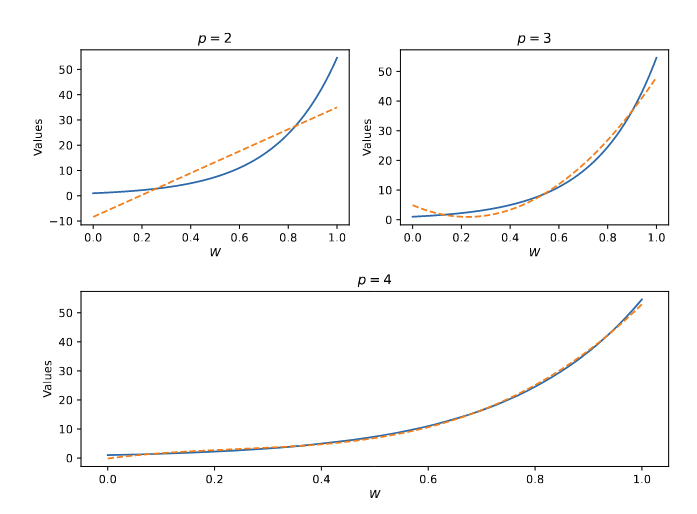

## Statistical Properties of Linear Regression 
In finite samples $(X_i, Y_i)_{i=1}^n$ are i.i.d. random variables, the Ordinary Least Squares (OLS) estimator of $\hat{\beta}$ is given by:
$$
\min_{b\in\mathbb{R}^p} \frac{1}{n}\sum_{i=1}^n (Y_i - b'X_i)^2 
$$
* The first-order condition is $\frac{1}{n}\sum_{i=1}^n (Y_i - b'X_i)X_i = 0$
* Define $\hat{\epsilon}_i:=Y_i-\hat{\beta}'X_i$, then we have 
  $$
  \frac{1}{n}\sum_{i=1}^n \hat{\epsilon}_i X_i = 0
  $$
* The key question is whether $\hat{\beta}$ estimates $\beta$ well.

### Approximation of BLP by OLS 
Intuitively, to estimate each parameter $\beta_j$ we need to have enough variation in $X_j$ (many observations per parameter) to identify the parameter, i.e., $n/p$ should be large enough 

> **Theorem**: (Approximation of BLP by OLS) Under regularity conditions, 
> $$
> \sqrt{E_x(\beta ' X-\hat{\beta}'X)^2} = \sqrt{(\hat{\beta}-\beta)'E_x(X X')(\hat{\beta}-\beta)} \\
> \leq const_p \sqrt{E(\epsilon^2)} \sqrt{\frac{p}{n}} $$
> The inequality holds with probability 1 as $n\to\infty$.

* When $p/n$ is small, the sample BLP approximates the population/true BLP well. 

### Analysis of Variance 
* The ratio of explained variation to the total variation is the **poluation $R^2$**:
$$
R_{pop}^2 = \frac{E[(\hat{\beta}'X)^2]}{E[Y^2]} = 1 -\frac{ E[\epsilon^2]}{E[Y^2]} \in [0,1]
$$
* The sample $R^2$ is defined as:
$$
R_{sample}^2 = 1 - \frac{E_n[\hat{\epsilon}^2]}{E_n[Y^2]} = 1 - \frac{E_n[\hat{\epsilon}^2]}{E_n[Y^2]} \in [0,1]
$$
 > When $p/n$ is small, $R_{sample}^2$ approximates $R_{pop}^2$ well.

### Overfitting Problem
* When $p/n$ is not small, the in-sample BLP becomes misleading 
* Consider $p=n$ and all $X_i$ are independent, we have 
  $$
  MSE_{sample}= 0 \text{ and }R^2_{sample} = 1
  $$
  no matter what $MSE_{pop}$ and $R^2_{pop}$ are. 
* With $p<n$, **adjusted $R^2$** and *adjusted MSE* are: 
  $$
  MSE_{adj} = \frac{n}{n-p} E_n[\hat{\epsilon}^2] \text{ and } R^2_{adj} = 1 - \frac{n}{n-p} \frac{E_n[\hat{\epsilon}^2]}{E_n[Y^2]}
  $$
  > $\frac{n}{n-p}$ corrects for overfitting. The intuition is that the in-sample fit increases as the number of parameters increase and potentially causes overfitting. 

In [33]:
import numpy as np
import statsmodels.api as sm
import warnings
warnings.simplefilter('ignore')

In [56]:
def regression_stats(n, p):
    np.random.seed(123)
    X = np.random.normal(size=(n, p))
    y = np.random.normal(size=(n, 1))
    R2 = sm.OLS(y, X).fit().rsquared
    R2_adj = sm.OLS(y, X).fit().rsquared_adj
    return R2, R2_adj

In [60]:
n = 1000
i = 0  
R2vec = np.zeros(7)
R2_adjvec = np.zeros(7)
# Loop over different values of p
for p in [50, 100, 200, 500, 800, 900, 1000]:
    R2, R2_adj = regression_stats(n, p)
    R2vec[i] = R2
    R2_adjvec[i] = R2_adj
    i = i + 1

Text(0.5, 1.0, 'R2 and R2_adj vs Number of Predictors')

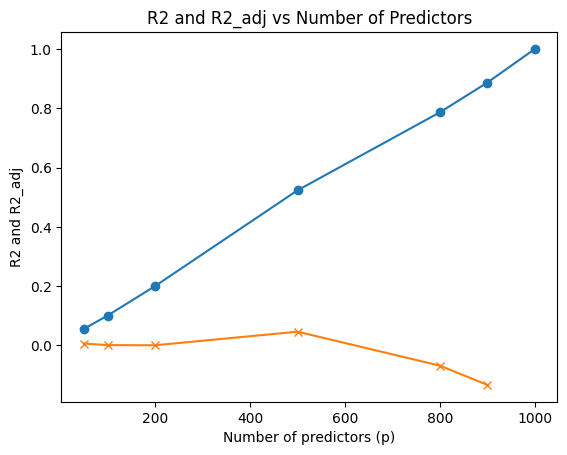

In [67]:
# plot the results
import matplotlib.pyplot as plt
plt.plot([50, 100, 200, 500, 800, 900, 1000], R2vec, "-o",label='R2')
plt.plot([50, 100, 200, 500, 800, 900, 1000], R2_adjvec,"-x", label='R2_adj')
plt.xlabel('Number of predictors (p)')
plt.ylabel('R2 and R2_adj')
plt.title('R2 and R2_adj vs Number of Predictors')

### Sample Splitting 
*Data splitting* is a common practice to measure predictive performance. The idea is as follows:
>    1. Use a **training sample** to estimate the model'
>    2. Use a **test sample** to evaluate the quality of the prediction rule, using $MSE$ and $R^2$

Formally, we define the **data splitting procedure** as:
> 1. *Randomly* partition the data into **training** and **testing** samples: $n$ observations for training and $m$ observations for testing.
> 2. Use the **training sample** to compute a prediction rule $\hat{f}(X)$. e.g., $\hat{f}(X) = \hat{\beta}'X$.
> 3. Use the **testing sample** to compute the prediction error:$MSE_{test}$ and $R^2_{test}$. 

* **Cross-validation** is a more data-efficient evaluation procedure. 
* **Stratified splitting** guarantees that the training and testing samples are similar. 

### Inference 
Let $X = (D, W')'$, where $D$ is the regressor of interest and $W$ other regressors/controls/covariates, we write the model as 
\begin{equation*}
Y = \underbrace{\beta_1 D + \beta_2 W}_{\text{predicted value}}+ \underbrace{\epsilon}_{\text{error}}
\end{equation*}
> The **Frisch-Waugh-Loveall Theorem**: 
> $$
> \beta_1 = argmin_{b1}E[(\tilde{Y}-b_1 \tilde{D})^2] =(E[\tilde{D}^2])^{-1}E[\tilde{D}\tilde{Y}]
> $$
> where $\tilde{Y}$ and $\tilde{D}$ are the residuals of $Y$ and $D$ after regressing on $W$.



> **Inference**: Under regularity conditions and if $p/n \approx 0$: 
> $$
> \sqrt{n}(\hat{\beta_1}-\beta_1) \xrightarrow{d} N(0, (E[\tilde{D}^2])^{-1}E[\tilde{D}^2\tilde{\epsilon}^2]E[\tilde{D}^2])^{-1})
> $$

* Then the 95% confidence interval can be constructed as:
$$
\left [\hat{\beta_1} - 1.96 \sqrt{\hat{V}/n} , \hat{\beta_1} + 1.96 \sqrt{\hat{V}/n}\right]
$$

## Application: Wage Prediction
In labor economics an important question is what determines the wage of workers. This is a causal question, but we could begin to investigate from a predictive perspective.

In the following wage example,  𝑌  is the `(log) hourly wage of a worker` and  𝑋  is a vector of `worker's characteristics`, e.g., education, experience, sex. Two main questions here are:

* How to use job-relevant characteristics, such as education and experience, to best predict wages?

* What is the difference in predicted wages between male and female workers with the same job-relevant characteristics?

In this lab, we focus on the prediction question first.

## Data

The data set we consider is from the March Supplement of the U.S. Current Population Survey, year 2015. 
* We select white non-hispanic individuals, aged 25 to 64 years, and working more than 35 hours per week during at least 50 weeks of the year. 
* We exclude self-employed workers; individuals living in group quarters; individuals in the military, agricultural or private household sectors; individuals with inconsistent reports on earnings and employment status; individuals with allocated or missing information in any of the variables used in the analysis; and individuals with hourly wage below  3 .

* The variable of interest  𝑌  is the (log) hourly wage rate constructed as the `ratio of the annual earnings to the total number of hours worked`, which is constructed in turn as the product of number of weeks worked and the usual number of hours worked per week. 
* Focus on single (never married) workers. The final sample is of size  $n=5150$ .

In [35]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import sklearn.linear_model as lm
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import warnings
# ignore potential convergence warnings; for some small penalty levels,
# tried out, optimization might not converge
warnings.simplefilter('ignore')

## Data Analysis

In [36]:
file = "https://raw.githubusercontent.com/CausalAIBook/MetricsMLNotebooks/main/data/wage2015_subsample_inference.csv"
df = pd.read_csv(file)
df.describe()

,wage,lwage,sex,shs,hsg,scl,clg,ad,mw,so,we,ne,exp1,exp2,exp3,exp4,occ,occ2,ind,ind2
count,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000
mean,23.410410,2.970787,0.444466,0.023301,0.243883,0.278058,0.317670,0.137087,0.259612,0.296505,0.216117,0.227767,13.760583,3.018925,8.235867,25.118038,5310.737476,11.670874,6629.154951,13.316893
std,21.003016,0.570385,0.496955,0.150872,0.429465,0.448086,0.465616,0.343973,0.438464,0.456761,0.411635,0.419432,10.609465,4.000904,14.488962,53.530225,11874.356080,6.966684,5333.443992,5.701019
min,3.021978,1.105912,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,1.000000,370.000000,2.000000
25%,13.461538,2.599837,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.250000,0.125000,0.062500,1740.000000,5.000000,4880.000000,9.000000
50%,19.230769,2.956512,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,1.000000,1.000000,1.000000,4040.000000,13.000000,7370.000000,14.000000
75%,27.777778,3.324236,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,21.000000,4.410000,9.261000,19.448100,5610.000000,17.000000,8190.000000,18.000000
max,528.845673,6.270697,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,47.000000,22.090000,103.823000,487.968100,100000.000000,22.000000,100000.000000,22.000000


### Variable Construction and Regression

We are constructing the output variable  $Y$  and the matrix  $Z$  which includes the characteristics of workers

In [37]:
Y = np.log(df['wage'])
Z = df.drop(['wage', 'lwage'], axis=1)
Z.shape

(5150, 18)

For the outcome variable (log) wage and a subset of the raw regressors, we calculate the empirical mean and other empirical measures to get familiar with the data.



In [38]:
Z.describe()

,sex,shs,hsg,scl,clg,ad,mw,so,we,ne,exp1,exp2,exp3,exp4,occ,occ2,ind,ind2
count,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000
mean,0.444466,0.023301,0.243883,0.278058,0.317670,0.137087,0.259612,0.296505,0.216117,0.227767,13.760583,3.018925,8.235867,25.118038,5310.737476,11.670874,6629.154951,13.316893
std,0.496955,0.150872,0.429465,0.448086,0.465616,0.343973,0.438464,0.456761,0.411635,0.419432,10.609465,4.000904,14.488962,53.530225,11874.356080,6.966684,5333.443992,5.701019
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,1.000000,370.000000,2.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.250000,0.125000,0.062500,1740.000000,5.000000,4880.000000,9.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,1.000000,1.000000,1.000000,4040.000000,13.000000,7370.000000,14.000000
75%,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,21.000000,4.410000,9.261000,19.448100,5610.000000,17.000000,8190.000000,18.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,47.000000,22.090000,103.823000,487.968100,100000.000000,22.000000,100000.000000,22.000000


E.g., the share of female workers in our sample is ~44% ( 𝑠𝑒𝑥=1  if female).

In [39]:
# if you want to print this table to latex
# print(Z.describe().style.to_latex())

## Prediction Question
Now, we will construct a prediction rule for hourly (log) wage  $Y$, which depends linearly on job-relevant characteristics  $X$:
$$
Y = \beta'X + \epsilon
$$
where  $X$  is a vector of characteristics of the worker, including `Female`,  `Some High School`, `High School Graduate`, `Some College`, `College Graduate`, `Advanced Degree`,  `Experience`.

Our goals are:

* Predict wages using various characteristics of workers.

* Assess the predictive performance of a given model using the (adjusted) sample MSE, the (adjusted) sample $R^2$ and the out-of-sample MSE and $R^2$.

### Measuring Prediction Quality
Toward answering the latter, we measure the prediction quality of the two models via **data splitting**:

- Randomly split the data into one training sample and one testing sample. Here we just use a simple method (stratified splitting is a more sophisticated version of splitting that we might consider).
- Use the training sample to estimate the parameters of the Basic Model and the Flexible Model.
- Before using the testing sample, we evaluate in-sample fit.


In [40]:
# split the data into train and test sets
# 80% train, 20% test   
# set random_state to ensure reproducibility
train, test = train_test_split(df, test_size=0.20, random_state=123)


We employ two different specifications for prediction:


1. **Basic Model**:   $X$ consists of a set of raw regressors (e.g. gender, experience, education indicators,  occupation and industry indicators and regional indicators).


2. **Flexible Model**:  $X$ consists of all raw regressors from the basic model plus a *dictionary of transformations** (e.g., ${exp}^2$ and ${exp}^3$) and additional two-way interactions of a polynomial in experience with other regressors. An example of a regressor created through a two-way interaction is *experience* times the indicator of having a *college degree*.

* Using the **Flexible Model** enables us to approximate the real relationship by a more complex regression model and therefore to reduce the bias. 
  
* The **Flexible Model** increases the range of potential shapes of the estimated regression function. In general, flexible models often deliver higher prediction accuracy but are harder to interpret.

## Data-Splitting: In-sample performance

Let us fit both models to our data by running ordinary least squares (ols):

In [41]:
# 1. Basic Model
model_base = 'lwage ~ sex + exp1 + shs + hsg+ scl + clg + mw + so + we + C(occ2) + C(ind2)'
base = smf.ols(model_base, data=train)
results_base = base.fit()

In [42]:
# R-squared and MSE for the basic model
rsquared_base = results_base.rsquared
rsquared_adj_base = results_base.rsquared_adj
mse_base = np.mean(results_base.resid**2)
mse_adj_base = results_base.mse_resid
print(f'Rsquared={rsquared_base:.4f}')
print(f'Rsquared_adjusted={rsquared_adj_base:.4f}')
print(f'MSE={mse_base:.4f}')
print(f'MSE_adjusted={mse_adj_base:.4f}')

Rsquared=0.3176
Rsquared_adjusted=0.3092
MSE=0.2202
MSE_adjusted=0.2229


In [43]:
# verify the formulas
X, y = base.data.exog, base.data.endog
n, p = X.shape
mse = np.mean((y - results_base.predict(X, transform=False))**2)
mse_adj = mse * n / (n - p)
rsquared = 1 - mse / np.var(y)
rsquared_adj = 1 - mse_adj / np.var(y)
print(f'Rsquared={rsquared:.4f}')
print(f'Rsquared_adjusted={rsquared_adj:.4f}')
print(f'MSE={mse:.4f}')
print(f'MSE_adjusted={mse_adj:.4f}')

Rsquared=0.3176
Rsquared_adjusted=0.3091
MSE=0.2202
MSE_adjusted=0.2229


In [44]:
# 2. Flexible Model
model_flex = ('lwage ~ sex + shs+hsg+scl+clg+C(occ2)+C(ind2)+mw+so+we '
              '+ (exp1+exp2+exp3+exp4)*(shs+hsg+scl+clg+C(occ2)+C(ind2)+mw+so+we)')
flex = smf.ols(model_flex, data=train)
results_flex = flex.fit()

In [45]:
rsquared_flex = results_flex.rsquared
rsquared_adj_flex = results_flex.rsquared_adj
mse_flex = np.mean(results_flex.resid**2)
mse_adj_flex = results_flex.mse_resid
print(f'Rsquared={rsquared_flex:.4f}')
print(f'Rsquared_adjusted={rsquared_adj_flex:.4f}')
print(f'MSE={mse_flex:.4f}')
print(f'MSE_adjusted={mse_adj_flex:.4f}')

Rsquared=0.3643
Rsquared_adjusted=0.3241
MSE=0.2051
MSE_adjusted=0.2181


In [46]:
# make a table of results for two models
results = pd.DataFrame({
    'Model': ['Baseline', 'Flexible'],
    'R2': [rsquared_base, rsquared_flex],
    'R2_adj': [rsquared_adj_base, rsquared_adj_flex],
    'MSE': [mse_base, mse_flex],
    'MSE_adj': [mse_adj_base, mse_adj_flex]
})
results = results.set_index('Model')
# print the table to html
print(results)

                R2    R2_adj       MSE   MSE_adj
Model                                           
Baseline  0.317622  0.309237  0.220187  0.222947
Flexible  0.364346  0.324146  0.205110  0.218135


### Inference
#### Impact of Gender on Wages 
**Question**: What is the difference in predicted wages between male and female workers with the same job-relevant characteristics?
we consider the following log-linear regression model

\begin{align*} \log(Y) &= \beta'X + \epsilon\\ &= \beta_1 D + \beta_2' W + \epsilon, \end{align*}
* $D$ is the indicator of being female ($1$ if female and $0$ otherwise) and the $W$'s are controls explaining variation in wages. 
* Considering transformed wages by the logarithm, we are analyzing the relative difference in the payment of male and female workers.


In [47]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
import sys
from sklearn.base import BaseEstimator
import warnings
# ignore potential convergence warnings; for some small
# penalty levels, tried out, optimization might not converge
warnings.simplefilter('ignore')

In [48]:
#descriptive statistics for wage gaps of sex
table = pd.DataFrame()
cols = ["lwage", "sex", "shs", "hsg", "scl",
        "clg", "ad", "ne", "mw", "so", "we", "exp1"]
table['Variable'] = ["Log Wage", "Sex", "Less then High School",
                     "High School Graduate", "Some College",
                     "Gollage Graduate", "Advanced Degree",
                     "Northeast", "Midwest", "South", "West", "Experience"]
table['All'] = df[cols].mean().values
table['Male'] = df[df['sex'] == 0][cols].mean().values
table['Female'] = df[df['sex'] == 1][cols].mean().values
# Show results
table

,Variable,All,Male,Female
0,Log Wage,2.970787,2.987830,2.949485
1,Sex,0.444466,0.000000,1.000000
2,Less then High School,0.023301,0.031807,0.012669
3,High School Graduate,0.243883,0.294303,0.180865
4,Some College,0.278058,0.273331,0.283967
5,Gollage Graduate,0.317670,0.293953,0.347313
6,Advanced Degree,0.137087,0.106606,0.175186
7,Northeast,0.227767,0.221950,0.235037
8,Midwest,0.259612,0.259000,0.260376
9,South,0.296505,0.298148,0.294452


In [49]:
# compute the wage difference 
table.loc[0, 'Female'] - table.loc[0, 'Male']

-0.03834473367441449

#### Unconditional Effect of Sex 
The unconditional wage gap is about  $3.8\%$ for the group of never married workers (female workers get paid less on average in our sample). 

This unconditional (predictive) effect of sex equals the coefficient  $\beta$  in the univariate ols regression of  $Y$  on  $D$ :

$$
log(Y)=\beta D+\epsilon.
$$

We verify this by running an ols regression.

In [50]:
# regression without controls with robust standard errors
nocontrol_fit = smf.ols("lwage ~ sex", data=df).fit()
nocontrol_est = nocontrol_fit.params['sex']
nocontrol_se = nocontrol_fit.HC3_se['sex']

print(f"The estimated sex coefficient is: {nocontrol_est:.4f} ")
print(f"and the corresponding robust standard error is: {nocontrol_se:.4f}")

The estimated sex coefficient is: -0.0383 
and the corresponding robust standard error is: 0.0159


#### Regression with Covariates 
We run an ols regression of  $Y$  on  $(D,W)$  to control for the effect of covariates summarized in  $W$ :

$$
log(Y)=\beta_1 D + \beta_2' W + \epsilon.
$$

Here $W$ controls for `experience`, `education`, `region`, and `occupation` and `industry indicators` plus transformations and two-way interactions.

In [51]:
# Ols regression with controls
flex = "lwage ~ sex + (exp1+exp2+exp3+exp4)*(shs+hsg+scl+clg+C(occ2)+C(ind2)+mw+so+we)"
# Note that ()*() operation in formula objects in statsmodels
# creates a formula of the sort:
#  (exp1+exp2+exp3+exp4)+ (shs+hsg+scl+clg+occ2+ind2+mw+so+we)
#  + (exp1+exp2+exp3+exp4)*(shs+hsg+scl+clg+occ2+ind2+mw+so+we)
control_fit = smf.ols(flex, data=df).fit()
control_est = control_fit.params['sex']
control_se = control_fit.HC3_se['sex']
control_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  lwage   R-squared:                       0.351
Model:                            OLS   Adj. R-squared:                  0.319
Method:                 Least Squares   F-statistic:                     10.83
Date:                Tue, 22 Apr 2025   Prob (F-statistic):          2.69e-305
Time:                        07:20:36   Log-Likelihood:                -3301.9
No. Observations:                5150   AIC:                             7096.
Df Residuals:                    4904   BIC:                             8706.
Df Model:                         245                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              3.8603      0.429      9.006      0.000       3.020       4.701
C(occ2)[T.2]           0.1613      0.130      1.244      0.214      -0.093       0.416
C(occ2)[T.3]           0.2102      0.169      1.246      0.213      -0.121       0.541
C(occ2)[T.4]           0.0709      0.184      0.386      0.700      -0.289       0.431
C(occ2)[T.5]          -0.3960      0.189     -2.100      0.036      -0.766      -0.026
C(occ2)[T.6]          -0.2311      0.187     -1.236      0.217      -0.598       0.135
C(occ2)[T.7]           0.3147      0.194      1.621      0.105      -0.066       0.695
C(occ2)[T.8]          -0.1875      0.169     -1.108      0.268      -0.519       0.144
C(occ2)[T.9]          -0.3390      0.167     -2.027      0.043      -0.667      -0.011
C(occ2)[T.10]          0.0210      0.156      0.134      0.893      -0.286       0.328
C(occ2)[T.11]         -0.6424      0.309     -2.078      0.038      -1.248      -0.036
C(occ2)[T.12]         -0.0675      0.252     -0.268      0.789      -0.562       0.427
C(occ2)[T.13]         -0.2330      0.232     -1.006      0.314      -0.687       0.221
C(occ2)[T.14]          0.2562      0.323      0.794      0.427      -0.376       0.889
C(occ2)[T.15]         -0.1939      0.260     -0.747      0.455      -0.703       0.315
C(occ2)[T.16]         -0.0551      0.147     -0.375      0.708      -0.343       0.233
C(occ2)[T.17]         -0.4156      0.136     -3.053      0.002      -0.682      -0.149
C(occ2)[T.18]         -0.4822      1.044     -0.462      0.644      -2.530       1.565
C(occ2)[T.19]         -0.2579      0.333     -0.776      0.438      -0.910       0.394
C(occ2)[T.20]         -0.3010      0.234     -1.286      0.199      -0.760       0.158
C(occ2)[T.21]         -0.4272      0.221     -1.936      0.053      -0.860       0.005
C(occ2)[T.22]         -0.8695      0.298     -2.922      0.003      -1.453      -0.286
C(ind2)[T.3]          -1.2474      0.645     -1.932      0.053      -2.513       0.018
C(ind2)[T.4]          -0.0948      0.464     -0.205      0.838      -1.004       0.814
C(ind2)[T.5]          -0.5294      0.435     -1.218      0.223      -1.381       0.323
C(ind2)[T.6]          -0.6222      0.435     -1.431      0.152      -1.474       0.230
C(ind2)[T.7]          -0.5047      0.502     -1.005      0.315      -1.490       0.480
C(ind2)[T.8]          -0.7295      0.467     -1.561      0.119      -1.646       0.187
C(ind2)[T.9]          -0.8025      0.425     -1.887      0.059      -1.636       0.031
C(ind2)[T.10]         -0.5806      0.481     -1.207      0.227      -1.523       0.362
C(ind2)[T.11]         -0.9852      0.448     -2.198      0.028      -1.864      -0.107
C(ind2)[T.12]         -0.7376      0.424     -1.738      0.082      -1.569       0.094
C(ind2)[T.13]         -1.0183      0.4

In [52]:
print(f"The estimated sex coefficient: {control_est:.4f} ")
print(f"The corresponding robust standard error: {control_se:.4f}")

The estimated sex coefficient: -0.0696 
The corresponding robust standard error: 0.0157


* The estimated regression coefficient  $\beta_1≈-0.06955$  measures how our linear prediction of wage changes if we set the sex variable  $D$  from 0 to 1, holding the controls  $W$  fixed. 

* We can call this the predictive effect (PE), as it measures the impact of a variable on the prediction we make. 
  
* The unconditional wage gap of size  4 \% for female workers increases to about  7 \% after controlling for worker characteristics.

We now show how the conditional gap and the remainder decompose the marginal wage gap into the parts explained and unexplained by the additional controls.

In [53]:
flex_without_sex = "lwage ~ (exp1+exp2+exp3+exp4)*(shs+hsg+scl+clg+C(occ2)+C(ind2)+mw+so+we)"
lm0 = smf.ols(flex_without_sex, data=df[df["sex"] == 0])
lm1 = smf.ols(flex_without_sex, data=df[df["sex"] == 1])
XX0 = lm0.exog #explantory variables beta_hat*X
y0 = lm0.endog #y_hat 
XX1 = lm1.exog
y1 = lm1.endog
# the coefficients excluding intercept and "sex"
betarest = control_fit.params[control_fit.params.index != "sex"][1:]
print("The marginal gap:", y1.mean() - y0.mean())
diff_unexplained = control_est
print("The unexplained difference: ", diff_unexplained)
diff_explained = betarest.dot(XX1.mean(0)[1:] - XX0.mean(0)[1:])
print("The explained difference:", diff_explained)
print("The sum of these differences:", diff_unexplained + diff_explained)

The marginal gap: -0.03834473367441449
The unexplained difference:  -0.06955320329684066
The explained difference: 0.031208469622388935
The sum of these differences: -0.03834473367445172


To understand the estimate, we can take average for the male and female groups:
\begin{align*}
\underbrace{E_n[Y|D=1] - E_n[Y|D=0]}_{-0.038} &= \\
\underbrace{\hat{\beta}_1}_{-0.070} + &\underbrace{\hat{\beta}'_2(E_n(W|D=1)-E_n(W|D=0))}_{0.031}
\end{align*}

* $E_n(\cdot)$ is the sample average 

### Oaxaca-Blinder Decomposition 
We can augment the original model by adding interaction of sex and other characteristics:
$$
Y = \beta_1 D + \beta_2' W + \beta_3'W\cdot D + \epsilon 
$$
This provides an alternative decomposition:

\begin{align*}
\underbrace{E_n[Y|D=1] - E_n[Y|D=0]}_{-0.038} &= \\
\underbrace{\hat{\beta}_1}_{-2.320} + \underbrace{\hat{\beta}'_2(E_n(W|D=1)-E_n(W|D=0))}_{0.002} & +\underbrace{\hat{\beta}_3' E_n[W|D=1]}_{2.280}
\end{align*}

* Attributed to difference in $W$: `0.002`
* Attributed to different predictive effect of $W$: `2.280`
* Unexplained difference: `-2.320` 

In [54]:
# The oaxaca decomposition
u1, s1, v1 = np.linalg.svd(XX1)
u0, s0, v0 = np.linalg.svd(XX0)
s1[s1 <= 1e-10] = 0
s1[s1 > 1e-10] = 1 / s1[s1 > 1e-10]
beta1 = (s1 * s1 * v1.T).dot(v1).dot(XX1.T).dot(y1)
s0[s0 <= 1e-10] = 0
s0[s0 > 1e-10] = 1 / s0[s0 > 1e-10]
beta0 = (s0 * s0 * v0.T).dot(v0).dot(XX0.T).dot(y0)
print("The marginal gap: ", y1.mean() - y0.mean())
diff_unexplained = beta1[0] - beta0[0]
print("The unexplained difference: ", diff_unexplained)
diff_endow = beta0.dot(XX1.mean(0) - XX0.mean(0))
print("The difference explained by covariates: ", diff_endow)
diff_coeff = (beta1[1:] - beta0[1:]).dot(XX1.mean(0)[1:])
print("The difference explained by interaction: ", diff_coeff)
print("The sum of these differences: ", diff_unexplained + diff_endow + diff_coeff)

The marginal gap:  -0.03834473367441449
The unexplained difference:  -2.3202078245207662
The difference explained by covariates:  0.0015954716257246097
The difference explained by interaction:  2.2802675893099984
The sum of these differences:  -0.03834476358504313


### Partialling-Out using Frisch-Waugh-Lovell Theorem 

We can partial-out the linear effect of the controls via OLS through the following procedures:
1. Regress $Y$ on the controls $W$ to get $\tilde{Y}$;
   
2. Regress $X$ on the controls $W$ to get $\tilde{X}$;

3. Regress $\tilde{Y}$ on $\tilde{X}$

In [68]:
# Partialling-Out using ols
# models
flex_y = "lwage ~  (exp1+exp2+exp3+exp4)*(shs+hsg+scl+clg+C(occ2)+C(ind2)+mw+so+we)"  # model for Y
flex_d = "sex ~ (exp1+exp2+exp3+exp4)*(shs+hsg+scl+clg+C(occ2)+C(ind2)+mw+so+we)"  # model for D
# partialling-out the linear effect of W from Y
t_Y = smf.ols(flex_y, data=df).fit().resid
# partialling-out the linear effect of W from D
t_D = smf.ols(flex_d, data=df).fit().resid
# regression of Y on D after partialling-out the effect of W
partial_fit = sm.OLS(t_Y, t_D).fit()
partial_est = partial_fit.params['x1']
print("Coefficient for D via partialling-out " + str(partial_est))
# standard error
partial_se = partial_fit.HC3_se['x1']
# confidence interval
print("95% CI: " + str(partial_fit.conf_int().values[0]))

Coefficient for D via partialling-out -0.06955320329684576
95% CI: [-0.09866859 -0.04043781]


In [69]:
print(f"The estimated sex coefficient is {partial_est:.4f} "
      f"and the corresponding robust standard error is {partial_se:.4f}")

The estimated sex coefficient is -0.0696 and the corresponding robust standard error is 0.0150


* The estimated coefficient measures the linear predictive effect (PE) of  $D$  on  $Y$  after taking out the linear effect of  $W$  on both of these variables.
  
* The partialling-out approach works well when the dimension of $W$ is low in relation to the sample size  $n$ . When the dimension of  $W$  is relatively high, we need to use variable selection or penalization for regularization purposes.

### OLS Overfitting Problem

We try an "extra" flexible model, where we take interactions of all controls, giving us about 1000 controls. To illustrate how OLS can overfit, we subset to the first 1000 observations so that $p \approx n$.

In [72]:
subset, test = train_test_split(df, train_size=1000, random_state=2724)
# model
extraflex = "lwage ~ sex + (exp1+exp2+exp3+exp4+shs+hsg+scl+clg+C(occ2)+C(ind2)+mw+so+we)**2"
control_fit_extra = smf.ols(extraflex, data=subset).fit()
control_extra_est = control_fit_extra.params['sex']
R2 = control_fit_extra.rsquared
R2_adj = control_fit_extra.rsquared_adj
n = subset.shape[0]
p = control_fit_extra.params.shape[0]
# Jackknife. Python regularizes in the background. Theory shouldn't really work here.
# Cattaneo, Jannson, and Newey (2018) (CJN) do verify that jackknife is valid,
# in the sense of being upward biased, in high-dimensional settings under
# regularity.
control_extra_se = control_fit_extra.HC3_se["sex"]
# HC0 will not work here. CJN show it is inconsistent even
# in moderate dimensional settings.
control_extra_se_HC0 = control_fit_extra.HC0_se["sex"]
# We should probably implement Cattaneo, Jannson, and Newey (2018)'s procedure -
# though it's not clear their regularity conditions would apply here anyway.
print("Number of Extra-Flex Controls: " + str(p - 1))
print("Coefficient of sex with extra flex controls: " + str(control_extra_est))
print("R-squared: " + str(R2))
print("R-squared adjusted: " + str(R2_adj))

Number of Extra-Flex Controls: 979
Coefficient of sex with extra flex controls: -0.0735508763751175
R-squared: 0.7607517491390923
R-squared adjusted: 0.3791973958180602


### Re-estimating the flexible model using Lasso
We re-estimate the flexible model using **Lasso** (the least absolute shrinkage and selection operator) rather than ols.
*  Lasso is a penalized regression method that can be used to reduce the complexity of a regression model when the ratio $p/n$ is not small.  


* We use the `statsmodels` package with the formula `api` for uniformity in feature construction and the `sklearn Lasso` with cross-validation to tune the regularization hyperparameter.

In [55]:
# Lasso with cross-validation
X = flex.data.exog[:, 1:]  # exclude the intercept; we don't want the lasso to penalize the intercept
y = flex.data.endog

# train model using Lasso with cross validation and variable normalization
lasso = Pipeline([('scale', StandardScaler()),  # standardize the variables
                  ('lasso', lm.LassoCV())])
lasso.fit(X, y)

AttributeError: 'str' object has no attribute 'data'

In [ ]:
# verify the formulas
n, p = X.shape
p += 1
mse_lasso = np.mean((y - lasso.predict(X))**2)
mse_adj_lasso = mse_lasso * n / (n - p)
rsquared_lasso = 1 - mse_lasso / np.var(y)
rsquared_adj_lasso = 1 - mse_adj_lasso / np.var(y)
print(f'Rsquared={rsquared_lasso:.4f}')
print(f'Rsquared_adjusted={rsquared_adj_lasso:.4f}')
print(f'MSE={mse_lasso:.4f}')
print(f'MSE_adjusted={mse_adj_lasso:.4f}')

In [ ]:
# store the results in a table
res_df = pd.DataFrame()

res_df['Model'] = ['Basic reg', 'Flexible reg', 'Flexible Lasso']

res_df['p'] = [results_base.params.shape[0],
               results_flex.params.shape[0],
               results_flex.params.shape[0]]

res_df['R2'] = [rsquared_base, rsquared_flex, rsquared_lasso]
res_df['MSE'] = [mse_base, mse_flex, mse_lasso]

res_df['adj_R2'] = [rsquared_adj_base, rsquared_adj_flex, rsquared_adj_lasso]
res_df['adj_MSE'] = [mse_adj_base, mse_adj_flex, mse_adj_lasso]

# Show results
res_df.head()

In [ ]:
# print to Latex
print(res_df.style.to_latex())

Considering the measures above, the flexible model performs slightly better than the basic model.

As $p/n$ is not large, the discrepancy between the adjusted and unadjusted measures is not large. However, if it were, we might still like to apply **data splitting** as a more general procedure to deal with potential overfitting if $p/n$. We illustrate the approach in the following.

## Data Splitting: Out-of-sample performance

Now that we have seen in-sample fit, we evaluate our models on the out-of-sample performance:
- Use the testing sample for evaluation. Predict the $\mathtt{wage}$  of every observation in the testing sample based on the estimated parameters in the training sample.
- Calculate the Mean Squared Prediction Error $MSE_{test}$ based on the testing sample for both prediction models.


In [ ]:
# We will use smf.ols just to get the full data frame and sm.OLS to
# test out of sample for convenience
# This is because predict is a bit tricky with smf.ols out of sample.
tmp = smf.ols(model_base, data=df)  # just to extract df, not actually using this model
X_full = tmp.data.exog
y_full = tmp.data.endog
X_train, X_test, y_train, y_test = train_test_split(X_full, y_full, test_size=.2, shuffle=True)

In [ ]:
# estimating the parameters in the training sample
regbasic = sm.OLS(y_train, X_train).fit()

# predict out of sample
yhat_reg_base = regbasic.predict(X_test)

# calculating out-of-sample MSE
MSE_test1 = sum((y_test - yhat_reg_base)**2) / y_test.shape[0]
R2_test1 = 1. - MSE_test1 / np.var(y_test)

print("Test MSE for the basic model: " + str(MSE_test1))
print("Test R2 for the basic model: " + str(R2_test1))

In the basic model, the  $𝑀𝑆𝐸_{𝑡𝑒𝑠𝑡}$  is quite closed to the  $𝑀𝑆𝐸_{𝑠𝑎𝑚𝑝𝑙𝑒}$.

In [ ]:
# We will use smf.ols just to get the full data frame and sm.OLS to test out of sample for convenience
# This is because predict is a bit tricky with smf.ols out of sample.
tmp = smf.ols(model_flex, data=df)  # just to extract df, not actually using this model
X_full = tmp.data.exog
y_full = tmp.data.endog
X_train, X_test, y_train, y_test = train_test_split(X_full, y_full, test_size=.2, shuffle=True)

# estimating the parameters in the training sample
regflex = sm.OLS(y_train, X_train).fit()

# predict out of sample
yhat_reg_flex = regflex.predict(X_test)

# calculating out-of-sample MSE
MSE_test2 = np.mean((y_test - yhat_reg_flex)**2)
R2_test2 = 1. - MSE_test2 / np.var(y_test)

print("Test MSE for the flexible model: " + str(MSE_test2))
print("Test R2 for the flexible model: " + str(R2_test2))

In the flexible model, the discrepancy between the  $𝑀𝑆𝐸_{𝑡𝑒𝑠𝑡}$  and the  $𝑀𝑆𝐸_{𝑠𝑎𝑚𝑝𝑙𝑒}$  is not large.

It is worth to notice that the  $𝑀𝑆𝐸_{𝑡𝑒𝑠𝑡}$  vary across different data splits. Hence, it is a good idea average the out-of-sample MSE over different data splits to get valid results.

Nevertheless, we observe that, based on the out-of-sample  $𝑀𝑆𝐸$ , the basic model using ols regression performs is about as well (or slightly better) than the flexible model.

Next, let us use lasso regression in the flexible model instead of ols regression. Note that the out-of-sample  𝑀𝑆𝐸  on the test sample can be computed for any other black-box prediction method as well. Thus, let us finally compare the performance of lasso regression in the flexible model to ols regression.

In [ ]:
# train model using Lasso with cross validation and variable normalization
lasso = Pipeline([('scale', StandardScaler()),  # standardize the variables
                  ('lasso', lm.LassoCV())])
lasso.fit(X_train[:, 1:], y_train)

# predict out of sample
yhat_test_lasso = lasso.predict(X_test[:, 1:])

# calculating out-of-sample MSE
MSE_test3 = np.mean((y_test - yhat_test_lasso)**2)
R2_test3 = 1. - MSE_test3 / np.var(y_test)

print("Test MSE for the basic model: " + str(MSE_test3))
print("Test R2 for the basic model: " + str(R2_test3))

In [ ]:
# store the results in a table
res_df2 = pd.DataFrame()

res_df2['Model'] = ['Basic reg', 'Flexible reg', 'Flexible Lasso']

res_df2['$MSE_{test}$'] = [MSE_test1, MSE_test2, MSE_test3]
res_df2['$R^2_{test}$'] = [R2_test1, R2_test2, R2_test3]

# Show results
res_df2.head()

In [ ]:
# print to Latex
print(res_df2.style.to_latex())

## Extra flexible model and Overfitting
Given the results above, it is not immediately clear why one would choose to use Lasso as results are fairly similar. To motivate, we consider an extra flexible model to show how OLS can overfit significantly to the in-sample train data and perform poorly on the out-of-sample testing data.



In [ ]:
# Extra Flexible Model
model_extra = ('lwage ~ sex + (exp1+exp2+exp3+exp4+shs+hsg+scl+clg+C(occ2)+C(ind2)+mw+so+we)**2')
tmp = smf.ols(model_extra, data=df)  # just to extract df, not actually using this model

# In-sample fit
insamplefit = tmp.fit()
rsquared_ex = insamplefit.rsquared
rsquared_adj_ex = insamplefit.rsquared_adj
mse_ex = np.mean(insamplefit.resid**2)
mse_adj_ex = insamplefit.mse_resid
print(f'(In-sample) Rsquared={rsquared_ex :.4f}')
print(f'(In-sample) Rsquared_adjusted={rsquared_adj_ex :.4f}')
print(f'(In-sample) MSE={mse_ex :.4f}')
print(f'(In-sample) MSE_adjusted={mse_adj_ex:.4f}')

# Train test Split
X_full = tmp.data.exog
y_full = tmp.data.endog
X_train, X_test, y_train, y_test = train_test_split(X_full, y_full, test_size=.2, shuffle=True)

# estimating the parameters in the training sample
regextra = sm.OLS(y_train, X_train).fit()

# predict out of sample
yhat_reg_extra = regextra.predict(X_test)

# calculating out-of-sample MSE
MSE_test4 = np.mean((y_test - yhat_reg_extra)**2)
R2_test4 = 1. - MSE_test4 / np.var(y_test)

print("Test MSE for the flexible model: " + str(MSE_test4))
print("Test R2 for the flexible model: " + str(R2_test4))

As we can see, a simple OLS overfits when the dimensionality of covariates is high, as the out-of-sample performance suffers dramatically in comparison to the in-sample performance.

Contrast this with Lasso:

In [ ]:
np.sum(lasso.named_steps['lasso'].coef_ != 0)

In [ ]:
# train model using Lasso with cross validation and variable normalization
lasso = Pipeline([('scale', StandardScaler()),  # standardize the variables
                  ('lasso', lm.LassoCV())])
lasso.fit(X_train[:, 1:], y_train)

# predict in sample
yhat_train_lasso = lasso.predict(X_train[:, 1:])

# Calculate R-squared
R2_L = 1 - np.sum((yhat_train_lasso - y_train)**2) / np.sum((y_train - np.mean(y_train))**2)

# Calculate adjusted R-squared
pL = np.sum(lasso.named_steps['lasso'].coef_ != 0)
ntrain = len(X_train)
baseline = np.sum((y_train - np.mean(y_train))**2) / (ntrain - 1)
R2_adjL = 1 - (np.sum((yhat_train_lasso - y_train)**2) / (ntrain - pL - 1)) / baseline

# Calculate Mean Squared Error (MSE)
lasso_res = y_train - yhat_train_lasso
MSEL = np.mean(lasso_res**2)

# Calculate adjusted MSE
MSE_adjL = (ntrain / (ntrain - pL - 1)) * MSEL

# Print the results
print("R-squared for the lasso with the extra flexible model (in-sample):", R2_L)
print("Adjusted R-squared for the extra flexible model (in-sample):", R2_adjL)
print("MSE for the lasso with the extra flexible model (in-sample):", MSEL)
print("Adjusted MSE for the lasso with the extra flexible model (in-sample):", MSE_adjL)

# predict out of sample
yhat_test_lasso = lasso.predict(X_test[:, 1:])

# calculating out-of-sample MSE
MSE_test5 = np.mean((y_test - yhat_test_lasso)**2)
R2_test5 = 1. - MSE_test5 / np.var(y_test)

print("Test MSE for the basic model: " + str(MSE_test5))
print("Test R2 for the basic model: " + str(R2_test5))

As shown above, the overfitting effect is mitigated with the penalized regression model.

## Introduction to Machine Learning: Applications in Economics 

Zhiyuan Chen

*Empirical Methods*

**Remin Business School**

**2025 Spring** 

## Roadmap 
- **Regression and the Best Linear Prediction Problem**
  - **Properties of Linear Regression** 
  - **Problem of Overfitting**
  - *Application: Wage Prediction*
- 

## Foundations of Linear Regression 
### Best Linear Predictor
The **Linear Regrssion** is to find the best linear predictor of the interested dependent variable $Y$ given the independent variables $X=(X_1, X_2,\cdots,X_p)$ by minimizing the *Mean Squared Error (MSE)*:
$$
\min_{b\in\mathbb{R}^p} E [(Y - b'X)^2],
$$
* The first-order conditions imply that: $E[(Y - \beta'X)X] = 0$
* Define the error as $\epsilon = Y - \beta'X$, then we have $E(\epsilon X) = 0$
* The Best Linear Predictor (BLP) provides a simple decomposition of the dependent variable $Y$:
$$
Y = \beta'X + \epsilon,
$$

### Best Linear Approximation Property 

By the law of iterated expectations:
$$
E[(Y - \beta'X)X] = 0 \Rightarrow E[(E[Y|X]-\beta ' X)X] =0 
$$

* The BLP of $Y$ is also the BLP for the conditional expectation given $X$, $E[Y|X]$
* This motivates the use of various transformations of regressors to form $X$ 

### From BLP to Best Predictor
Let $W$ be "raw" regressors/features, *constructed regressors* are of the form:
$$
X = T(W)=(T_1(W), T_2(W), \cdots, T_p(W))'
$$
* $T(W)$ is called *dictionary* of transformations 
* E.g., polynomials, interactions terms, logarithms, etc.

The **Best Predictor** of $Y$ solves the following best prediction problem:
$$
\min_{m(W)}E[(Y - m(W))^2].
$$

* The linear predictor provides the best linear approximation to the best predictor:
 \begin{equation*}
E[(Y-b'T(W))^2] = \underbrace{E[(g(W) - b'T(W))^2]}_{\text{mean squared prediction error}} + E[(Y-g(W))^2]
\end{equation*}
> Minimizing the MSE of the linear predictor is equivalent to minimizing the mean squared approximation error!

### Example: Approximating a Smooth Function with a Polynomial Dictionary 
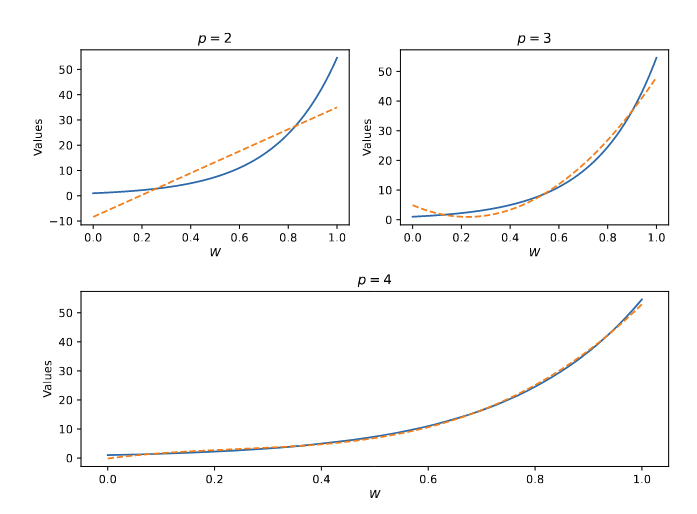

## Statistical Properties of Linear Regression 
In finite samples $(X_i, Y_i)_{i=1}^n$ are i.i.d. random variables, the Ordinary Least Squares (OLS) estimator of $\hat{\beta}$ is given by:
$$
\min_{b\in\mathbb{R}^p} \frac{1}{n}\sum_{i=1}^n (Y_i - b'X_i)^2 
$$
* The first-order condition is $\frac{1}{n}\sum_{i=1}^n (Y_i - b'X_i)X_i = 0$
* Define $\hat{\epsilon}_i:=Y_i-\hat{\beta}'X_i$, then we have 
  $$
  \frac{1}{n}\sum_{i=1}^n \hat{\epsilon}_i X_i = 0
  $$
* The key question is whether $\hat{\beta}$ estimates $\beta$ well.

### Approximation of BLP by OLS 
Intuitively, to estimate each parameter $\beta_j$ we need to have enough variation in $X_j$ (many observations per parameter) to identify the parameter, i.e., $n/p$ should be large enough 

> **Theorem**: (Approximation of BLP by OLS) Under regularity conditions, 
> $$
> \sqrt{E_x(\beta ' X-\hat{\beta}'X)^2} = \sqrt{(\hat{\beta}-\beta)'E_x(X X')(\hat{\beta}-\beta)} \\
> \leq const_p \sqrt{E(\epsilon^2)} \sqrt{\frac{p}{n}} $$
> The inequality holds with probability 1 as $n\to\infty$.

* When $p/n$ is small, the sample BLP approximates the population/true BLP well. 

### Analysis of Variance 
* The ratio of explained variation to the total variation is the **poluation $R^2$**:
$$
R_{pop}^2 = \frac{E[(\hat{\beta}'X)^2]}{E[Y^2]} = 1 -\frac{ E[\epsilon^2]}{E[Y^2]} \in [0,1]
$$
* The sample $R^2$ is defined as:
$$
R_{sample}^2 = 1 - \frac{E_n[\hat{\epsilon}^2]}{E_n[Y^2]} = 1 - \frac{E_n[\hat{\epsilon}^2]}{E_n[Y^2]} \in [0,1]
$$
 > When $p/n$ is small, $R_{sample}^2$ approximates $R_{pop}^2$ well.

### Overfitting Problem
* When $p/n$ is not small, the in-sample BLP becomes misleading 
* Consider $p=n$ and all $X_i$ are independent, we have 
  $$
  MSE_{sample}= 0 \text{ and }R^2_{sample} = 1
  $$
  no matter what $MSE_{pop}$ and $R^2_{pop}$ are. 
* With $p<n$, **adjusted $R^2$** and *adjusted MSE* are: 
  $$
  MSE_{adj} = \frac{n}{n-p} E_n[\hat{\epsilon}^2] \text{ and } R^2_{adj} = 1 - \frac{n}{n-p} \frac{E_n[\hat{\epsilon}^2]}{E_n[Y^2]}
  $$
  > $\frac{n}{n-p}$ corrects for overfitting. The intuition is that the in-sample fit increases as the number of parameters increase and potentially causes overfitting. 

In [33]:
import numpy as np
import statsmodels.api as sm
import warnings
warnings.simplefilter('ignore')

In [56]:
def regression_stats(n, p):
    np.random.seed(123)
    X = np.random.normal(size=(n, p))
    y = np.random.normal(size=(n, 1))
    R2 = sm.OLS(y, X).fit().rsquared
    R2_adj = sm.OLS(y, X).fit().rsquared_adj
    return R2, R2_adj

In [60]:
n = 1000
i = 0  
R2vec = np.zeros(7)
R2_adjvec = np.zeros(7)
# Loop over different values of p
for p in [50, 100, 200, 500, 800, 900, 1000]:
    R2, R2_adj = regression_stats(n, p)
    R2vec[i] = R2
    R2_adjvec[i] = R2_adj
    i = i + 1

Text(0.5, 1.0, 'R2 and R2_adj vs Number of Predictors')

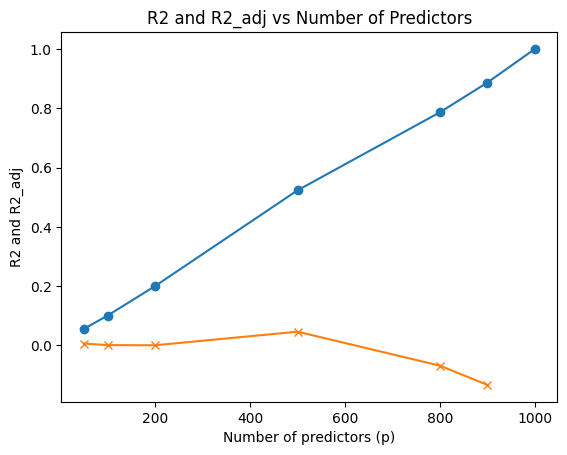

In [67]:
# plot the results
import matplotlib.pyplot as plt
plt.plot([50, 100, 200, 500, 800, 900, 1000], R2vec, "-o",label='R2')
plt.plot([50, 100, 200, 500, 800, 900, 1000], R2_adjvec,"-x", label='R2_adj')
plt.xlabel('Number of predictors (p)')
plt.ylabel('R2 and R2_adj')
plt.title('R2 and R2_adj vs Number of Predictors')

### Sample Splitting 
*Data splitting* is a common practice to measure predictive performance. The idea is as follows:
>    1. Use a **training sample** to estimate the model'
>    2. Use a **test sample** to evaluate the quality of the prediction rule, using $MSE$ and $R^2$

Formally, we define the **data splitting procedure** as:
> 1. *Randomly* partition the data into **training** and **testing** samples: $n$ observations for training and $m$ observations for testing.
> 2. Use the **training sample** to compute a prediction rule $\hat{f}(X)$. e.g., $\hat{f}(X) = \hat{\beta}'X$.
> 3. Use the **testing sample** to compute the prediction error:$MSE_{test}$ and $R^2_{test}$. 

* **Cross-validation** is a more data-efficient evaluation procedure. 
* **Stratified splitting** guarantees that the training and testing samples are similar. 

### Inference 
Let $X = (D, W')'$, where $D$ is the regressor of interest and $W$ other regressors/controls/covariates, we write the model as 
\begin{equation*}
Y = \underbrace{\beta_1 D + \beta_2 W}_{\text{predicted value}}+ \underbrace{\epsilon}_{\text{error}}
\end{equation*}
> The **Frisch-Waugh-Loveall Theorem**: 
> $$
> \beta_1 = argmin_{b1}E[(\tilde{Y}-b_1 \tilde{D})^2] =(E[\tilde{D}^2])^{-1}E[\tilde{D}\tilde{Y}]
> $$
> where $\tilde{Y}$ and $\tilde{D}$ are the residuals of $Y$ and $D$ after regressing on $W$.



> **Inference**: Under regularity conditions and if $p/n \approx 0$: 
> $$
> \sqrt{n}(\hat{\beta_1}-\beta_1) \xrightarrow{d} N(0, (E[\tilde{D}^2])^{-1}E[\tilde{D}^2\tilde{\epsilon}^2]E[\tilde{D}^2])^{-1})
> $$

* Then the 95% confidence interval can be constructed as:
$$
\left [\hat{\beta_1} - 1.96 \sqrt{\hat{V}/n} , \hat{\beta_1} + 1.96 \sqrt{\hat{V}/n}\right]
$$

## Application: Wage Prediction
In labor economics an important question is what determines the wage of workers. This is a causal question, but we could begin to investigate from a predictive perspective.

In the following wage example,  𝑌  is the `(log) hourly wage of a worker` and  𝑋  is a vector of `worker's characteristics`, e.g., education, experience, sex. Two main questions here are:

* How to use job-relevant characteristics, such as education and experience, to best predict wages?

* What is the difference in predicted wages between male and female workers with the same job-relevant characteristics?

In this lab, we focus on the prediction question first.

## Data

The data set we consider is from the March Supplement of the U.S. Current Population Survey, year 2015. 
* We select white non-hispanic individuals, aged 25 to 64 years, and working more than 35 hours per week during at least 50 weeks of the year. 
* We exclude self-employed workers; individuals living in group quarters; individuals in the military, agricultural or private household sectors; individuals with inconsistent reports on earnings and employment status; individuals with allocated or missing information in any of the variables used in the analysis; and individuals with hourly wage below  3 .

* The variable of interest  𝑌  is the (log) hourly wage rate constructed as the `ratio of the annual earnings to the total number of hours worked`, which is constructed in turn as the product of number of weeks worked and the usual number of hours worked per week. 
* Focus on single (never married) workers. The final sample is of size  $n=5150$ .

In [35]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import sklearn.linear_model as lm
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import warnings
# ignore potential convergence warnings; for some small penalty levels,
# tried out, optimization might not converge
warnings.simplefilter('ignore')

## Data Analysis

In [36]:
file = "https://raw.githubusercontent.com/CausalAIBook/MetricsMLNotebooks/main/data/wage2015_subsample_inference.csv"
df = pd.read_csv(file)
df.describe()

,wage,lwage,sex,shs,hsg,scl,clg,ad,mw,so,we,ne,exp1,exp2,exp3,exp4,occ,occ2,ind,ind2
count,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000
mean,23.410410,2.970787,0.444466,0.023301,0.243883,0.278058,0.317670,0.137087,0.259612,0.296505,0.216117,0.227767,13.760583,3.018925,8.235867,25.118038,5310.737476,11.670874,6629.154951,13.316893
std,21.003016,0.570385,0.496955,0.150872,0.429465,0.448086,0.465616,0.343973,0.438464,0.456761,0.411635,0.419432,10.609465,4.000904,14.488962,53.530225,11874.356080,6.966684,5333.443992,5.701019
min,3.021978,1.105912,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,1.000000,370.000000,2.000000
25%,13.461538,2.599837,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.250000,0.125000,0.062500,1740.000000,5.000000,4880.000000,9.000000
50%,19.230769,2.956512,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,1.000000,1.000000,1.000000,4040.000000,13.000000,7370.000000,14.000000
75%,27.777778,3.324236,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,21.000000,4.410000,9.261000,19.448100,5610.000000,17.000000,8190.000000,18.000000
max,528.845673,6.270697,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,47.000000,22.090000,103.823000,487.968100,100000.000000,22.000000,100000.000000,22.000000


### Variable Construction and Regression

We are constructing the output variable  $Y$  and the matrix  $Z$  which includes the characteristics of workers

In [37]:
Y = np.log(df['wage'])
Z = df.drop(['wage', 'lwage'], axis=1)
Z.shape

(5150, 18)

For the outcome variable (log) wage and a subset of the raw regressors, we calculate the empirical mean and other empirical measures to get familiar with the data.



In [38]:
Z.describe()

,sex,shs,hsg,scl,clg,ad,mw,so,we,ne,exp1,exp2,exp3,exp4,occ,occ2,ind,ind2
count,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000
mean,0.444466,0.023301,0.243883,0.278058,0.317670,0.137087,0.259612,0.296505,0.216117,0.227767,13.760583,3.018925,8.235867,25.118038,5310.737476,11.670874,6629.154951,13.316893
std,0.496955,0.150872,0.429465,0.448086,0.465616,0.343973,0.438464,0.456761,0.411635,0.419432,10.609465,4.000904,14.488962,53.530225,11874.356080,6.966684,5333.443992,5.701019
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,1.000000,370.000000,2.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.250000,0.125000,0.062500,1740.000000,5.000000,4880.000000,9.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,1.000000,1.000000,1.000000,4040.000000,13.000000,7370.000000,14.000000
75%,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,21.000000,4.410000,9.261000,19.448100,5610.000000,17.000000,8190.000000,18.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,47.000000,22.090000,103.823000,487.968100,100000.000000,22.000000,100000.000000,22.000000


E.g., the share of female workers in our sample is ~44% ( 𝑠𝑒𝑥=1  if female).

In [39]:
# if you want to print this table to latex
# print(Z.describe().style.to_latex())

## Prediction Question
Now, we will construct a prediction rule for hourly (log) wage  $Y$, which depends linearly on job-relevant characteristics  $X$:
$$
Y = \beta'X + \epsilon
$$
where  $X$  is a vector of characteristics of the worker, including `Female`,  `Some High School`, `High School Graduate`, `Some College`, `College Graduate`, `Advanced Degree`,  `Experience`.

Our goals are:

* Predict wages using various characteristics of workers.

* Assess the predictive performance of a given model using the (adjusted) sample MSE, the (adjusted) sample $R^2$ and the out-of-sample MSE and $R^2$.

### Measuring Prediction Quality
Toward answering the latter, we measure the prediction quality of the two models via **data splitting**:

- Randomly split the data into one training sample and one testing sample. Here we just use a simple method (stratified splitting is a more sophisticated version of splitting that we might consider).
- Use the training sample to estimate the parameters of the Basic Model and the Flexible Model.
- Before using the testing sample, we evaluate in-sample fit.


In [40]:
# split the data into train and test sets
# 80% train, 20% test   
# set random_state to ensure reproducibility
train, test = train_test_split(df, test_size=0.20, random_state=123)


We employ two different specifications for prediction:


1. **Basic Model**:   $X$ consists of a set of raw regressors (e.g. gender, experience, education indicators,  occupation and industry indicators and regional indicators).


2. **Flexible Model**:  $X$ consists of all raw regressors from the basic model plus a *dictionary of transformations** (e.g., ${exp}^2$ and ${exp}^3$) and additional two-way interactions of a polynomial in experience with other regressors. An example of a regressor created through a two-way interaction is *experience* times the indicator of having a *college degree*.

* Using the **Flexible Model** enables us to approximate the real relationship by a more complex regression model and therefore to reduce the bias. 
  
* The **Flexible Model** increases the range of potential shapes of the estimated regression function. In general, flexible models often deliver higher prediction accuracy but are harder to interpret.

## Data-Splitting: In-sample performance

Let us fit both models to our data by running ordinary least squares (ols):

In [41]:
# 1. Basic Model
model_base = 'lwage ~ sex + exp1 + shs + hsg+ scl + clg + mw + so + we + C(occ2) + C(ind2)'
base = smf.ols(model_base, data=train)
results_base = base.fit()

In [42]:
# R-squared and MSE for the basic model
rsquared_base = results_base.rsquared
rsquared_adj_base = results_base.rsquared_adj
mse_base = np.mean(results_base.resid**2)
mse_adj_base = results_base.mse_resid
print(f'Rsquared={rsquared_base:.4f}')
print(f'Rsquared_adjusted={rsquared_adj_base:.4f}')
print(f'MSE={mse_base:.4f}')
print(f'MSE_adjusted={mse_adj_base:.4f}')

Rsquared=0.3176
Rsquared_adjusted=0.3092
MSE=0.2202
MSE_adjusted=0.2229


In [43]:
# verify the formulas
X, y = base.data.exog, base.data.endog
n, p = X.shape
mse = np.mean((y - results_base.predict(X, transform=False))**2)
mse_adj = mse * n / (n - p)
rsquared = 1 - mse / np.var(y)
rsquared_adj = 1 - mse_adj / np.var(y)
print(f'Rsquared={rsquared:.4f}')
print(f'Rsquared_adjusted={rsquared_adj:.4f}')
print(f'MSE={mse:.4f}')
print(f'MSE_adjusted={mse_adj:.4f}')

Rsquared=0.3176
Rsquared_adjusted=0.3091
MSE=0.2202
MSE_adjusted=0.2229


In [44]:
# 2. Flexible Model
model_flex = ('lwage ~ sex + shs+hsg+scl+clg+C(occ2)+C(ind2)+mw+so+we '
              '+ (exp1+exp2+exp3+exp4)*(shs+hsg+scl+clg+C(occ2)+C(ind2)+mw+so+we)')
flex = smf.ols(model_flex, data=train)
results_flex = flex.fit()

In [45]:
rsquared_flex = results_flex.rsquared
rsquared_adj_flex = results_flex.rsquared_adj
mse_flex = np.mean(results_flex.resid**2)
mse_adj_flex = results_flex.mse_resid
print(f'Rsquared={rsquared_flex:.4f}')
print(f'Rsquared_adjusted={rsquared_adj_flex:.4f}')
print(f'MSE={mse_flex:.4f}')
print(f'MSE_adjusted={mse_adj_flex:.4f}')

Rsquared=0.3643
Rsquared_adjusted=0.3241
MSE=0.2051
MSE_adjusted=0.2181


In [46]:
# make a table of results for two models
results = pd.DataFrame({
    'Model': ['Baseline', 'Flexible'],
    'R2': [rsquared_base, rsquared_flex],
    'R2_adj': [rsquared_adj_base, rsquared_adj_flex],
    'MSE': [mse_base, mse_flex],
    'MSE_adj': [mse_adj_base, mse_adj_flex]
})
results = results.set_index('Model')
# print the table to html
print(results)

                R2    R2_adj       MSE   MSE_adj
Model                                           
Baseline  0.317622  0.309237  0.220187  0.222947
Flexible  0.364346  0.324146  0.205110  0.218135


### Inference
#### Impact of Gender on Wages 
**Question**: What is the difference in predicted wages between male and female workers with the same job-relevant characteristics?
we consider the following log-linear regression model

\begin{align*} \log(Y) &= \beta'X + \epsilon\\ &= \beta_1 D + \beta_2' W + \epsilon, \end{align*}
* $D$ is the indicator of being female ($1$ if female and $0$ otherwise) and the $W$'s are controls explaining variation in wages. 
* Considering transformed wages by the logarithm, we are analyzing the relative difference in the payment of male and female workers.


In [47]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
import sys
from sklearn.base import BaseEstimator
import warnings
# ignore potential convergence warnings; for some small
# penalty levels, tried out, optimization might not converge
warnings.simplefilter('ignore')

In [48]:
#descriptive statistics for wage gaps of sex
table = pd.DataFrame()
cols = ["lwage", "sex", "shs", "hsg", "scl",
        "clg", "ad", "ne", "mw", "so", "we", "exp1"]
table['Variable'] = ["Log Wage", "Sex", "Less then High School",
                     "High School Graduate", "Some College",
                     "Gollage Graduate", "Advanced Degree",
                     "Northeast", "Midwest", "South", "West", "Experience"]
table['All'] = df[cols].mean().values
table['Male'] = df[df['sex'] == 0][cols].mean().values
table['Female'] = df[df['sex'] == 1][cols].mean().values
# Show results
table

,Variable,All,Male,Female
0,Log Wage,2.970787,2.987830,2.949485
1,Sex,0.444466,0.000000,1.000000
2,Less then High School,0.023301,0.031807,0.012669
3,High School Graduate,0.243883,0.294303,0.180865
4,Some College,0.278058,0.273331,0.283967
5,Gollage Graduate,0.317670,0.293953,0.347313
6,Advanced Degree,0.137087,0.106606,0.175186
7,Northeast,0.227767,0.221950,0.235037
8,Midwest,0.259612,0.259000,0.260376
9,South,0.296505,0.298148,0.294452


In [49]:
# compute the wage difference 
table.loc[0, 'Female'] - table.loc[0, 'Male']

-0.03834473367441449

#### Unconditional Effect of Sex 
The unconditional wage gap is about  $3.8\%$ for the group of never married workers (female workers get paid less on average in our sample). 

This unconditional (predictive) effect of sex equals the coefficient  $\beta$  in the univariate ols regression of  $Y$  on  $D$ :

$$
log(Y)=\beta D+\epsilon.
$$

We verify this by running an ols regression.

In [50]:
# regression without controls with robust standard errors
nocontrol_fit = smf.ols("lwage ~ sex", data=df).fit()
nocontrol_est = nocontrol_fit.params['sex']
nocontrol_se = nocontrol_fit.HC3_se['sex']

print(f"The estimated sex coefficient is: {nocontrol_est:.4f} ")
print(f"and the corresponding robust standard error is: {nocontrol_se:.4f}")

The estimated sex coefficient is: -0.0383 
and the corresponding robust standard error is: 0.0159


#### Regression with Covariates 
We run an ols regression of  $Y$  on  $(D,W)$  to control for the effect of covariates summarized in  $W$ :

$$
log(Y)=\beta_1 D + \beta_2' W + \epsilon.
$$

Here $W$ controls for `experience`, `education`, `region`, and `occupation` and `industry indicators` plus transformations and two-way interactions.

In [51]:
# Ols regression with controls
flex = "lwage ~ sex + (exp1+exp2+exp3+exp4)*(shs+hsg+scl+clg+C(occ2)+C(ind2)+mw+so+we)"
# Note that ()*() operation in formula objects in statsmodels
# creates a formula of the sort:
#  (exp1+exp2+exp3+exp4)+ (shs+hsg+scl+clg+occ2+ind2+mw+so+we)
#  + (exp1+exp2+exp3+exp4)*(shs+hsg+scl+clg+occ2+ind2+mw+so+we)
control_fit = smf.ols(flex, data=df).fit()
control_est = control_fit.params['sex']
control_se = control_fit.HC3_se['sex']
control_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  lwage   R-squared:                       0.351
Model:                            OLS   Adj. R-squared:                  0.319
Method:                 Least Squares   F-statistic:                     10.83
Date:                Tue, 22 Apr 2025   Prob (F-statistic):          2.69e-305
Time:                        07:20:36   Log-Likelihood:                -3301.9
No. Observations:                5150   AIC:                             7096.
Df Residuals:                    4904   BIC:                             8706.
Df Model:                         245                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              3.8603      0.429      9.006      0.000       3.020       4.701
C(occ2)[T.2]           0.1613      0.130      1.244      0.214      -0.093       0.416
C(occ2)[T.3]           0.2102      0.169      1.246      0.213      -0.121       0.541
C(occ2)[T.4]           0.0709      0.184      0.386      0.700      -0.289       0.431
C(occ2)[T.5]          -0.3960      0.189     -2.100      0.036      -0.766      -0.026
C(occ2)[T.6]          -0.2311      0.187     -1.236      0.217      -0.598       0.135
C(occ2)[T.7]           0.3147      0.194      1.621      0.105      -0.066       0.695
C(occ2)[T.8]          -0.1875      0.169     -1.108      0.268      -0.519       0.144
C(occ2)[T.9]          -0.3390      0.167     -2.027      0.043      -0.667      -0.011
C(occ2)[T.10]          0.0210      0.156      0.134      0.893      -0.286       0.328
C(occ2)[T.11]         -0.6424      0.309     -2.078      0.038      -1.248      -0.036
C(occ2)[T.12]         -0.0675      0.252     -0.268      0.789      -0.562       0.427
C(occ2)[T.13]         -0.2330      0.232     -1.006      0.314      -0.687       0.221
C(occ2)[T.14]          0.2562      0.323      0.794      0.427      -0.376       0.889
C(occ2)[T.15]         -0.1939      0.260     -0.747      0.455      -0.703       0.315
C(occ2)[T.16]         -0.0551      0.147     -0.375      0.708      -0.343       0.233
C(occ2)[T.17]         -0.4156      0.136     -3.053      0.002      -0.682      -0.149
C(occ2)[T.18]         -0.4822      1.044     -0.462      0.644      -2.530       1.565
C(occ2)[T.19]         -0.2579      0.333     -0.776      0.438      -0.910       0.394
C(occ2)[T.20]         -0.3010      0.234     -1.286      0.199      -0.760       0.158
C(occ2)[T.21]         -0.4272      0.221     -1.936      0.053      -0.860       0.005
C(occ2)[T.22]         -0.8695      0.298     -2.922      0.003      -1.453      -0.286
C(ind2)[T.3]          -1.2474      0.645     -1.932      0.053      -2.513       0.018
C(ind2)[T.4]          -0.0948      0.464     -0.205      0.838      -1.004       0.814
C(ind2)[T.5]          -0.5294      0.435     -1.218      0.223      -1.381       0.323
C(ind2)[T.6]          -0.6222      0.435     -1.431      0.152      -1.474       0.230
C(ind2)[T.7]          -0.5047      0.502     -1.005      0.315      -1.490       0.480
C(ind2)[T.8]          -0.7295      0.467     -1.561      0.119      -1.646       0.187
C(ind2)[T.9]          -0.8025      0.425     -1.887      0.059      -1.636       0.031
C(ind2)[T.10]         -0.5806      0.481     -1.207      0.227      -1.523       0.362
C(ind2)[T.11]         -0.9852      0.448     -2.198      0.028      -1.864      -0.107
C(ind2)[T.12]         -0.7376      0.424     -1.738      0.082      -1.569       0.094
C(ind2)[T.13]         -1.0183      0.4

In [52]:
print(f"The estimated sex coefficient: {control_est:.4f} ")
print(f"The corresponding robust standard error: {control_se:.4f}")

The estimated sex coefficient: -0.0696 
The corresponding robust standard error: 0.0157


* The estimated regression coefficient  $\beta_1≈-0.06955$  measures how our linear prediction of wage changes if we set the sex variable  $D$  from 0 to 1, holding the controls  $W$  fixed. 

* We can call this the predictive effect (PE), as it measures the impact of a variable on the prediction we make. 
  
* The unconditional wage gap of size  4 \% for female workers increases to about  7 \% after controlling for worker characteristics.

We now show how the conditional gap and the remainder decompose the marginal wage gap into the parts explained and unexplained by the additional controls.

In [53]:
flex_without_sex = "lwage ~ (exp1+exp2+exp3+exp4)*(shs+hsg+scl+clg+C(occ2)+C(ind2)+mw+so+we)"
lm0 = smf.ols(flex_without_sex, data=df[df["sex"] == 0])
lm1 = smf.ols(flex_without_sex, data=df[df["sex"] == 1])
XX0 = lm0.exog #explantory variables beta_hat*X
y0 = lm0.endog #y_hat 
XX1 = lm1.exog
y1 = lm1.endog
# the coefficients excluding intercept and "sex"
betarest = control_fit.params[control_fit.params.index != "sex"][1:]
print("The marginal gap:", y1.mean() - y0.mean())
diff_unexplained = control_est
print("The unexplained difference: ", diff_unexplained)
diff_explained = betarest.dot(XX1.mean(0)[1:] - XX0.mean(0)[1:])
print("The explained difference:", diff_explained)
print("The sum of these differences:", diff_unexplained + diff_explained)

The marginal gap: -0.03834473367441449
The unexplained difference:  -0.06955320329684066
The explained difference: 0.031208469622388935
The sum of these differences: -0.03834473367445172


To understand the estimate, we can take average for the male and female groups:
\begin{align*}
\underbrace{E_n[Y|D=1] - E_n[Y|D=0]}_{-0.038} &= \\
\underbrace{\hat{\beta}_1}_{-0.070} + &\underbrace{\hat{\beta}'_2(E_n(W|D=1)-E_n(W|D=0))}_{0.031}
\end{align*}

* $E_n(\cdot)$ is the sample average 

### Oaxaca-Blinder Decomposition 
We can augment the original model by adding interaction of sex and other characteristics:
$$
Y = \beta_1 D + \beta_2' W + \beta_3'W\cdot D + \epsilon 
$$
This provides an alternative decomposition:

\begin{align*}
\underbrace{E_n[Y|D=1] - E_n[Y|D=0]}_{-0.038} &= \\
\underbrace{\hat{\beta}_1}_{-2.320} + \underbrace{\hat{\beta}'_2(E_n(W|D=1)-E_n(W|D=0))}_{0.002} & +\underbrace{\hat{\beta}_3' E_n[W|D=1]}_{2.280}
\end{align*}

* Attributed to difference in $W$: `0.002`
* Attributed to different predictive effect of $W$: `2.280`
* Unexplained difference: `-2.320` 

In [54]:
# The oaxaca decomposition
u1, s1, v1 = np.linalg.svd(XX1)
u0, s0, v0 = np.linalg.svd(XX0)
s1[s1 <= 1e-10] = 0
s1[s1 > 1e-10] = 1 / s1[s1 > 1e-10]
beta1 = (s1 * s1 * v1.T).dot(v1).dot(XX1.T).dot(y1)
s0[s0 <= 1e-10] = 0
s0[s0 > 1e-10] = 1 / s0[s0 > 1e-10]
beta0 = (s0 * s0 * v0.T).dot(v0).dot(XX0.T).dot(y0)
print("The marginal gap: ", y1.mean() - y0.mean())
diff_unexplained = beta1[0] - beta0[0]
print("The unexplained difference: ", diff_unexplained)
diff_endow = beta0.dot(XX1.mean(0) - XX0.mean(0))
print("The difference explained by covariates: ", diff_endow)
diff_coeff = (beta1[1:] - beta0[1:]).dot(XX1.mean(0)[1:])
print("The difference explained by interaction: ", diff_coeff)
print("The sum of these differences: ", diff_unexplained + diff_endow + diff_coeff)

The marginal gap:  -0.03834473367441449
The unexplained difference:  -2.3202078245207662
The difference explained by covariates:  0.0015954716257246097
The difference explained by interaction:  2.2802675893099984
The sum of these differences:  -0.03834476358504313


### Partialling-Out using Frisch-Waugh-Lovell Theorem 

We can partial-out the linear effect of the controls via OLS through the following procedures:
1. Regress $Y$ on the controls $W$ to get $\tilde{Y}$;
   
2. Regress $X$ on the controls $W$ to get $\tilde{X}$;

3. Regress $\tilde{Y}$ on $\tilde{X}$

In [68]:
# Partialling-Out using ols
# models
flex_y = "lwage ~  (exp1+exp2+exp3+exp4)*(shs+hsg+scl+clg+C(occ2)+C(ind2)+mw+so+we)"  # model for Y
flex_d = "sex ~ (exp1+exp2+exp3+exp4)*(shs+hsg+scl+clg+C(occ2)+C(ind2)+mw+so+we)"  # model for D
# partialling-out the linear effect of W from Y
t_Y = smf.ols(flex_y, data=df).fit().resid
# partialling-out the linear effect of W from D
t_D = smf.ols(flex_d, data=df).fit().resid
# regression of Y on D after partialling-out the effect of W
partial_fit = sm.OLS(t_Y, t_D).fit()
partial_est = partial_fit.params['x1']
print("Coefficient for D via partialling-out " + str(partial_est))
# standard error
partial_se = partial_fit.HC3_se['x1']
# confidence interval
print("95% CI: " + str(partial_fit.conf_int().values[0]))

Coefficient for D via partialling-out -0.06955320329684576
95% CI: [-0.09866859 -0.04043781]


In [69]:
print(f"The estimated sex coefficient is {partial_est:.4f} "
      f"and the corresponding robust standard error is {partial_se:.4f}")

The estimated sex coefficient is -0.0696 and the corresponding robust standard error is 0.0150


* The estimated coefficient measures the linear predictive effect (PE) of  $D$  on  $Y$  after taking out the linear effect of  $W$  on both of these variables.
  
* The partialling-out approach works well when the dimension of $W$ is low in relation to the sample size  $n$ . When the dimension of  $W$  is relatively high, we need to use variable selection or penalization for regularization purposes.

### OLS Overfitting Problem

We try an "extra" flexible model, where we take interactions of all controls, giving us about 1000 controls. To illustrate how OLS can overfit, we subset to the first 1000 observations so that $p \approx n$.

In [72]:
subset, test = train_test_split(df, train_size=1000, random_state=2724)
# model
extraflex = "lwage ~ sex + (exp1+exp2+exp3+exp4+shs+hsg+scl+clg+C(occ2)+C(ind2)+mw+so+we)**2"
control_fit_extra = smf.ols(extraflex, data=subset).fit()
control_extra_est = control_fit_extra.params['sex']
R2 = control_fit_extra.rsquared
R2_adj = control_fit_extra.rsquared_adj
n = subset.shape[0]
p = control_fit_extra.params.shape[0]
# Jackknife. Python regularizes in the background. Theory shouldn't really work here.
# Cattaneo, Jannson, and Newey (2018) (CJN) do verify that jackknife is valid,
# in the sense of being upward biased, in high-dimensional settings under
# regularity.
control_extra_se = control_fit_extra.HC3_se["sex"]
# HC0 will not work here. CJN show it is inconsistent even
# in moderate dimensional settings.
control_extra_se_HC0 = control_fit_extra.HC0_se["sex"]
# We should probably implement Cattaneo, Jannson, and Newey (2018)'s procedure -
# though it's not clear their regularity conditions would apply here anyway.
print("Number of Extra-Flex Controls: " + str(p - 1))
print("Coefficient of sex with extra flex controls: " + str(control_extra_est))
print("R-squared: " + str(R2))
print("R-squared adjusted: " + str(R2_adj))

Number of Extra-Flex Controls: 979
Coefficient of sex with extra flex controls: -0.0735508763751175
R-squared: 0.7607517491390923
R-squared adjusted: 0.3791973958180602


### Re-estimating the flexible model using Lasso
We re-estimate the flexible model using **Lasso** (the least absolute shrinkage and selection operator) rather than ols.
*  Lasso is a penalized regression method that can be used to reduce the complexity of a regression model when the ratio $p/n$ is not small.  


* We use the `statsmodels` package with the formula `api` for uniformity in feature construction and the `sklearn Lasso` with cross-validation to tune the regularization hyperparameter.

In [55]:
# Lasso with cross-validation
X = flex.data.exog[:, 1:]  # exclude the intercept; we don't want the lasso to penalize the intercept
y = flex.data.endog

# train model using Lasso with cross validation and variable normalization
lasso = Pipeline([('scale', StandardScaler()),  # standardize the variables
                  ('lasso', lm.LassoCV())])
lasso.fit(X, y)

AttributeError: 'str' object has no attribute 'data'

In [ ]:
# verify the formulas
n, p = X.shape
p += 1
mse_lasso = np.mean((y - lasso.predict(X))**2)
mse_adj_lasso = mse_lasso * n / (n - p)
rsquared_lasso = 1 - mse_lasso / np.var(y)
rsquared_adj_lasso = 1 - mse_adj_lasso / np.var(y)
print(f'Rsquared={rsquared_lasso:.4f}')
print(f'Rsquared_adjusted={rsquared_adj_lasso:.4f}')
print(f'MSE={mse_lasso:.4f}')
print(f'MSE_adjusted={mse_adj_lasso:.4f}')

In [ ]:
# store the results in a table
res_df = pd.DataFrame()

res_df['Model'] = ['Basic reg', 'Flexible reg', 'Flexible Lasso']

res_df['p'] = [results_base.params.shape[0],
               results_flex.params.shape[0],
               results_flex.params.shape[0]]

res_df['R2'] = [rsquared_base, rsquared_flex, rsquared_lasso]
res_df['MSE'] = [mse_base, mse_flex, mse_lasso]

res_df['adj_R2'] = [rsquared_adj_base, rsquared_adj_flex, rsquared_adj_lasso]
res_df['adj_MSE'] = [mse_adj_base, mse_adj_flex, mse_adj_lasso]

# Show results
res_df.head()

In [ ]:
# print to Latex
print(res_df.style.to_latex())

Considering the measures above, the flexible model performs slightly better than the basic model.

As $p/n$ is not large, the discrepancy between the adjusted and unadjusted measures is not large. However, if it were, we might still like to apply **data splitting** as a more general procedure to deal with potential overfitting if $p/n$. We illustrate the approach in the following.

## Data Splitting: Out-of-sample performance

Now that we have seen in-sample fit, we evaluate our models on the out-of-sample performance:
- Use the testing sample for evaluation. Predict the $\mathtt{wage}$  of every observation in the testing sample based on the estimated parameters in the training sample.
- Calculate the Mean Squared Prediction Error $MSE_{test}$ based on the testing sample for both prediction models.


In [ ]:
# We will use smf.ols just to get the full data frame and sm.OLS to
# test out of sample for convenience
# This is because predict is a bit tricky with smf.ols out of sample.
tmp = smf.ols(model_base, data=df)  # just to extract df, not actually using this model
X_full = tmp.data.exog
y_full = tmp.data.endog
X_train, X_test, y_train, y_test = train_test_split(X_full, y_full, test_size=.2, shuffle=True)

In [ ]:
# estimating the parameters in the training sample
regbasic = sm.OLS(y_train, X_train).fit()

# predict out of sample
yhat_reg_base = regbasic.predict(X_test)

# calculating out-of-sample MSE
MSE_test1 = sum((y_test - yhat_reg_base)**2) / y_test.shape[0]
R2_test1 = 1. - MSE_test1 / np.var(y_test)

print("Test MSE for the basic model: " + str(MSE_test1))
print("Test R2 for the basic model: " + str(R2_test1))

In the basic model, the  $𝑀𝑆𝐸_{𝑡𝑒𝑠𝑡}$  is quite closed to the  $𝑀𝑆𝐸_{𝑠𝑎𝑚𝑝𝑙𝑒}$.

In [ ]:
# We will use smf.ols just to get the full data frame and sm.OLS to test out of sample for convenience
# This is because predict is a bit tricky with smf.ols out of sample.
tmp = smf.ols(model_flex, data=df)  # just to extract df, not actually using this model
X_full = tmp.data.exog
y_full = tmp.data.endog
X_train, X_test, y_train, y_test = train_test_split(X_full, y_full, test_size=.2, shuffle=True)

# estimating the parameters in the training sample
regflex = sm.OLS(y_train, X_train).fit()

# predict out of sample
yhat_reg_flex = regflex.predict(X_test)

# calculating out-of-sample MSE
MSE_test2 = np.mean((y_test - yhat_reg_flex)**2)
R2_test2 = 1. - MSE_test2 / np.var(y_test)

print("Test MSE for the flexible model: " + str(MSE_test2))
print("Test R2 for the flexible model: " + str(R2_test2))

In the flexible model, the discrepancy between the  $𝑀𝑆𝐸_{𝑡𝑒𝑠𝑡}$  and the  $𝑀𝑆𝐸_{𝑠𝑎𝑚𝑝𝑙𝑒}$  is not large.

It is worth to notice that the  $𝑀𝑆𝐸_{𝑡𝑒𝑠𝑡}$  vary across different data splits. Hence, it is a good idea average the out-of-sample MSE over different data splits to get valid results.

Nevertheless, we observe that, based on the out-of-sample  $𝑀𝑆𝐸$ , the basic model using ols regression performs is about as well (or slightly better) than the flexible model.

Next, let us use lasso regression in the flexible model instead of ols regression. Note that the out-of-sample  𝑀𝑆𝐸  on the test sample can be computed for any other black-box prediction method as well. Thus, let us finally compare the performance of lasso regression in the flexible model to ols regression.

In [ ]:
# train model using Lasso with cross validation and variable normalization
lasso = Pipeline([('scale', StandardScaler()),  # standardize the variables
                  ('lasso', lm.LassoCV())])
lasso.fit(X_train[:, 1:], y_train)

# predict out of sample
yhat_test_lasso = lasso.predict(X_test[:, 1:])

# calculating out-of-sample MSE
MSE_test3 = np.mean((y_test - yhat_test_lasso)**2)
R2_test3 = 1. - MSE_test3 / np.var(y_test)

print("Test MSE for the basic model: " + str(MSE_test3))
print("Test R2 for the basic model: " + str(R2_test3))

In [ ]:
# store the results in a table
res_df2 = pd.DataFrame()

res_df2['Model'] = ['Basic reg', 'Flexible reg', 'Flexible Lasso']

res_df2['$MSE_{test}$'] = [MSE_test1, MSE_test2, MSE_test3]
res_df2['$R^2_{test}$'] = [R2_test1, R2_test2, R2_test3]

# Show results
res_df2.head()

In [ ]:
# print to Latex
print(res_df2.style.to_latex())

## Extra flexible model and Overfitting
Given the results above, it is not immediately clear why one would choose to use Lasso as results are fairly similar. To motivate, we consider an extra flexible model to show how OLS can overfit significantly to the in-sample train data and perform poorly on the out-of-sample testing data.



In [ ]:
# Extra Flexible Model
model_extra = ('lwage ~ sex + (exp1+exp2+exp3+exp4+shs+hsg+scl+clg+C(occ2)+C(ind2)+mw+so+we)**2')
tmp = smf.ols(model_extra, data=df)  # just to extract df, not actually using this model

# In-sample fit
insamplefit = tmp.fit()
rsquared_ex = insamplefit.rsquared
rsquared_adj_ex = insamplefit.rsquared_adj
mse_ex = np.mean(insamplefit.resid**2)
mse_adj_ex = insamplefit.mse_resid
print(f'(In-sample) Rsquared={rsquared_ex :.4f}')
print(f'(In-sample) Rsquared_adjusted={rsquared_adj_ex :.4f}')
print(f'(In-sample) MSE={mse_ex :.4f}')
print(f'(In-sample) MSE_adjusted={mse_adj_ex:.4f}')

# Train test Split
X_full = tmp.data.exog
y_full = tmp.data.endog
X_train, X_test, y_train, y_test = train_test_split(X_full, y_full, test_size=.2, shuffle=True)

# estimating the parameters in the training sample
regextra = sm.OLS(y_train, X_train).fit()

# predict out of sample
yhat_reg_extra = regextra.predict(X_test)

# calculating out-of-sample MSE
MSE_test4 = np.mean((y_test - yhat_reg_extra)**2)
R2_test4 = 1. - MSE_test4 / np.var(y_test)

print("Test MSE for the flexible model: " + str(MSE_test4))
print("Test R2 for the flexible model: " + str(R2_test4))

As we can see, a simple OLS overfits when the dimensionality of covariates is high, as the out-of-sample performance suffers dramatically in comparison to the in-sample performance.

Contrast this with Lasso:

In [ ]:
np.sum(lasso.named_steps['lasso'].coef_ != 0)

In [ ]:
# train model using Lasso with cross validation and variable normalization
lasso = Pipeline([('scale', StandardScaler()),  # standardize the variables
                  ('lasso', lm.LassoCV())])
lasso.fit(X_train[:, 1:], y_train)

# predict in sample
yhat_train_lasso = lasso.predict(X_train[:, 1:])

# Calculate R-squared
R2_L = 1 - np.sum((yhat_train_lasso - y_train)**2) / np.sum((y_train - np.mean(y_train))**2)

# Calculate adjusted R-squared
pL = np.sum(lasso.named_steps['lasso'].coef_ != 0)
ntrain = len(X_train)
baseline = np.sum((y_train - np.mean(y_train))**2) / (ntrain - 1)
R2_adjL = 1 - (np.sum((yhat_train_lasso - y_train)**2) / (ntrain - pL - 1)) / baseline

# Calculate Mean Squared Error (MSE)
lasso_res = y_train - yhat_train_lasso
MSEL = np.mean(lasso_res**2)

# Calculate adjusted MSE
MSE_adjL = (ntrain / (ntrain - pL - 1)) * MSEL

# Print the results
print("R-squared for the lasso with the extra flexible model (in-sample):", R2_L)
print("Adjusted R-squared for the extra flexible model (in-sample):", R2_adjL)
print("MSE for the lasso with the extra flexible model (in-sample):", MSEL)
print("Adjusted MSE for the lasso with the extra flexible model (in-sample):", MSE_adjL)

# predict out of sample
yhat_test_lasso = lasso.predict(X_test[:, 1:])

# calculating out-of-sample MSE
MSE_test5 = np.mean((y_test - yhat_test_lasso)**2)
R2_test5 = 1. - MSE_test5 / np.var(y_test)

print("Test MSE for the basic model: " + str(MSE_test5))
print("Test R2 for the basic model: " + str(R2_test5))

As shown above, the overfitting effect is mitigated with the penalized regression model.

## Introduction to Machine Learning: Applications in Economics 

Zhiyuan Chen

*Empirical Methods*

**Remin Business School**

**2025 Spring** 

## Roadmap 
- **Regression and the Best Linear Prediction Problem**
  - **Properties of Linear Regression** 
  - **Problem of Overfitting**
  - *Application: Wage Prediction*
- 

## Foundations of Linear Regression 
### Best Linear Predictor
The **Linear Regrssion** is to find the best linear predictor of the interested dependent variable $Y$ given the independent variables $X=(X_1, X_2,\cdots,X_p)$ by minimizing the *Mean Squared Error (MSE)*:
$$
\min_{b\in\mathbb{R}^p} E [(Y - b'X)^2],
$$
* The first-order conditions imply that: $E[(Y - \beta'X)X] = 0$
* Define the error as $\epsilon = Y - \beta'X$, then we have $E(\epsilon X) = 0$
* The Best Linear Predictor (BLP) provides a simple decomposition of the dependent variable $Y$:
$$
Y = \beta'X + \epsilon,
$$

### Best Linear Approximation Property 

By the law of iterated expectations:
$$
E[(Y - \beta'X)X] = 0 \Rightarrow E[(E[Y|X]-\beta ' X)X] =0 
$$

* The BLP of $Y$ is also the BLP for the conditional expectation given $X$, $E[Y|X]$
* This motivates the use of various transformations of regressors to form $X$ 

### From BLP to Best Predictor
Let $W$ be "raw" regressors/features, *constructed regressors* are of the form:
$$
X = T(W)=(T_1(W), T_2(W), \cdots, T_p(W))'
$$
* $T(W)$ is called *dictionary* of transformations 
* E.g., polynomials, interactions terms, logarithms, etc.

The **Best Predictor** of $Y$ solves the following best prediction problem:
$$
\min_{m(W)}E[(Y - m(W))^2].
$$

* The linear predictor provides the best linear approximation to the best predictor:
 \begin{equation*}
E[(Y-b'T(W))^2] = \underbrace{E[(g(W) - b'T(W))^2]}_{\text{mean squared prediction error}} + E[(Y-g(W))^2]
\end{equation*}
> Minimizing the MSE of the linear predictor is equivalent to minimizing the mean squared approximation error!

### Example: Approximating a Smooth Function with a Polynomial Dictionary 
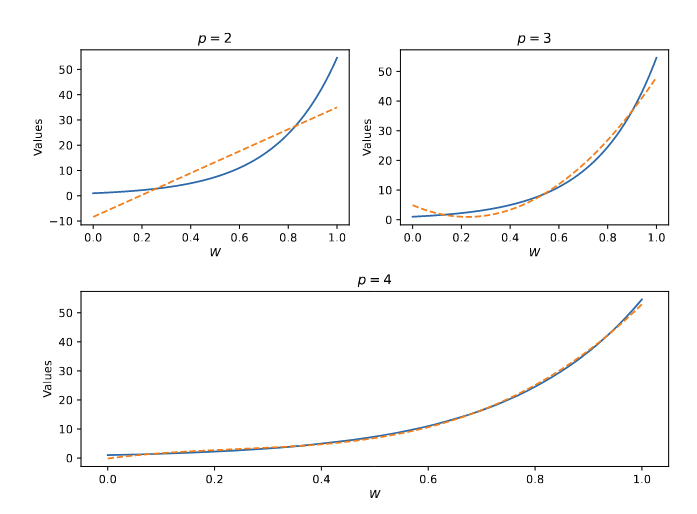

## Statistical Properties of Linear Regression 
In finite samples $(X_i, Y_i)_{i=1}^n$ are i.i.d. random variables, the Ordinary Least Squares (OLS) estimator of $\hat{\beta}$ is given by:
$$
\min_{b\in\mathbb{R}^p} \frac{1}{n}\sum_{i=1}^n (Y_i - b'X_i)^2 
$$
* The first-order condition is $\frac{1}{n}\sum_{i=1}^n (Y_i - b'X_i)X_i = 0$
* Define $\hat{\epsilon}_i:=Y_i-\hat{\beta}'X_i$, then we have 
  $$
  \frac{1}{n}\sum_{i=1}^n \hat{\epsilon}_i X_i = 0
  $$
* The key question is whether $\hat{\beta}$ estimates $\beta$ well.

### Approximation of BLP by OLS 
Intuitively, to estimate each parameter $\beta_j$ we need to have enough variation in $X_j$ (many observations per parameter) to identify the parameter, i.e., $n/p$ should be large enough 

> **Theorem**: (Approximation of BLP by OLS) Under regularity conditions, 
> $$
> \sqrt{E_x(\beta ' X-\hat{\beta}'X)^2} = \sqrt{(\hat{\beta}-\beta)'E_x(X X')(\hat{\beta}-\beta)} \\
> \leq const_p \sqrt{E(\epsilon^2)} \sqrt{\frac{p}{n}} $$
> The inequality holds with probability 1 as $n\to\infty$.

* When $p/n$ is small, the sample BLP approximates the population/true BLP well. 

### Analysis of Variance 
* The ratio of explained variation to the total variation is the **poluation $R^2$**:
$$
R_{pop}^2 = \frac{E[(\hat{\beta}'X)^2]}{E[Y^2]} = 1 -\frac{ E[\epsilon^2]}{E[Y^2]} \in [0,1]
$$
* The sample $R^2$ is defined as:
$$
R_{sample}^2 = 1 - \frac{E_n[\hat{\epsilon}^2]}{E_n[Y^2]} = 1 - \frac{E_n[\hat{\epsilon}^2]}{E_n[Y^2]} \in [0,1]
$$
 > When $p/n$ is small, $R_{sample}^2$ approximates $R_{pop}^2$ well.

### Overfitting Problem
* When $p/n$ is not small, the in-sample BLP becomes misleading 
* Consider $p=n$ and all $X_i$ are independent, we have 
  $$
  MSE_{sample}= 0 \text{ and }R^2_{sample} = 1
  $$
  no matter what $MSE_{pop}$ and $R^2_{pop}$ are. 
* With $p<n$, **adjusted $R^2$** and *adjusted MSE* are: 
  $$
  MSE_{adj} = \frac{n}{n-p} E_n[\hat{\epsilon}^2] \text{ and } R^2_{adj} = 1 - \frac{n}{n-p} \frac{E_n[\hat{\epsilon}^2]}{E_n[Y^2]}
  $$
  > $\frac{n}{n-p}$ corrects for overfitting. The intuition is that the in-sample fit increases as the number of parameters increase and potentially causes overfitting. 

In [33]:
import numpy as np
import statsmodels.api as sm
import warnings
warnings.simplefilter('ignore')

In [56]:
def regression_stats(n, p):
    np.random.seed(123)
    X = np.random.normal(size=(n, p))
    y = np.random.normal(size=(n, 1))
    R2 = sm.OLS(y, X).fit().rsquared
    R2_adj = sm.OLS(y, X).fit().rsquared_adj
    return R2, R2_adj

In [60]:
n = 1000
i = 0  
R2vec = np.zeros(7)
R2_adjvec = np.zeros(7)
# Loop over different values of p
for p in [50, 100, 200, 500, 800, 900, 1000]:
    R2, R2_adj = regression_stats(n, p)
    R2vec[i] = R2
    R2_adjvec[i] = R2_adj
    i = i + 1

Text(0.5, 1.0, 'R2 and R2_adj vs Number of Predictors')

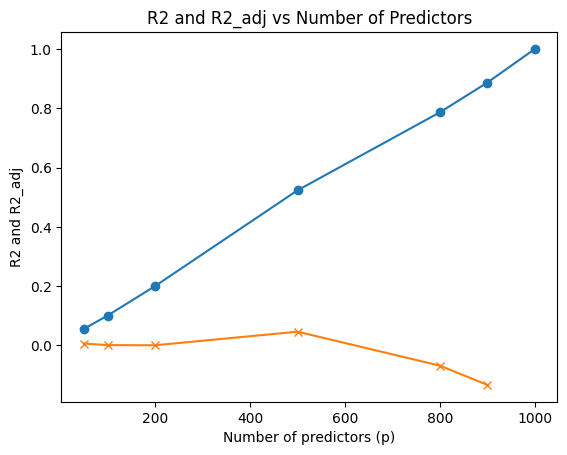

In [67]:
# plot the results
import matplotlib.pyplot as plt
plt.plot([50, 100, 200, 500, 800, 900, 1000], R2vec, "-o",label='R2')
plt.plot([50, 100, 200, 500, 800, 900, 1000], R2_adjvec,"-x", label='R2_adj')
plt.xlabel('Number of predictors (p)')
plt.ylabel('R2 and R2_adj')
plt.title('R2 and R2_adj vs Number of Predictors')

### Sample Splitting 
*Data splitting* is a common practice to measure predictive performance. The idea is as follows:
>    1. Use a **training sample** to estimate the model'
>    2. Use a **test sample** to evaluate the quality of the prediction rule, using $MSE$ and $R^2$

Formally, we define the **data splitting procedure** as:
> 1. *Randomly* partition the data into **training** and **testing** samples: $n$ observations for training and $m$ observations for testing.
> 2. Use the **training sample** to compute a prediction rule $\hat{f}(X)$. e.g., $\hat{f}(X) = \hat{\beta}'X$.
> 3. Use the **testing sample** to compute the prediction error:$MSE_{test}$ and $R^2_{test}$. 

* **Cross-validation** is a more data-efficient evaluation procedure. 
* **Stratified splitting** guarantees that the training and testing samples are similar. 

### Inference 
Let $X = (D, W')'$, where $D$ is the regressor of interest and $W$ other regressors/controls/covariates, we write the model as 
\begin{equation*}
Y = \underbrace{\beta_1 D + \beta_2 W}_{\text{predicted value}}+ \underbrace{\epsilon}_{\text{error}}
\end{equation*}
> The **Frisch-Waugh-Loveall Theorem**: 
> $$
> \beta_1 = argmin_{b1}E[(\tilde{Y}-b_1 \tilde{D})^2] =(E[\tilde{D}^2])^{-1}E[\tilde{D}\tilde{Y}]
> $$
> where $\tilde{Y}$ and $\tilde{D}$ are the residuals of $Y$ and $D$ after regressing on $W$.



> **Inference**: Under regularity conditions and if $p/n \approx 0$: 
> $$
> \sqrt{n}(\hat{\beta_1}-\beta_1) \xrightarrow{d} N(0, (E[\tilde{D}^2])^{-1}E[\tilde{D}^2\tilde{\epsilon}^2]E[\tilde{D}^2])^{-1})
> $$

* Then the 95% confidence interval can be constructed as:
$$
\left [\hat{\beta_1} - 1.96 \sqrt{\hat{V}/n} , \hat{\beta_1} + 1.96 \sqrt{\hat{V}/n}\right]
$$

## Application: Wage Prediction
In labor economics an important question is what determines the wage of workers. This is a causal question, but we could begin to investigate from a predictive perspective.

In the following wage example,  𝑌  is the `(log) hourly wage of a worker` and  𝑋  is a vector of `worker's characteristics`, e.g., education, experience, sex. Two main questions here are:

* How to use job-relevant characteristics, such as education and experience, to best predict wages?

* What is the difference in predicted wages between male and female workers with the same job-relevant characteristics?

In this lab, we focus on the prediction question first.

## Data

The data set we consider is from the March Supplement of the U.S. Current Population Survey, year 2015. 
* We select white non-hispanic individuals, aged 25 to 64 years, and working more than 35 hours per week during at least 50 weeks of the year. 
* We exclude self-employed workers; individuals living in group quarters; individuals in the military, agricultural or private household sectors; individuals with inconsistent reports on earnings and employment status; individuals with allocated or missing information in any of the variables used in the analysis; and individuals with hourly wage below  3 .

* The variable of interest  𝑌  is the (log) hourly wage rate constructed as the `ratio of the annual earnings to the total number of hours worked`, which is constructed in turn as the product of number of weeks worked and the usual number of hours worked per week. 
* Focus on single (never married) workers. The final sample is of size  $n=5150$ .

In [35]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import sklearn.linear_model as lm
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import warnings
# ignore potential convergence warnings; for some small penalty levels,
# tried out, optimization might not converge
warnings.simplefilter('ignore')

## Data Analysis

In [36]:
file = "https://raw.githubusercontent.com/CausalAIBook/MetricsMLNotebooks/main/data/wage2015_subsample_inference.csv"
df = pd.read_csv(file)
df.describe()

,wage,lwage,sex,shs,hsg,scl,clg,ad,mw,so,we,ne,exp1,exp2,exp3,exp4,occ,occ2,ind,ind2
count,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000
mean,23.410410,2.970787,0.444466,0.023301,0.243883,0.278058,0.317670,0.137087,0.259612,0.296505,0.216117,0.227767,13.760583,3.018925,8.235867,25.118038,5310.737476,11.670874,6629.154951,13.316893
std,21.003016,0.570385,0.496955,0.150872,0.429465,0.448086,0.465616,0.343973,0.438464,0.456761,0.411635,0.419432,10.609465,4.000904,14.488962,53.530225,11874.356080,6.966684,5333.443992,5.701019
min,3.021978,1.105912,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,1.000000,370.000000,2.000000
25%,13.461538,2.599837,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.250000,0.125000,0.062500,1740.000000,5.000000,4880.000000,9.000000
50%,19.230769,2.956512,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,1.000000,1.000000,1.000000,4040.000000,13.000000,7370.000000,14.000000
75%,27.777778,3.324236,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,21.000000,4.410000,9.261000,19.448100,5610.000000,17.000000,8190.000000,18.000000
max,528.845673,6.270697,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,47.000000,22.090000,103.823000,487.968100,100000.000000,22.000000,100000.000000,22.000000


### Variable Construction and Regression

We are constructing the output variable  $Y$  and the matrix  $Z$  which includes the characteristics of workers

In [37]:
Y = np.log(df['wage'])
Z = df.drop(['wage', 'lwage'], axis=1)
Z.shape

(5150, 18)

For the outcome variable (log) wage and a subset of the raw regressors, we calculate the empirical mean and other empirical measures to get familiar with the data.



In [38]:
Z.describe()

,sex,shs,hsg,scl,clg,ad,mw,so,we,ne,exp1,exp2,exp3,exp4,occ,occ2,ind,ind2
count,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000
mean,0.444466,0.023301,0.243883,0.278058,0.317670,0.137087,0.259612,0.296505,0.216117,0.227767,13.760583,3.018925,8.235867,25.118038,5310.737476,11.670874,6629.154951,13.316893
std,0.496955,0.150872,0.429465,0.448086,0.465616,0.343973,0.438464,0.456761,0.411635,0.419432,10.609465,4.000904,14.488962,53.530225,11874.356080,6.966684,5333.443992,5.701019
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,1.000000,370.000000,2.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.250000,0.125000,0.062500,1740.000000,5.000000,4880.000000,9.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,1.000000,1.000000,1.000000,4040.000000,13.000000,7370.000000,14.000000
75%,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,21.000000,4.410000,9.261000,19.448100,5610.000000,17.000000,8190.000000,18.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,47.000000,22.090000,103.823000,487.968100,100000.000000,22.000000,100000.000000,22.000000


E.g., the share of female workers in our sample is ~44% ( 𝑠𝑒𝑥=1  if female).

In [39]:
# if you want to print this table to latex
# print(Z.describe().style.to_latex())

## Prediction Question
Now, we will construct a prediction rule for hourly (log) wage  $Y$, which depends linearly on job-relevant characteristics  $X$:
$$
Y = \beta'X + \epsilon
$$
where  $X$  is a vector of characteristics of the worker, including `Female`,  `Some High School`, `High School Graduate`, `Some College`, `College Graduate`, `Advanced Degree`,  `Experience`.

Our goals are:

* Predict wages using various characteristics of workers.

* Assess the predictive performance of a given model using the (adjusted) sample MSE, the (adjusted) sample $R^2$ and the out-of-sample MSE and $R^2$.

### Measuring Prediction Quality
Toward answering the latter, we measure the prediction quality of the two models via **data splitting**:

- Randomly split the data into one training sample and one testing sample. Here we just use a simple method (stratified splitting is a more sophisticated version of splitting that we might consider).
- Use the training sample to estimate the parameters of the Basic Model and the Flexible Model.
- Before using the testing sample, we evaluate in-sample fit.


In [40]:
# split the data into train and test sets
# 80% train, 20% test   
# set random_state to ensure reproducibility
train, test = train_test_split(df, test_size=0.20, random_state=123)


We employ two different specifications for prediction:


1. **Basic Model**:   $X$ consists of a set of raw regressors (e.g. gender, experience, education indicators,  occupation and industry indicators and regional indicators).


2. **Flexible Model**:  $X$ consists of all raw regressors from the basic model plus a *dictionary of transformations** (e.g., ${exp}^2$ and ${exp}^3$) and additional two-way interactions of a polynomial in experience with other regressors. An example of a regressor created through a two-way interaction is *experience* times the indicator of having a *college degree*.

* Using the **Flexible Model** enables us to approximate the real relationship by a more complex regression model and therefore to reduce the bias. 
  
* The **Flexible Model** increases the range of potential shapes of the estimated regression function. In general, flexible models often deliver higher prediction accuracy but are harder to interpret.

## Data-Splitting: In-sample performance

Let us fit both models to our data by running ordinary least squares (ols):

In [41]:
# 1. Basic Model
model_base = 'lwage ~ sex + exp1 + shs + hsg+ scl + clg + mw + so + we + C(occ2) + C(ind2)'
base = smf.ols(model_base, data=train)
results_base = base.fit()

In [42]:
# R-squared and MSE for the basic model
rsquared_base = results_base.rsquared
rsquared_adj_base = results_base.rsquared_adj
mse_base = np.mean(results_base.resid**2)
mse_adj_base = results_base.mse_resid
print(f'Rsquared={rsquared_base:.4f}')
print(f'Rsquared_adjusted={rsquared_adj_base:.4f}')
print(f'MSE={mse_base:.4f}')
print(f'MSE_adjusted={mse_adj_base:.4f}')

Rsquared=0.3176
Rsquared_adjusted=0.3092
MSE=0.2202
MSE_adjusted=0.2229


In [43]:
# verify the formulas
X, y = base.data.exog, base.data.endog
n, p = X.shape
mse = np.mean((y - results_base.predict(X, transform=False))**2)
mse_adj = mse * n / (n - p)
rsquared = 1 - mse / np.var(y)
rsquared_adj = 1 - mse_adj / np.var(y)
print(f'Rsquared={rsquared:.4f}')
print(f'Rsquared_adjusted={rsquared_adj:.4f}')
print(f'MSE={mse:.4f}')
print(f'MSE_adjusted={mse_adj:.4f}')

Rsquared=0.3176
Rsquared_adjusted=0.3091
MSE=0.2202
MSE_adjusted=0.2229


In [44]:
# 2. Flexible Model
model_flex = ('lwage ~ sex + shs+hsg+scl+clg+C(occ2)+C(ind2)+mw+so+we '
              '+ (exp1+exp2+exp3+exp4)*(shs+hsg+scl+clg+C(occ2)+C(ind2)+mw+so+we)')
flex = smf.ols(model_flex, data=train)
results_flex = flex.fit()

In [45]:
rsquared_flex = results_flex.rsquared
rsquared_adj_flex = results_flex.rsquared_adj
mse_flex = np.mean(results_flex.resid**2)
mse_adj_flex = results_flex.mse_resid
print(f'Rsquared={rsquared_flex:.4f}')
print(f'Rsquared_adjusted={rsquared_adj_flex:.4f}')
print(f'MSE={mse_flex:.4f}')
print(f'MSE_adjusted={mse_adj_flex:.4f}')

Rsquared=0.3643
Rsquared_adjusted=0.3241
MSE=0.2051
MSE_adjusted=0.2181


In [46]:
# make a table of results for two models
results = pd.DataFrame({
    'Model': ['Baseline', 'Flexible'],
    'R2': [rsquared_base, rsquared_flex],
    'R2_adj': [rsquared_adj_base, rsquared_adj_flex],
    'MSE': [mse_base, mse_flex],
    'MSE_adj': [mse_adj_base, mse_adj_flex]
})
results = results.set_index('Model')
# print the table to html
print(results)

                R2    R2_adj       MSE   MSE_adj
Model                                           
Baseline  0.317622  0.309237  0.220187  0.222947
Flexible  0.364346  0.324146  0.205110  0.218135


### Inference
#### Impact of Gender on Wages 
**Question**: What is the difference in predicted wages between male and female workers with the same job-relevant characteristics?
we consider the following log-linear regression model

\begin{align*} \log(Y) &= \beta'X + \epsilon\\ &= \beta_1 D + \beta_2' W + \epsilon, \end{align*}
* $D$ is the indicator of being female ($1$ if female and $0$ otherwise) and the $W$'s are controls explaining variation in wages. 
* Considering transformed wages by the logarithm, we are analyzing the relative difference in the payment of male and female workers.


In [47]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
import sys
from sklearn.base import BaseEstimator
import warnings
# ignore potential convergence warnings; for some small
# penalty levels, tried out, optimization might not converge
warnings.simplefilter('ignore')

In [48]:
#descriptive statistics for wage gaps of sex
table = pd.DataFrame()
cols = ["lwage", "sex", "shs", "hsg", "scl",
        "clg", "ad", "ne", "mw", "so", "we", "exp1"]
table['Variable'] = ["Log Wage", "Sex", "Less then High School",
                     "High School Graduate", "Some College",
                     "Gollage Graduate", "Advanced Degree",
                     "Northeast", "Midwest", "South", "West", "Experience"]
table['All'] = df[cols].mean().values
table['Male'] = df[df['sex'] == 0][cols].mean().values
table['Female'] = df[df['sex'] == 1][cols].mean().values
# Show results
table

,Variable,All,Male,Female
0,Log Wage,2.970787,2.987830,2.949485
1,Sex,0.444466,0.000000,1.000000
2,Less then High School,0.023301,0.031807,0.012669
3,High School Graduate,0.243883,0.294303,0.180865
4,Some College,0.278058,0.273331,0.283967
5,Gollage Graduate,0.317670,0.293953,0.347313
6,Advanced Degree,0.137087,0.106606,0.175186
7,Northeast,0.227767,0.221950,0.235037
8,Midwest,0.259612,0.259000,0.260376
9,South,0.296505,0.298148,0.294452


In [49]:
# compute the wage difference 
table.loc[0, 'Female'] - table.loc[0, 'Male']

-0.03834473367441449

#### Unconditional Effect of Sex 
The unconditional wage gap is about  $3.8\%$ for the group of never married workers (female workers get paid less on average in our sample). 

This unconditional (predictive) effect of sex equals the coefficient  $\beta$  in the univariate ols regression of  $Y$  on  $D$ :

$$
log(Y)=\beta D+\epsilon.
$$

We verify this by running an ols regression.

In [50]:
# regression without controls with robust standard errors
nocontrol_fit = smf.ols("lwage ~ sex", data=df).fit()
nocontrol_est = nocontrol_fit.params['sex']
nocontrol_se = nocontrol_fit.HC3_se['sex']

print(f"The estimated sex coefficient is: {nocontrol_est:.4f} ")
print(f"and the corresponding robust standard error is: {nocontrol_se:.4f}")

The estimated sex coefficient is: -0.0383 
and the corresponding robust standard error is: 0.0159


#### Regression with Covariates 
We run an ols regression of  $Y$  on  $(D,W)$  to control for the effect of covariates summarized in  $W$ :

$$
log(Y)=\beta_1 D + \beta_2' W + \epsilon.
$$

Here $W$ controls for `experience`, `education`, `region`, and `occupation` and `industry indicators` plus transformations and two-way interactions.

In [51]:
# Ols regression with controls
flex = "lwage ~ sex + (exp1+exp2+exp3+exp4)*(shs+hsg+scl+clg+C(occ2)+C(ind2)+mw+so+we)"
# Note that ()*() operation in formula objects in statsmodels
# creates a formula of the sort:
#  (exp1+exp2+exp3+exp4)+ (shs+hsg+scl+clg+occ2+ind2+mw+so+we)
#  + (exp1+exp2+exp3+exp4)*(shs+hsg+scl+clg+occ2+ind2+mw+so+we)
control_fit = smf.ols(flex, data=df).fit()
control_est = control_fit.params['sex']
control_se = control_fit.HC3_se['sex']
control_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  lwage   R-squared:                       0.351
Model:                            OLS   Adj. R-squared:                  0.319
Method:                 Least Squares   F-statistic:                     10.83
Date:                Tue, 22 Apr 2025   Prob (F-statistic):          2.69e-305
Time:                        07:20:36   Log-Likelihood:                -3301.9
No. Observations:                5150   AIC:                             7096.
Df Residuals:                    4904   BIC:                             8706.
Df Model:                         245                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              3.8603      0.429      9.006      0.000       3.020       4.701
C(occ2)[T.2]           0.1613      0.130      1.244      0.214      -0.093       0.416
C(occ2)[T.3]           0.2102      0.169      1.246      0.213      -0.121       0.541
C(occ2)[T.4]           0.0709      0.184      0.386      0.700      -0.289       0.431
C(occ2)[T.5]          -0.3960      0.189     -2.100      0.036      -0.766      -0.026
C(occ2)[T.6]          -0.2311      0.187     -1.236      0.217      -0.598       0.135
C(occ2)[T.7]           0.3147      0.194      1.621      0.105      -0.066       0.695
C(occ2)[T.8]          -0.1875      0.169     -1.108      0.268      -0.519       0.144
C(occ2)[T.9]          -0.3390      0.167     -2.027      0.043      -0.667      -0.011
C(occ2)[T.10]          0.0210      0.156      0.134      0.893      -0.286       0.328
C(occ2)[T.11]         -0.6424      0.309     -2.078      0.038      -1.248      -0.036
C(occ2)[T.12]         -0.0675      0.252     -0.268      0.789      -0.562       0.427
C(occ2)[T.13]         -0.2330      0.232     -1.006      0.314      -0.687       0.221
C(occ2)[T.14]          0.2562      0.323      0.794      0.427      -0.376       0.889
C(occ2)[T.15]         -0.1939      0.260     -0.747      0.455      -0.703       0.315
C(occ2)[T.16]         -0.0551      0.147     -0.375      0.708      -0.343       0.233
C(occ2)[T.17]         -0.4156      0.136     -3.053      0.002      -0.682      -0.149
C(occ2)[T.18]         -0.4822      1.044     -0.462      0.644      -2.530       1.565
C(occ2)[T.19]         -0.2579      0.333     -0.776      0.438      -0.910       0.394
C(occ2)[T.20]         -0.3010      0.234     -1.286      0.199      -0.760       0.158
C(occ2)[T.21]         -0.4272      0.221     -1.936      0.053      -0.860       0.005
C(occ2)[T.22]         -0.8695      0.298     -2.922      0.003      -1.453      -0.286
C(ind2)[T.3]          -1.2474      0.645     -1.932      0.053      -2.513       0.018
C(ind2)[T.4]          -0.0948      0.464     -0.205      0.838      -1.004       0.814
C(ind2)[T.5]          -0.5294      0.435     -1.218      0.223      -1.381       0.323
C(ind2)[T.6]          -0.6222      0.435     -1.431      0.152      -1.474       0.230
C(ind2)[T.7]          -0.5047      0.502     -1.005      0.315      -1.490       0.480
C(ind2)[T.8]          -0.7295      0.467     -1.561      0.119      -1.646       0.187
C(ind2)[T.9]          -0.8025      0.425     -1.887      0.059      -1.636       0.031
C(ind2)[T.10]         -0.5806      0.481     -1.207      0.227      -1.523       0.362
C(ind2)[T.11]         -0.9852      0.448     -2.198      0.028      -1.864      -0.107
C(ind2)[T.12]         -0.7376      0.424     -1.738      0.082      -1.569       0.094
C(ind2)[T.13]         -1.0183      0.4

In [52]:
print(f"The estimated sex coefficient: {control_est:.4f} ")
print(f"The corresponding robust standard error: {control_se:.4f}")

The estimated sex coefficient: -0.0696 
The corresponding robust standard error: 0.0157


* The estimated regression coefficient  $\beta_1≈-0.06955$  measures how our linear prediction of wage changes if we set the sex variable  $D$  from 0 to 1, holding the controls  $W$  fixed. 

* We can call this the predictive effect (PE), as it measures the impact of a variable on the prediction we make. 
  
* The unconditional wage gap of size  4 \% for female workers increases to about  7 \% after controlling for worker characteristics.

We now show how the conditional gap and the remainder decompose the marginal wage gap into the parts explained and unexplained by the additional controls.

In [53]:
flex_without_sex = "lwage ~ (exp1+exp2+exp3+exp4)*(shs+hsg+scl+clg+C(occ2)+C(ind2)+mw+so+we)"
lm0 = smf.ols(flex_without_sex, data=df[df["sex"] == 0])
lm1 = smf.ols(flex_without_sex, data=df[df["sex"] == 1])
XX0 = lm0.exog #explantory variables beta_hat*X
y0 = lm0.endog #y_hat 
XX1 = lm1.exog
y1 = lm1.endog
# the coefficients excluding intercept and "sex"
betarest = control_fit.params[control_fit.params.index != "sex"][1:]
print("The marginal gap:", y1.mean() - y0.mean())
diff_unexplained = control_est
print("The unexplained difference: ", diff_unexplained)
diff_explained = betarest.dot(XX1.mean(0)[1:] - XX0.mean(0)[1:])
print("The explained difference:", diff_explained)
print("The sum of these differences:", diff_unexplained + diff_explained)

The marginal gap: -0.03834473367441449
The unexplained difference:  -0.06955320329684066
The explained difference: 0.031208469622388935
The sum of these differences: -0.03834473367445172


To understand the estimate, we can take average for the male and female groups:
\begin{align*}
\underbrace{E_n[Y|D=1] - E_n[Y|D=0]}_{-0.038} &= \\
\underbrace{\hat{\beta}_1}_{-0.070} + &\underbrace{\hat{\beta}'_2(E_n(W|D=1)-E_n(W|D=0))}_{0.031}
\end{align*}

* $E_n(\cdot)$ is the sample average 

### Oaxaca-Blinder Decomposition 
We can augment the original model by adding interaction of sex and other characteristics:
$$
Y = \beta_1 D + \beta_2' W + \beta_3'W\cdot D + \epsilon 
$$
This provides an alternative decomposition:

\begin{align*}
\underbrace{E_n[Y|D=1] - E_n[Y|D=0]}_{-0.038} &= \\
\underbrace{\hat{\beta}_1}_{-2.320} + \underbrace{\hat{\beta}'_2(E_n(W|D=1)-E_n(W|D=0))}_{0.002} & +\underbrace{\hat{\beta}_3' E_n[W|D=1]}_{2.280}
\end{align*}

* Attributed to difference in $W$: `0.002`
* Attributed to different predictive effect of $W$: `2.280`
* Unexplained difference: `-2.320` 

In [54]:
# The oaxaca decomposition
u1, s1, v1 = np.linalg.svd(XX1)
u0, s0, v0 = np.linalg.svd(XX0)
s1[s1 <= 1e-10] = 0
s1[s1 > 1e-10] = 1 / s1[s1 > 1e-10]
beta1 = (s1 * s1 * v1.T).dot(v1).dot(XX1.T).dot(y1)
s0[s0 <= 1e-10] = 0
s0[s0 > 1e-10] = 1 / s0[s0 > 1e-10]
beta0 = (s0 * s0 * v0.T).dot(v0).dot(XX0.T).dot(y0)
print("The marginal gap: ", y1.mean() - y0.mean())
diff_unexplained = beta1[0] - beta0[0]
print("The unexplained difference: ", diff_unexplained)
diff_endow = beta0.dot(XX1.mean(0) - XX0.mean(0))
print("The difference explained by covariates: ", diff_endow)
diff_coeff = (beta1[1:] - beta0[1:]).dot(XX1.mean(0)[1:])
print("The difference explained by interaction: ", diff_coeff)
print("The sum of these differences: ", diff_unexplained + diff_endow + diff_coeff)

The marginal gap:  -0.03834473367441449
The unexplained difference:  -2.3202078245207662
The difference explained by covariates:  0.0015954716257246097
The difference explained by interaction:  2.2802675893099984
The sum of these differences:  -0.03834476358504313


### Partialling-Out using Frisch-Waugh-Lovell Theorem 

We can partial-out the linear effect of the controls via OLS through the following procedures:
1. Regress $Y$ on the controls $W$ to get $\tilde{Y}$;
   
2. Regress $X$ on the controls $W$ to get $\tilde{X}$;

3. Regress $\tilde{Y}$ on $\tilde{X}$

In [68]:
# Partialling-Out using ols
# models
flex_y = "lwage ~  (exp1+exp2+exp3+exp4)*(shs+hsg+scl+clg+C(occ2)+C(ind2)+mw+so+we)"  # model for Y
flex_d = "sex ~ (exp1+exp2+exp3+exp4)*(shs+hsg+scl+clg+C(occ2)+C(ind2)+mw+so+we)"  # model for D
# partialling-out the linear effect of W from Y
t_Y = smf.ols(flex_y, data=df).fit().resid
# partialling-out the linear effect of W from D
t_D = smf.ols(flex_d, data=df).fit().resid
# regression of Y on D after partialling-out the effect of W
partial_fit = sm.OLS(t_Y, t_D).fit()
partial_est = partial_fit.params['x1']
print("Coefficient for D via partialling-out " + str(partial_est))
# standard error
partial_se = partial_fit.HC3_se['x1']
# confidence interval
print("95% CI: " + str(partial_fit.conf_int().values[0]))

Coefficient for D via partialling-out -0.06955320329684576
95% CI: [-0.09866859 -0.04043781]


In [69]:
print(f"The estimated sex coefficient is {partial_est:.4f} "
      f"and the corresponding robust standard error is {partial_se:.4f}")

The estimated sex coefficient is -0.0696 and the corresponding robust standard error is 0.0150


* The estimated coefficient measures the linear predictive effect (PE) of  $D$  on  $Y$  after taking out the linear effect of  $W$  on both of these variables.
  
* The partialling-out approach works well when the dimension of $W$ is low in relation to the sample size  $n$ . When the dimension of  $W$  is relatively high, we need to use variable selection or penalization for regularization purposes.

### OLS Overfitting Problem

We try an "extra" flexible model, where we take interactions of all controls, giving us about 1000 controls. To illustrate how OLS can overfit, we subset to the first 1000 observations so that $p \approx n$.

In [72]:
subset, test = train_test_split(df, train_size=1000, random_state=2724)
# model
extraflex = "lwage ~ sex + (exp1+exp2+exp3+exp4+shs+hsg+scl+clg+C(occ2)+C(ind2)+mw+so+we)**2"
control_fit_extra = smf.ols(extraflex, data=subset).fit()
control_extra_est = control_fit_extra.params['sex']
R2 = control_fit_extra.rsquared
R2_adj = control_fit_extra.rsquared_adj
n = subset.shape[0]
p = control_fit_extra.params.shape[0]
# Jackknife. Python regularizes in the background. Theory shouldn't really work here.
# Cattaneo, Jannson, and Newey (2018) (CJN) do verify that jackknife is valid,
# in the sense of being upward biased, in high-dimensional settings under
# regularity.
control_extra_se = control_fit_extra.HC3_se["sex"]
# HC0 will not work here. CJN show it is inconsistent even
# in moderate dimensional settings.
control_extra_se_HC0 = control_fit_extra.HC0_se["sex"]
# We should probably implement Cattaneo, Jannson, and Newey (2018)'s procedure -
# though it's not clear their regularity conditions would apply here anyway.
print("Number of Extra-Flex Controls: " + str(p - 1))
print("Coefficient of sex with extra flex controls: " + str(control_extra_est))
print("R-squared: " + str(R2))
print("R-squared adjusted: " + str(R2_adj))

Number of Extra-Flex Controls: 979
Coefficient of sex with extra flex controls: -0.0735508763751175
R-squared: 0.7607517491390923
R-squared adjusted: 0.3791973958180602


## Introduction to Machine Learning: Applications in Economics 

Zhiyuan Chen

*Empirical Methods*

**Remin Business School**

**2025 Spring** 

## Roadmap 
- **Regression and the Best Linear Prediction Problem**
  - **Properties of Linear Regression** 
  - **Problem of Overfitting**
  - *Application: Wage Prediction*

## Foundations of Linear Regression 
### Best Linear Predictor
The **Linear Regrssion** is to find the best linear predictor of the interested dependent variable $Y$ given the independent variables $X=(X_1, X_2,\cdots,X_p)$ by minimizing the *Mean Squared Error (MSE)*:
$$
\min_{b\in\mathbb{R}^p} E [(Y - b'X)^2],
$$
* The first-order conditions imply that: $E[(Y - \beta'X)X] = 0$
* Define the error as $\epsilon = Y - \beta'X$, then we have $E(\epsilon X) = 0$
* The Best Linear Predictor (BLP) provides a simple decomposition of the dependent variable $Y$:
$$
Y = \beta'X + \epsilon,
$$

### Best Linear Approximation Property 

By the law of iterated expectations:
$$
E[(Y - \beta'X)X] = 0 \Rightarrow E[(E[Y|X]-\beta ' X)X] =0 
$$

* The BLP of $Y$ is also the BLP for the conditional expectation given $X$, $E[Y|X]$
* This motivates the use of various transformations of regressors to form $X$ 

### From BLP to Best Predictor
Let $W$ be "raw" regressors/features, *constructed regressors* are of the form:
$$
X = T(W)=(T_1(W), T_2(W), \cdots, T_p(W))'
$$
* $T(W)$ is called *dictionary* of transformations 
* E.g., polynomials, interactions terms, logarithms, etc.

The **Best Predictor** of $Y$ solves the following best prediction problem:
$$
\min_{m(W)}E[(Y - m(W))^2].
$$

* The linear predictor provides the best linear approximation to the best predictor:
 \begin{equation*}
E[(Y-b'T(W))^2] = \underbrace{E[(g(W) - b'T(W))^2]}_{\text{mean squared prediction error}} + E[(Y-g(W))^2]
\end{equation*}
> Minimizing the MSE of the linear predictor is equivalent to minimizing the mean squared approximation error!

### Example: Approximating a Smooth Function with a Polynomial Dictionary 
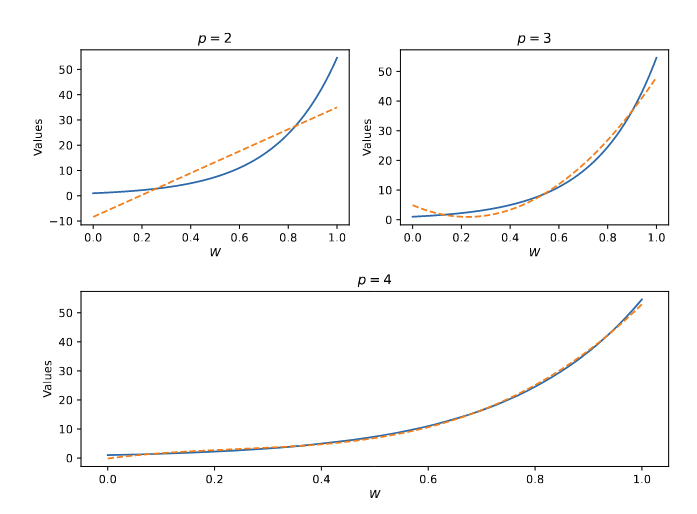

## Statistical Properties of Linear Regression 
In finite samples $(X_i, Y_i)_{i=1}^n$ are i.i.d. random variables, the Ordinary Least Squares (OLS) estimator of $\hat{\beta}$ is given by:
$$
\min_{b\in\mathbb{R}^p} \frac{1}{n}\sum_{i=1}^n (Y_i - b'X_i)^2 
$$
* The first-order condition is $\frac{1}{n}\sum_{i=1}^n (Y_i - b'X_i)X_i = 0$
* Define $\hat{\epsilon}_i:=Y_i-\hat{\beta}'X_i$, then we have 
  $$
  \frac{1}{n}\sum_{i=1}^n \hat{\epsilon}_i X_i = 0
  $$
* The key question is whether $\hat{\beta}$ estimates $\beta$ well.

### Approximation of BLP by OLS 
Intuitively, to estimate each parameter $\beta_j$ we need to have enough variation in $X_j$ (many observations per parameter) to identify the parameter, i.e., $n/p$ should be large enough 

> **Theorem**: (Approximation of BLP by OLS) Under regularity conditions, 
> $$
> \sqrt{E_x(\beta ' X-\hat{\beta}'X)^2} = \sqrt{(\hat{\beta}-\beta)'E_x(X X')(\hat{\beta}-\beta)} \\
> \leq const_p \sqrt{E(\epsilon^2)} \sqrt{\frac{p}{n}} $$
> The inequality holds with probability 1 as $n\to\infty$.

* When $p/n$ is small, the sample BLP approximates the population/true BLP well. 

### Analysis of Variance 
* The ratio of explained variation to the total variation is the **poluation $R^2$**:
$$
R_{pop}^2 = \frac{E[(\hat{\beta}'X)^2]}{E[Y^2]} = 1 -\frac{ E[\epsilon^2]}{E[Y^2]} \in [0,1]
$$
* The sample $R^2$ is defined as:
$$
R_{sample}^2 = 1 - \frac{E_n[\hat{\epsilon}^2]}{E_n[Y^2]} = 1 - \frac{E_n[\hat{\epsilon}^2]}{E_n[Y^2]} \in [0,1]
$$
 > When $p/n$ is small, $R_{sample}^2$ approximates $R_{pop}^2$ well.

### Overfitting Problem
* When $p/n$ is not small, the in-sample BLP becomes misleading 
* Consider $p=n$ and all $X_i$ are independent, we have 
  $$
  MSE_{sample}= 0 \text{ and }R^2_{sample} = 1
  $$
  no matter what $MSE_{pop}$ and $R^2_{pop}$ are. 
* With $p<n$, **adjusted $R^2$** and *adjusted MSE* are: 
  $$
  MSE_{adj} = \frac{n}{n-p} E_n[\hat{\epsilon}^2] \text{ and } R^2_{adj} = 1 - \frac{n}{n-p} \frac{E_n[\hat{\epsilon}^2]}{E_n[Y^2]}
  $$
  > $\frac{n}{n-p}$ corrects for overfitting. The intuition is that the in-sample fit increases as the number of parameters increase and potentially causes overfitting. 

In [33]:
import numpy as np
import statsmodels.api as sm
import warnings
warnings.simplefilter('ignore')

In [56]:
def regression_stats(n, p):
    np.random.seed(123)
    X = np.random.normal(size=(n, p))
    y = np.random.normal(size=(n, 1))
    R2 = sm.OLS(y, X).fit().rsquared
    R2_adj = sm.OLS(y, X).fit().rsquared_adj
    return R2, R2_adj

In [60]:
n = 1000
i = 0  
R2vec = np.zeros(7)
R2_adjvec = np.zeros(7)
# Loop over different values of p
for p in [50, 100, 200, 500, 800, 900, 1000]:
    R2, R2_adj = regression_stats(n, p)
    R2vec[i] = R2
    R2_adjvec[i] = R2_adj
    i = i + 1

Text(0.5, 1.0, 'R2 and R2_adj vs Number of Predictors')

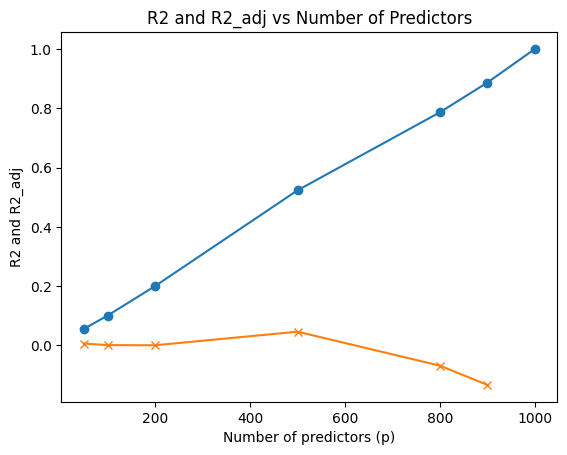

In [67]:
# plot the results
import matplotlib.pyplot as plt
plt.plot([50, 100, 200, 500, 800, 900, 1000], R2vec, "-o",label='R2')
plt.plot([50, 100, 200, 500, 800, 900, 1000], R2_adjvec,"-x", label='R2_adj')
plt.xlabel('Number of predictors (p)')
plt.ylabel('R2 and R2_adj')
plt.title('R2 and R2_adj vs Number of Predictors')

### Sample Splitting 
*Data splitting* is a common practice to measure predictive performance. The idea is as follows:
>    1. Use a **training sample** to estimate the model'
>    2. Use a **test sample** to evaluate the quality of the prediction rule, using $MSE$ and $R^2$

Formally, we define the **data splitting procedure** as:
> 1. *Randomly* partition the data into **training** and **testing** samples: $n$ observations for training and $m$ observations for testing.
> 2. Use the **training sample** to compute a prediction rule $\hat{f}(X)$. e.g., $\hat{f}(X) = \hat{\beta}'X$.
> 3. Use the **testing sample** to compute the prediction error:$MSE_{test}$ and $R^2_{test}$. 

* **Cross-validation** is a more data-efficient evaluation procedure. 
* **Stratified splitting** guarantees that the training and testing samples are similar. 

### Inference 
Let $X = (D, W')'$, where $D$ is the regressor of interest and $W$ other regressors/controls/covariates, we write the model as 
\begin{equation*}
Y = \underbrace{\beta_1 D + \beta_2 W}_{\text{predicted value}}+ \underbrace{\epsilon}_{\text{error}}
\end{equation*}
> The **Frisch-Waugh-Loveall Theorem**: 
> $$
> \beta_1 = argmin_{b1}E[(\tilde{Y}-b_1 \tilde{D})^2] =(E[\tilde{D}^2])^{-1}E[\tilde{D}\tilde{Y}]
> $$
> where $\tilde{Y}$ and $\tilde{D}$ are the residuals of $Y$ and $D$ after regressing on $W$.



> **Inference**: Under regularity conditions and if $p/n \approx 0$: 
> $$
> \sqrt{n}(\hat{\beta_1}-\beta_1) \xrightarrow{d} N(0, (E[\tilde{D}^2])^{-1}E[\tilde{D}^2\tilde{\epsilon}^2]E[\tilde{D}^2])^{-1})
> $$

* Then the 95% confidence interval can be constructed as:
$$
\left [\hat{\beta_1} - 1.96 \sqrt{\hat{V}/n} , \hat{\beta_1} + 1.96 \sqrt{\hat{V}/n}\right]
$$

## Application: Wage Prediction
In labor economics an important question is what determines the wage of workers. This is a causal question, but we could begin to investigate from a predictive perspective.

In the following wage example,  𝑌  is the `(log) hourly wage of a worker` and  𝑋  is a vector of `worker's characteristics`, e.g., education, experience, sex. Two main questions here are:

* How to use job-relevant characteristics, such as education and experience, to best predict wages?

* What is the difference in predicted wages between male and female workers with the same job-relevant characteristics?

In this lab, we focus on the prediction question first.

## Data

The data set we consider is from the March Supplement of the U.S. Current Population Survey, year 2015. 
* We select white non-hispanic individuals, aged 25 to 64 years, and working more than 35 hours per week during at least 50 weeks of the year. 
* We exclude self-employed workers; individuals living in group quarters; individuals in the military, agricultural or private household sectors; individuals with inconsistent reports on earnings and employment status; individuals with allocated or missing information in any of the variables used in the analysis; and individuals with hourly wage below  3 .

* The variable of interest  𝑌  is the (log) hourly wage rate constructed as the `ratio of the annual earnings to the total number of hours worked`, which is constructed in turn as the product of number of weeks worked and the usual number of hours worked per week. 
* Focus on single (never married) workers. The final sample is of size  $n=5150$ .

In [35]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import sklearn.linear_model as lm
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import warnings
# ignore potential convergence warnings; for some small penalty levels,
# tried out, optimization might not converge
warnings.simplefilter('ignore')

## Data Analysis

In [36]:
file = "https://raw.githubusercontent.com/CausalAIBook/MetricsMLNotebooks/main/data/wage2015_subsample_inference.csv"
df = pd.read_csv(file)
df.describe()

,wage,lwage,sex,shs,hsg,scl,clg,ad,mw,so,we,ne,exp1,exp2,exp3,exp4,occ,occ2,ind,ind2
count,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000
mean,23.410410,2.970787,0.444466,0.023301,0.243883,0.278058,0.317670,0.137087,0.259612,0.296505,0.216117,0.227767,13.760583,3.018925,8.235867,25.118038,5310.737476,11.670874,6629.154951,13.316893
std,21.003016,0.570385,0.496955,0.150872,0.429465,0.448086,0.465616,0.343973,0.438464,0.456761,0.411635,0.419432,10.609465,4.000904,14.488962,53.530225,11874.356080,6.966684,5333.443992,5.701019
min,3.021978,1.105912,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,1.000000,370.000000,2.000000
25%,13.461538,2.599837,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.250000,0.125000,0.062500,1740.000000,5.000000,4880.000000,9.000000
50%,19.230769,2.956512,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,1.000000,1.000000,1.000000,4040.000000,13.000000,7370.000000,14.000000
75%,27.777778,3.324236,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,21.000000,4.410000,9.261000,19.448100,5610.000000,17.000000,8190.000000,18.000000
max,528.845673,6.270697,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,47.000000,22.090000,103.823000,487.968100,100000.000000,22.000000,100000.000000,22.000000


### Variable Construction and Regression

We are constructing the output variable  $Y$  and the matrix  $Z$  which includes the characteristics of workers

In [37]:
Y = np.log(df['wage'])
Z = df.drop(['wage', 'lwage'], axis=1)
Z.shape

(5150, 18)

For the outcome variable (log) wage and a subset of the raw regressors, we calculate the empirical mean and other empirical measures to get familiar with the data.



In [38]:
Z.describe()

,sex,shs,hsg,scl,clg,ad,mw,so,we,ne,exp1,exp2,exp3,exp4,occ,occ2,ind,ind2
count,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000
mean,0.444466,0.023301,0.243883,0.278058,0.317670,0.137087,0.259612,0.296505,0.216117,0.227767,13.760583,3.018925,8.235867,25.118038,5310.737476,11.670874,6629.154951,13.316893
std,0.496955,0.150872,0.429465,0.448086,0.465616,0.343973,0.438464,0.456761,0.411635,0.419432,10.609465,4.000904,14.488962,53.530225,11874.356080,6.966684,5333.443992,5.701019
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,1.000000,370.000000,2.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.250000,0.125000,0.062500,1740.000000,5.000000,4880.000000,9.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,1.000000,1.000000,1.000000,4040.000000,13.000000,7370.000000,14.000000
75%,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,21.000000,4.410000,9.261000,19.448100,5610.000000,17.000000,8190.000000,18.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,47.000000,22.090000,103.823000,487.968100,100000.000000,22.000000,100000.000000,22.000000


E.g., the share of female workers in our sample is ~44% ( 𝑠𝑒𝑥=1  if female).

In [39]:
# if you want to print this table to latex
# print(Z.describe().style.to_latex())

## Prediction Question
Now, we will construct a prediction rule for hourly (log) wage  $Y$, which depends linearly on job-relevant characteristics  $X$:
$$
Y = \beta'X + \epsilon
$$
where  $X$  is a vector of characteristics of the worker, including `Female`,  `Some High School`, `High School Graduate`, `Some College`, `College Graduate`, `Advanced Degree`,  `Experience`.

Our goals are:

* Predict wages using various characteristics of workers.

* Assess the predictive performance of a given model using the (adjusted) sample MSE, the (adjusted) sample $R^2$ and the out-of-sample MSE and $R^2$.

### Measuring Prediction Quality
Toward answering the latter, we measure the prediction quality of the two models via **data splitting**:

- Randomly split the data into one training sample and one testing sample. Here we just use a simple method (stratified splitting is a more sophisticated version of splitting that we might consider).
- Use the training sample to estimate the parameters of the Basic Model and the Flexible Model.
- Before using the testing sample, we evaluate in-sample fit.


In [40]:
# split the data into train and test sets
# 80% train, 20% test   
# set random_state to ensure reproducibility
train, test = train_test_split(df, test_size=0.20, random_state=123)


We employ two different specifications for prediction:


1. **Basic Model**:   $X$ consists of a set of raw regressors (e.g. gender, experience, education indicators,  occupation and industry indicators and regional indicators).


2. **Flexible Model**:  $X$ consists of all raw regressors from the basic model plus a *dictionary of transformations** (e.g., ${exp}^2$ and ${exp}^3$) and additional two-way interactions of a polynomial in experience with other regressors. An example of a regressor created through a two-way interaction is *experience* times the indicator of having a *college degree*.

* Using the **Flexible Model** enables us to approximate the real relationship by a more complex regression model and therefore to reduce the bias. 
  
* The **Flexible Model** increases the range of potential shapes of the estimated regression function. In general, flexible models often deliver higher prediction accuracy but are harder to interpret.

## Data-Splitting: In-sample performance

Let us fit both models to our data by running ordinary least squares (ols):

In [41]:
# 1. Basic Model
model_base = 'lwage ~ sex + exp1 + shs + hsg+ scl + clg + mw + so + we + C(occ2) + C(ind2)'
base = smf.ols(model_base, data=train)
results_base = base.fit()

In [42]:
# R-squared and MSE for the basic model
rsquared_base = results_base.rsquared
rsquared_adj_base = results_base.rsquared_adj
mse_base = np.mean(results_base.resid**2)
mse_adj_base = results_base.mse_resid
print(f'Rsquared={rsquared_base:.4f}')
print(f'Rsquared_adjusted={rsquared_adj_base:.4f}')
print(f'MSE={mse_base:.4f}')
print(f'MSE_adjusted={mse_adj_base:.4f}')

Rsquared=0.3176
Rsquared_adjusted=0.3092
MSE=0.2202
MSE_adjusted=0.2229


In [43]:
# verify the formulas
X, y = base.data.exog, base.data.endog
n, p = X.shape
mse = np.mean((y - results_base.predict(X, transform=False))**2)
mse_adj = mse * n / (n - p)
rsquared = 1 - mse / np.var(y)
rsquared_adj = 1 - mse_adj / np.var(y)
print(f'Rsquared={rsquared:.4f}')
print(f'Rsquared_adjusted={rsquared_adj:.4f}')
print(f'MSE={mse:.4f}')
print(f'MSE_adjusted={mse_adj:.4f}')

Rsquared=0.3176
Rsquared_adjusted=0.3091
MSE=0.2202
MSE_adjusted=0.2229


In [44]:
# 2. Flexible Model
model_flex = ('lwage ~ sex + shs+hsg+scl+clg+C(occ2)+C(ind2)+mw+so+we '
              '+ (exp1+exp2+exp3+exp4)*(shs+hsg+scl+clg+C(occ2)+C(ind2)+mw+so+we)')
flex = smf.ols(model_flex, data=train)
results_flex = flex.fit()

In [45]:
rsquared_flex = results_flex.rsquared
rsquared_adj_flex = results_flex.rsquared_adj
mse_flex = np.mean(results_flex.resid**2)
mse_adj_flex = results_flex.mse_resid
print(f'Rsquared={rsquared_flex:.4f}')
print(f'Rsquared_adjusted={rsquared_adj_flex:.4f}')
print(f'MSE={mse_flex:.4f}')
print(f'MSE_adjusted={mse_adj_flex:.4f}')

Rsquared=0.3643
Rsquared_adjusted=0.3241
MSE=0.2051
MSE_adjusted=0.2181


In [46]:
# make a table of results for two models
results = pd.DataFrame({
    'Model': ['Baseline', 'Flexible'],
    'R2': [rsquared_base, rsquared_flex],
    'R2_adj': [rsquared_adj_base, rsquared_adj_flex],
    'MSE': [mse_base, mse_flex],
    'MSE_adj': [mse_adj_base, mse_adj_flex]
})
results = results.set_index('Model')
# print the table to html
print(results)

                R2    R2_adj       MSE   MSE_adj
Model                                           
Baseline  0.317622  0.309237  0.220187  0.222947
Flexible  0.364346  0.324146  0.205110  0.218135


### Inference
#### Impact of Gender on Wages 
**Question**: What is the difference in predicted wages between male and female workers with the same job-relevant characteristics?
we consider the following log-linear regression model

\begin{align*} \log(Y) &= \beta'X + \epsilon\\ &= \beta_1 D + \beta_2' W + \epsilon, \end{align*}
* $D$ is the indicator of being female ($1$ if female and $0$ otherwise) and the $W$'s are controls explaining variation in wages. 
* Considering transformed wages by the logarithm, we are analyzing the relative difference in the payment of male and female workers.


In [47]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
import sys
from sklearn.base import BaseEstimator
import warnings
# ignore potential convergence warnings; for some small
# penalty levels, tried out, optimization might not converge
warnings.simplefilter('ignore')

In [48]:
#descriptive statistics for wage gaps of sex
table = pd.DataFrame()
cols = ["lwage", "sex", "shs", "hsg", "scl",
        "clg", "ad", "ne", "mw", "so", "we", "exp1"]
table['Variable'] = ["Log Wage", "Sex", "Less then High School",
                     "High School Graduate", "Some College",
                     "Gollage Graduate", "Advanced Degree",
                     "Northeast", "Midwest", "South", "West", "Experience"]
table['All'] = df[cols].mean().values
table['Male'] = df[df['sex'] == 0][cols].mean().values
table['Female'] = df[df['sex'] == 1][cols].mean().values
# Show results
table

,Variable,All,Male,Female
0,Log Wage,2.970787,2.987830,2.949485
1,Sex,0.444466,0.000000,1.000000
2,Less then High School,0.023301,0.031807,0.012669
3,High School Graduate,0.243883,0.294303,0.180865
4,Some College,0.278058,0.273331,0.283967
5,Gollage Graduate,0.317670,0.293953,0.347313
6,Advanced Degree,0.137087,0.106606,0.175186
7,Northeast,0.227767,0.221950,0.235037
8,Midwest,0.259612,0.259000,0.260376
9,South,0.296505,0.298148,0.294452


In [49]:
# compute the wage difference 
table.loc[0, 'Female'] - table.loc[0, 'Male']

-0.03834473367441449

#### Unconditional Effect of Sex 
The unconditional wage gap is about  $3.8\%$ for the group of never married workers (female workers get paid less on average in our sample). 

This unconditional (predictive) effect of sex equals the coefficient  $\beta$  in the univariate ols regression of  $Y$  on  $D$ :

$$
log(Y)=\beta D+\epsilon.
$$

We verify this by running an ols regression.

In [50]:
# regression without controls with robust standard errors
nocontrol_fit = smf.ols("lwage ~ sex", data=df).fit()
nocontrol_est = nocontrol_fit.params['sex']
nocontrol_se = nocontrol_fit.HC3_se['sex']

print(f"The estimated sex coefficient is: {nocontrol_est:.4f} ")
print(f"and the corresponding robust standard error is: {nocontrol_se:.4f}")

The estimated sex coefficient is: -0.0383 
and the corresponding robust standard error is: 0.0159


#### Regression with Covariates 
We run an ols regression of  $Y$  on  $(D,W)$  to control for the effect of covariates summarized in  $W$ :

$$
log(Y)=\beta_1 D + \beta_2' W + \epsilon.
$$

Here $W$ controls for `experience`, `education`, `region`, and `occupation` and `industry indicators` plus transformations and two-way interactions.

In [51]:
# Ols regression with controls
flex = "lwage ~ sex + (exp1+exp2+exp3+exp4)*(shs+hsg+scl+clg+C(occ2)+C(ind2)+mw+so+we)"
# Note that ()*() operation in formula objects in statsmodels
# creates a formula of the sort:
#  (exp1+exp2+exp3+exp4)+ (shs+hsg+scl+clg+occ2+ind2+mw+so+we)
#  + (exp1+exp2+exp3+exp4)*(shs+hsg+scl+clg+occ2+ind2+mw+so+we)
control_fit = smf.ols(flex, data=df).fit()
control_est = control_fit.params['sex']
control_se = control_fit.HC3_se['sex']
control_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  lwage   R-squared:                       0.351
Model:                            OLS   Adj. R-squared:                  0.319
Method:                 Least Squares   F-statistic:                     10.83
Date:                Tue, 22 Apr 2025   Prob (F-statistic):          2.69e-305
Time:                        07:20:36   Log-Likelihood:                -3301.9
No. Observations:                5150   AIC:                             7096.
Df Residuals:                    4904   BIC:                             8706.
Df Model:                         245                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              3.8603      0.429      9.006      0.000       3.020       4.701
C(occ2)[T.2]           0.1613      0.130      1.244      0.214      -0.093       0.416
C(occ2)[T.3]           0.2102      0.169      1.246      0.213      -0.121       0.541
C(occ2)[T.4]           0.0709      0.184      0.386      0.700      -0.289       0.431
C(occ2)[T.5]          -0.3960      0.189     -2.100      0.036      -0.766      -0.026
C(occ2)[T.6]          -0.2311      0.187     -1.236      0.217      -0.598       0.135
C(occ2)[T.7]           0.3147      0.194      1.621      0.105      -0.066       0.695
C(occ2)[T.8]          -0.1875      0.169     -1.108      0.268      -0.519       0.144
C(occ2)[T.9]          -0.3390      0.167     -2.027      0.043      -0.667      -0.011
C(occ2)[T.10]          0.0210      0.156      0.134      0.893      -0.286       0.328
C(occ2)[T.11]         -0.6424      0.309     -2.078      0.038      -1.248      -0.036
C(occ2)[T.12]         -0.0675      0.252     -0.268      0.789      -0.562       0.427
C(occ2)[T.13]         -0.2330      0.232     -1.006      0.314      -0.687       0.221
C(occ2)[T.14]          0.2562      0.323      0.794      0.427      -0.376       0.889
C(occ2)[T.15]         -0.1939      0.260     -0.747      0.455      -0.703       0.315
C(occ2)[T.16]         -0.0551      0.147     -0.375      0.708      -0.343       0.233
C(occ2)[T.17]         -0.4156      0.136     -3.053      0.002      -0.682      -0.149
C(occ2)[T.18]         -0.4822      1.044     -0.462      0.644      -2.530       1.565
C(occ2)[T.19]         -0.2579      0.333     -0.776      0.438      -0.910       0.394
C(occ2)[T.20]         -0.3010      0.234     -1.286      0.199      -0.760       0.158
C(occ2)[T.21]         -0.4272      0.221     -1.936      0.053      -0.860       0.005
C(occ2)[T.22]         -0.8695      0.298     -2.922      0.003      -1.453      -0.286
C(ind2)[T.3]          -1.2474      0.645     -1.932      0.053      -2.513       0.018
C(ind2)[T.4]          -0.0948      0.464     -0.205      0.838      -1.004       0.814
C(ind2)[T.5]          -0.5294      0.435     -1.218      0.223      -1.381       0.323
C(ind2)[T.6]          -0.6222      0.435     -1.431      0.152      -1.474       0.230
C(ind2)[T.7]          -0.5047      0.502     -1.005      0.315      -1.490       0.480
C(ind2)[T.8]          -0.7295      0.467     -1.561      0.119      -1.646       0.187
C(ind2)[T.9]          -0.8025      0.425     -1.887      0.059      -1.636       0.031
C(ind2)[T.10]         -0.5806      0.481     -1.207      0.227      -1.523       0.362
C(ind2)[T.11]         -0.9852      0.448     -2.198      0.028      -1.864      -0.107
C(ind2)[T.12]         -0.7376      0.424     -1.738      0.082      -1.569       0.094
C(ind2)[T.13]         -1.0183      0.4

In [52]:
print(f"The estimated sex coefficient: {control_est:.4f} ")
print(f"The corresponding robust standard error: {control_se:.4f}")

The estimated sex coefficient: -0.0696 
The corresponding robust standard error: 0.0157


* The estimated regression coefficient  $\beta_1≈-0.06955$  measures how our linear prediction of wage changes if we set the sex variable  $D$  from 0 to 1, holding the controls  $W$  fixed. 

* We can call this the predictive effect (PE), as it measures the impact of a variable on the prediction we make. 
  
* The unconditional wage gap of size  4 \% for female workers increases to about  7 \% after controlling for worker characteristics.

We now show how the conditional gap and the remainder decompose the marginal wage gap into the parts explained and unexplained by the additional controls.

In [53]:
flex_without_sex = "lwage ~ (exp1+exp2+exp3+exp4)*(shs+hsg+scl+clg+C(occ2)+C(ind2)+mw+so+we)"
lm0 = smf.ols(flex_without_sex, data=df[df["sex"] == 0])
lm1 = smf.ols(flex_without_sex, data=df[df["sex"] == 1])
XX0 = lm0.exog #explantory variables beta_hat*X
y0 = lm0.endog #y_hat 
XX1 = lm1.exog
y1 = lm1.endog
# the coefficients excluding intercept and "sex"
betarest = control_fit.params[control_fit.params.index != "sex"][1:]
print("The marginal gap:", y1.mean() - y0.mean())
diff_unexplained = control_est
print("The unexplained difference: ", diff_unexplained)
diff_explained = betarest.dot(XX1.mean(0)[1:] - XX0.mean(0)[1:])
print("The explained difference:", diff_explained)
print("The sum of these differences:", diff_unexplained + diff_explained)

The marginal gap: -0.03834473367441449
The unexplained difference:  -0.06955320329684066
The explained difference: 0.031208469622388935
The sum of these differences: -0.03834473367445172


To understand the estimate, we can take average for the male and female groups:
\begin{align*}
\underbrace{E_n[Y|D=1] - E_n[Y|D=0]}_{-0.038} &= \\
\underbrace{\hat{\beta}_1}_{-0.070} + &\underbrace{\hat{\beta}'_2(E_n(W|D=1)-E_n(W|D=0))}_{0.031}
\end{align*}

* $E_n(\cdot)$ is the sample average 

### Oaxaca-Blinder Decomposition 
We can augment the original model by adding interaction of sex and other characteristics:
$$
Y = \beta_1 D + \beta_2' W + \beta_3'W\cdot D + \epsilon 
$$
This provides an alternative decomposition:

\begin{align*}
\underbrace{E_n[Y|D=1] - E_n[Y|D=0]}_{-0.038} &= \\
\underbrace{\hat{\beta}_1}_{-2.320} + \underbrace{\hat{\beta}'_2(E_n(W|D=1)-E_n(W|D=0))}_{0.002} & +\underbrace{\hat{\beta}_3' E_n[W|D=1]}_{2.280}
\end{align*}

* Attributed to difference in $W$: `0.002`
* Attributed to different predictive effect of $W$: `2.280`
* Unexplained difference: `-2.320` 

In [54]:
# The oaxaca decomposition
u1, s1, v1 = np.linalg.svd(XX1)
u0, s0, v0 = np.linalg.svd(XX0)
s1[s1 <= 1e-10] = 0
s1[s1 > 1e-10] = 1 / s1[s1 > 1e-10]
beta1 = (s1 * s1 * v1.T).dot(v1).dot(XX1.T).dot(y1)
s0[s0 <= 1e-10] = 0
s0[s0 > 1e-10] = 1 / s0[s0 > 1e-10]
beta0 = (s0 * s0 * v0.T).dot(v0).dot(XX0.T).dot(y0)
print("The marginal gap: ", y1.mean() - y0.mean())
diff_unexplained = beta1[0] - beta0[0]
print("The unexplained difference: ", diff_unexplained)
diff_endow = beta0.dot(XX1.mean(0) - XX0.mean(0))
print("The difference explained by covariates: ", diff_endow)
diff_coeff = (beta1[1:] - beta0[1:]).dot(XX1.mean(0)[1:])
print("The difference explained by interaction: ", diff_coeff)
print("The sum of these differences: ", diff_unexplained + diff_endow + diff_coeff)

The marginal gap:  -0.03834473367441449
The unexplained difference:  -2.3202078245207662
The difference explained by covariates:  0.0015954716257246097
The difference explained by interaction:  2.2802675893099984
The sum of these differences:  -0.03834476358504313


### Partialling-Out using Frisch-Waugh-Lovell Theorem 

We can partial-out the linear effect of the controls via OLS through the following procedures:
1. Regress $Y$ on the controls $W$ to get $\tilde{Y}$;
   
2. Regress $X$ on the controls $W$ to get $\tilde{X}$;

3. Regress $\tilde{Y}$ on $\tilde{X}$

In [68]:
# Partialling-Out using ols
# models
flex_y = "lwage ~  (exp1+exp2+exp3+exp4)*(shs+hsg+scl+clg+C(occ2)+C(ind2)+mw+so+we)"  # model for Y
flex_d = "sex ~ (exp1+exp2+exp3+exp4)*(shs+hsg+scl+clg+C(occ2)+C(ind2)+mw+so+we)"  # model for D
# partialling-out the linear effect of W from Y
t_Y = smf.ols(flex_y, data=df).fit().resid
# partialling-out the linear effect of W from D
t_D = smf.ols(flex_d, data=df).fit().resid
# regression of Y on D after partialling-out the effect of W
partial_fit = sm.OLS(t_Y, t_D).fit()
partial_est = partial_fit.params['x1']
print("Coefficient for D via partialling-out " + str(partial_est))
# standard error
partial_se = partial_fit.HC3_se['x1']
# confidence interval
print("95% CI: " + str(partial_fit.conf_int().values[0]))

Coefficient for D via partialling-out -0.06955320329684576
95% CI: [-0.09866859 -0.04043781]


In [69]:
print(f"The estimated sex coefficient is {partial_est:.4f} "
      f"and the corresponding robust standard error is {partial_se:.4f}")

The estimated sex coefficient is -0.0696 and the corresponding robust standard error is 0.0150


* The estimated coefficient measures the linear predictive effect (PE) of  $D$  on  $Y$  after taking out the linear effect of  $W$  on both of these variables.
  
* The partialling-out approach works well when the dimension of $W$ is low in relation to the sample size  $n$ . When the dimension of  $W$  is relatively high, we need to use variable selection or penalization for regularization purposes.

### OLS Overfitting Problem

We try an "extra" flexible model, where we take interactions of all controls, giving us about 1000 controls. To illustrate how OLS can overfit, we subset to the first 1000 observations so that $p \approx n$.

In [72]:
subset, test = train_test_split(df, train_size=1000, random_state=2724)
# model
extraflex = "lwage ~ sex + (exp1+exp2+exp3+exp4+shs+hsg+scl+clg+C(occ2)+C(ind2)+mw+so+we)**2"
control_fit_extra = smf.ols(extraflex, data=subset).fit()
control_extra_est = control_fit_extra.params['sex']
R2 = control_fit_extra.rsquared
R2_adj = control_fit_extra.rsquared_adj
n = subset.shape[0]
p = control_fit_extra.params.shape[0]
# Jackknife. Python regularizes in the background. Theory shouldn't really work here.
# Cattaneo, Jannson, and Newey (2018) (CJN) do verify that jackknife is valid,
# in the sense of being upward biased, in high-dimensional settings under
# regularity.
control_extra_se = control_fit_extra.HC3_se["sex"]
# HC0 will not work here. CJN show it is inconsistent even
# in moderate dimensional settings.
control_extra_se_HC0 = control_fit_extra.HC0_se["sex"]
# We should probably implement Cattaneo, Jannson, and Newey (2018)'s procedure -
# though it's not clear their regularity conditions would apply here anyway.
print("Number of Extra-Flex Controls: " + str(p - 1))
print("Coefficient of sex with extra flex controls: " + str(control_extra_est))
print("R-squared: " + str(R2))
print("R-squared adjusted: " + str(R2_adj))

Number of Extra-Flex Controls: 979
Coefficient of sex with extra flex controls: -0.0735508763751175
R-squared: 0.7607517491390923
R-squared adjusted: 0.3791973958180602


### Re-estimating the flexible model using Lasso
We re-estimate the flexible model using **Lasso** (the least absolute shrinkage and selection operator) rather than ols.
*  Lasso is a penalized regression method that can be used to reduce the complexity of a regression model when the ratio $p/n$ is not small.  


* We use the `statsmodels` package with the formula `api` for uniformity in feature construction and the `sklearn Lasso` with cross-validation to tune the regularization hyperparameter.

In [55]:
# Lasso with cross-validation
X = flex.data.exog[:, 1:]  # exclude the intercept; we don't want the lasso to penalize the intercept
y = flex.data.endog

# train model using Lasso with cross validation and variable normalization
lasso = Pipeline([('scale', StandardScaler()),  # standardize the variables
                  ('lasso', lm.LassoCV())])
lasso.fit(X, y)

AttributeError: 'str' object has no attribute 'data'

In [ ]:
# verify the formulas
n, p = X.shape
p += 1
mse_lasso = np.mean((y - lasso.predict(X))**2)
mse_adj_lasso = mse_lasso * n / (n - p)
rsquared_lasso = 1 - mse_lasso / np.var(y)
rsquared_adj_lasso = 1 - mse_adj_lasso / np.var(y)
print(f'Rsquared={rsquared_lasso:.4f}')
print(f'Rsquared_adjusted={rsquared_adj_lasso:.4f}')
print(f'MSE={mse_lasso:.4f}')
print(f'MSE_adjusted={mse_adj_lasso:.4f}')

In [ ]:
# store the results in a table
res_df = pd.DataFrame()

res_df['Model'] = ['Basic reg', 'Flexible reg', 'Flexible Lasso']

res_df['p'] = [results_base.params.shape[0],
               results_flex.params.shape[0],
               results_flex.params.shape[0]]

res_df['R2'] = [rsquared_base, rsquared_flex, rsquared_lasso]
res_df['MSE'] = [mse_base, mse_flex, mse_lasso]

res_df['adj_R2'] = [rsquared_adj_base, rsquared_adj_flex, rsquared_adj_lasso]
res_df['adj_MSE'] = [mse_adj_base, mse_adj_flex, mse_adj_lasso]

# Show results
res_df.head()

In [ ]:
# print to Latex
print(res_df.style.to_latex())

Considering the measures above, the flexible model performs slightly better than the basic model.

As $p/n$ is not large, the discrepancy between the adjusted and unadjusted measures is not large. However, if it were, we might still like to apply **data splitting** as a more general procedure to deal with potential overfitting if $p/n$. We illustrate the approach in the following.

## Data Splitting: Out-of-sample performance

Now that we have seen in-sample fit, we evaluate our models on the out-of-sample performance:
- Use the testing sample for evaluation. Predict the $\mathtt{wage}$  of every observation in the testing sample based on the estimated parameters in the training sample.
- Calculate the Mean Squared Prediction Error $MSE_{test}$ based on the testing sample for both prediction models.


In [ ]:
# We will use smf.ols just to get the full data frame and sm.OLS to
# test out of sample for convenience
# This is because predict is a bit tricky with smf.ols out of sample.
tmp = smf.ols(model_base, data=df)  # just to extract df, not actually using this model
X_full = tmp.data.exog
y_full = tmp.data.endog
X_train, X_test, y_train, y_test = train_test_split(X_full, y_full, test_size=.2, shuffle=True)

In [ ]:
# estimating the parameters in the training sample
regbasic = sm.OLS(y_train, X_train).fit()

# predict out of sample
yhat_reg_base = regbasic.predict(X_test)

# calculating out-of-sample MSE
MSE_test1 = sum((y_test - yhat_reg_base)**2) / y_test.shape[0]
R2_test1 = 1. - MSE_test1 / np.var(y_test)

print("Test MSE for the basic model: " + str(MSE_test1))
print("Test R2 for the basic model: " + str(R2_test1))

In the basic model, the  $𝑀𝑆𝐸_{𝑡𝑒𝑠𝑡}$  is quite closed to the  $𝑀𝑆𝐸_{𝑠𝑎𝑚𝑝𝑙𝑒}$.

In [ ]:
# We will use smf.ols just to get the full data frame and sm.OLS to test out of sample for convenience
# This is because predict is a bit tricky with smf.ols out of sample.
tmp = smf.ols(model_flex, data=df)  # just to extract df, not actually using this model
X_full = tmp.data.exog
y_full = tmp.data.endog
X_train, X_test, y_train, y_test = train_test_split(X_full, y_full, test_size=.2, shuffle=True)

# estimating the parameters in the training sample
regflex = sm.OLS(y_train, X_train).fit()

# predict out of sample
yhat_reg_flex = regflex.predict(X_test)

# calculating out-of-sample MSE
MSE_test2 = np.mean((y_test - yhat_reg_flex)**2)
R2_test2 = 1. - MSE_test2 / np.var(y_test)

print("Test MSE for the flexible model: " + str(MSE_test2))
print("Test R2 for the flexible model: " + str(R2_test2))

In the flexible model, the discrepancy between the  $𝑀𝑆𝐸_{𝑡𝑒𝑠𝑡}$  and the  $𝑀𝑆𝐸_{𝑠𝑎𝑚𝑝𝑙𝑒}$  is not large.

It is worth to notice that the  $𝑀𝑆𝐸_{𝑡𝑒𝑠𝑡}$  vary across different data splits. Hence, it is a good idea average the out-of-sample MSE over different data splits to get valid results.

Nevertheless, we observe that, based on the out-of-sample  $𝑀𝑆𝐸$ , the basic model using ols regression performs is about as well (or slightly better) than the flexible model.

Next, let us use lasso regression in the flexible model instead of ols regression. Note that the out-of-sample  𝑀𝑆𝐸  on the test sample can be computed for any other black-box prediction method as well. Thus, let us finally compare the performance of lasso regression in the flexible model to ols regression.

In [ ]:
# train model using Lasso with cross validation and variable normalization
lasso = Pipeline([('scale', StandardScaler()),  # standardize the variables
                  ('lasso', lm.LassoCV())])
lasso.fit(X_train[:, 1:], y_train)

# predict out of sample
yhat_test_lasso = lasso.predict(X_test[:, 1:])

# calculating out-of-sample MSE
MSE_test3 = np.mean((y_test - yhat_test_lasso)**2)
R2_test3 = 1. - MSE_test3 / np.var(y_test)

print("Test MSE for the basic model: " + str(MSE_test3))
print("Test R2 for the basic model: " + str(R2_test3))

In [ ]:
# store the results in a table
res_df2 = pd.DataFrame()

res_df2['Model'] = ['Basic reg', 'Flexible reg', 'Flexible Lasso']

res_df2['$MSE_{test}$'] = [MSE_test1, MSE_test2, MSE_test3]
res_df2['$R^2_{test}$'] = [R2_test1, R2_test2, R2_test3]

# Show results
res_df2.head()

In [ ]:
# print to Latex
print(res_df2.style.to_latex())

## Extra flexible model and Overfitting
Given the results above, it is not immediately clear why one would choose to use Lasso as results are fairly similar. To motivate, we consider an extra flexible model to show how OLS can overfit significantly to the in-sample train data and perform poorly on the out-of-sample testing data.



In [ ]:
# Extra Flexible Model
model_extra = ('lwage ~ sex + (exp1+exp2+exp3+exp4+shs+hsg+scl+clg+C(occ2)+C(ind2)+mw+so+we)**2')
tmp = smf.ols(model_extra, data=df)  # just to extract df, not actually using this model

# In-sample fit
insamplefit = tmp.fit()
rsquared_ex = insamplefit.rsquared
rsquared_adj_ex = insamplefit.rsquared_adj
mse_ex = np.mean(insamplefit.resid**2)
mse_adj_ex = insamplefit.mse_resid
print(f'(In-sample) Rsquared={rsquared_ex :.4f}')
print(f'(In-sample) Rsquared_adjusted={rsquared_adj_ex :.4f}')
print(f'(In-sample) MSE={mse_ex :.4f}')
print(f'(In-sample) MSE_adjusted={mse_adj_ex:.4f}')

# Train test Split
X_full = tmp.data.exog
y_full = tmp.data.endog
X_train, X_test, y_train, y_test = train_test_split(X_full, y_full, test_size=.2, shuffle=True)

# estimating the parameters in the training sample
regextra = sm.OLS(y_train, X_train).fit()

# predict out of sample
yhat_reg_extra = regextra.predict(X_test)

# calculating out-of-sample MSE
MSE_test4 = np.mean((y_test - yhat_reg_extra)**2)
R2_test4 = 1. - MSE_test4 / np.var(y_test)

print("Test MSE for the flexible model: " + str(MSE_test4))
print("Test R2 for the flexible model: " + str(R2_test4))

As we can see, a simple OLS overfits when the dimensionality of covariates is high, as the out-of-sample performance suffers dramatically in comparison to the in-sample performance.

Contrast this with Lasso:

In [ ]:
np.sum(lasso.named_steps['lasso'].coef_ != 0)

In [ ]:
# train model using Lasso with cross validation and variable normalization
lasso = Pipeline([('scale', StandardScaler()),  # standardize the variables
                  ('lasso', lm.LassoCV())])
lasso.fit(X_train[:, 1:], y_train)

# predict in sample
yhat_train_lasso = lasso.predict(X_train[:, 1:])

# Calculate R-squared
R2_L = 1 - np.sum((yhat_train_lasso - y_train)**2) / np.sum((y_train - np.mean(y_train))**2)

# Calculate adjusted R-squared
pL = np.sum(lasso.named_steps['lasso'].coef_ != 0)
ntrain = len(X_train)
baseline = np.sum((y_train - np.mean(y_train))**2) / (ntrain - 1)
R2_adjL = 1 - (np.sum((yhat_train_lasso - y_train)**2) / (ntrain - pL - 1)) / baseline

# Calculate Mean Squared Error (MSE)
lasso_res = y_train - yhat_train_lasso
MSEL = np.mean(lasso_res**2)

# Calculate adjusted MSE
MSE_adjL = (ntrain / (ntrain - pL - 1)) * MSEL

# Print the results
print("R-squared for the lasso with the extra flexible model (in-sample):", R2_L)
print("Adjusted R-squared for the extra flexible model (in-sample):", R2_adjL)
print("MSE for the lasso with the extra flexible model (in-sample):", MSEL)
print("Adjusted MSE for the lasso with the extra flexible model (in-sample):", MSE_adjL)

# predict out of sample
yhat_test_lasso = lasso.predict(X_test[:, 1:])

# calculating out-of-sample MSE
MSE_test5 = np.mean((y_test - yhat_test_lasso)**2)
R2_test5 = 1. - MSE_test5 / np.var(y_test)

print("Test MSE for the basic model: " + str(MSE_test5))
print("Test R2 for the basic model: " + str(R2_test5))

As shown above, the overfitting effect is mitigated with the penalized regression model.

## Introduction to Machine Learning: Applications in Economics 

Zhiyuan Chen

*Empirical Methods*

**Remin Business School**

**2025 Spring** 

## Roadmap 
- **Regression and the Best Linear Prediction Problem**
  - **Properties of Linear Regression** 
  - **Problem of Overfitting**
  - *Application: Wage Prediction*
- 

## Foundations of Linear Regression 
### Best Linear Predictor
The **Linear Regrssion** is to find the best linear predictor of the interested dependent variable $Y$ given the independent variables $X=(X_1, X_2,\cdots,X_p)$ by minimizing the *Mean Squared Error (MSE)*:
$$
\min_{b\in\mathbb{R}^p} E [(Y - b'X)^2],
$$
* The first-order conditions imply that: $E[(Y - \beta'X)X] = 0$
* Define the error as $\epsilon = Y - \beta'X$, then we have $E(\epsilon X) = 0$
* The Best Linear Predictor (BLP) provides a simple decomposition of the dependent variable $Y$:
$$
Y = \beta'X + \epsilon,
$$

### Best Linear Approximation Property 

By the law of iterated expectations:
$$
E[(Y - \beta'X)X] = 0 \Rightarrow E[(E[Y|X]-\beta ' X)X] =0 
$$

* The BLP of $Y$ is also the BLP for the conditional expectation given $X$, $E[Y|X]$
* This motivates the use of various transformations of regressors to form $X$ 

### From BLP to Best Predictor
Let $W$ be "raw" regressors/features, *constructed regressors* are of the form:
$$
X = T(W)=(T_1(W), T_2(W), \cdots, T_p(W))'
$$
* $T(W)$ is called *dictionary* of transformations 
* E.g., polynomials, interactions terms, logarithms, etc.

The **Best Predictor** of $Y$ solves the following best prediction problem:
$$
\min_{m(W)}E[(Y - m(W))^2].
$$

* The linear predictor provides the best linear approximation to the best predictor:
 \begin{equation*}
E[(Y-b'T(W))^2] = \underbrace{E[(g(W) - b'T(W))^2]}_{\text{mean squared prediction error}} + E[(Y-g(W))^2]
\end{equation*}
> Minimizing the MSE of the linear predictor is equivalent to minimizing the mean squared approximation error!

### Example: Approximating a Smooth Function with a Polynomial Dictionary 
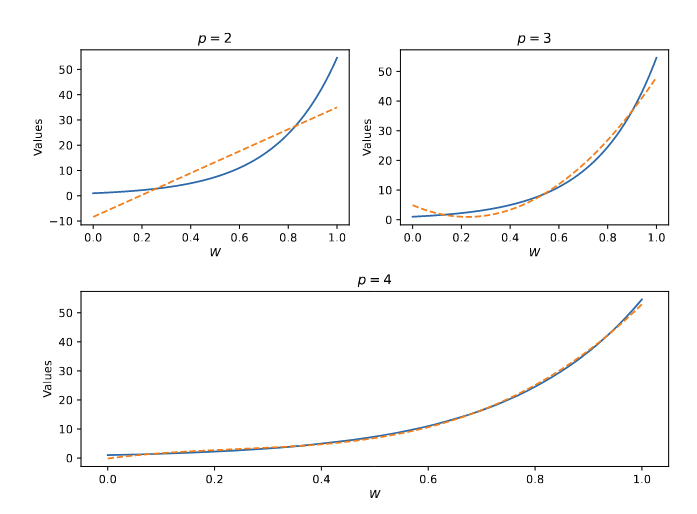

## Statistical Properties of Linear Regression 
In finite samples $(X_i, Y_i)_{i=1}^n$ are i.i.d. random variables, the Ordinary Least Squares (OLS) estimator of $\hat{\beta}$ is given by:
$$
\min_{b\in\mathbb{R}^p} \frac{1}{n}\sum_{i=1}^n (Y_i - b'X_i)^2 
$$
* The first-order condition is $\frac{1}{n}\sum_{i=1}^n (Y_i - b'X_i)X_i = 0$
* Define $\hat{\epsilon}_i:=Y_i-\hat{\beta}'X_i$, then we have 
  $$
  \frac{1}{n}\sum_{i=1}^n \hat{\epsilon}_i X_i = 0
  $$
* The key question is whether $\hat{\beta}$ estimates $\beta$ well.

### Approximation of BLP by OLS 
Intuitively, to estimate each parameter $\beta_j$ we need to have enough variation in $X_j$ (many observations per parameter) to identify the parameter, i.e., $n/p$ should be large enough 

> **Theorem**: (Approximation of BLP by OLS) Under regularity conditions, 
> $$
> \sqrt{E_x(\beta ' X-\hat{\beta}'X)^2} = \sqrt{(\hat{\beta}-\beta)'E_x(X X')(\hat{\beta}-\beta)} \\
> \leq const_p \sqrt{E(\epsilon^2)} \sqrt{\frac{p}{n}} $$
> The inequality holds with probability 1 as $n\to\infty$.

* When $p/n$ is small, the sample BLP approximates the population/true BLP well. 

### Analysis of Variance 
* The ratio of explained variation to the total variation is the **poluation $R^2$**:
$$
R_{pop}^2 = \frac{E[(\hat{\beta}'X)^2]}{E[Y^2]} = 1 -\frac{ E[\epsilon^2]}{E[Y^2]} \in [0,1]
$$
* The sample $R^2$ is defined as:
$$
R_{sample}^2 = 1 - \frac{E_n[\hat{\epsilon}^2]}{E_n[Y^2]} = 1 - \frac{E_n[\hat{\epsilon}^2]}{E_n[Y^2]} \in [0,1]
$$
 > When $p/n$ is small, $R_{sample}^2$ approximates $R_{pop}^2$ well.

### Overfitting Problem
* When $p/n$ is not small, the in-sample BLP becomes misleading 
* Consider $p=n$ and all $X_i$ are independent, we have 
  $$
  MSE_{sample}= 0 \text{ and }R^2_{sample} = 1
  $$
  no matter what $MSE_{pop}$ and $R^2_{pop}$ are. 
* With $p<n$, **adjusted $R^2$** and *adjusted MSE* are: 
  $$
  MSE_{adj} = \frac{n}{n-p} E_n[\hat{\epsilon}^2] \text{ and } R^2_{adj} = 1 - \frac{n}{n-p} \frac{E_n[\hat{\epsilon}^2]}{E_n[Y^2]}
  $$
  > $\frac{n}{n-p}$ corrects for overfitting. The intuition is that the in-sample fit increases as the number of parameters increase and potentially causes overfitting. 

In [33]:
import numpy as np
import statsmodels.api as sm
import warnings
warnings.simplefilter('ignore')

In [56]:
def regression_stats(n, p):
    np.random.seed(123)
    X = np.random.normal(size=(n, p))
    y = np.random.normal(size=(n, 1))
    R2 = sm.OLS(y, X).fit().rsquared
    R2_adj = sm.OLS(y, X).fit().rsquared_adj
    return R2, R2_adj

In [60]:
n = 1000
i = 0  
R2vec = np.zeros(7)
R2_adjvec = np.zeros(7)
# Loop over different values of p
for p in [50, 100, 200, 500, 800, 900, 1000]:
    R2, R2_adj = regression_stats(n, p)
    R2vec[i] = R2
    R2_adjvec[i] = R2_adj
    i = i + 1

Text(0.5, 1.0, 'R2 and R2_adj vs Number of Predictors')

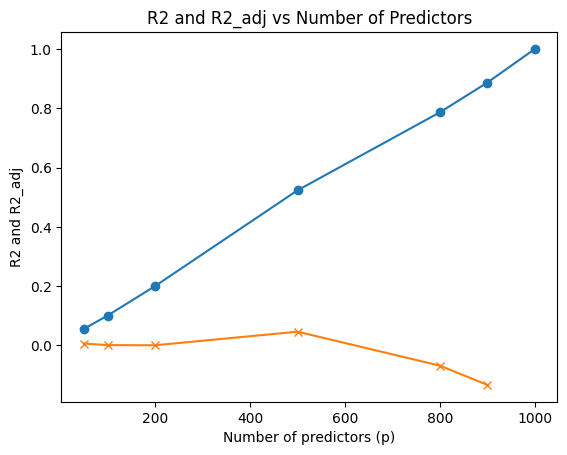

In [67]:
# plot the results
import matplotlib.pyplot as plt
plt.plot([50, 100, 200, 500, 800, 900, 1000], R2vec, "-o",label='R2')
plt.plot([50, 100, 200, 500, 800, 900, 1000], R2_adjvec,"-x", label='R2_adj')
plt.xlabel('Number of predictors (p)')
plt.ylabel('R2 and R2_adj')
plt.title('R2 and R2_adj vs Number of Predictors')

### Sample Splitting 
*Data splitting* is a common practice to measure predictive performance. The idea is as follows:
>    1. Use a **training sample** to estimate the model'
>    2. Use a **test sample** to evaluate the quality of the prediction rule, using $MSE$ and $R^2$

Formally, we define the **data splitting procedure** as:
> 1. *Randomly* partition the data into **training** and **testing** samples: $n$ observations for training and $m$ observations for testing.
> 2. Use the **training sample** to compute a prediction rule $\hat{f}(X)$. e.g., $\hat{f}(X) = \hat{\beta}'X$.
> 3. Use the **testing sample** to compute the prediction error:$MSE_{test}$ and $R^2_{test}$. 

* **Cross-validation** is a more data-efficient evaluation procedure. 
* **Stratified splitting** guarantees that the training and testing samples are similar. 

### Inference 
Let $X = (D, W')'$, where $D$ is the regressor of interest and $W$ other regressors/controls/covariates, we write the model as 
\begin{equation*}
Y = \underbrace{\beta_1 D + \beta_2 W}_{\text{predicted value}}+ \underbrace{\epsilon}_{\text{error}}
\end{equation*}
> The **Frisch-Waugh-Loveall Theorem**: 
> $$
> \beta_1 = argmin_{b1}E[(\tilde{Y}-b_1 \tilde{D})^2] =(E[\tilde{D}^2])^{-1}E[\tilde{D}\tilde{Y}]
> $$
> where $\tilde{Y}$ and $\tilde{D}$ are the residuals of $Y$ and $D$ after regressing on $W$.



> **Inference**: Under regularity conditions and if $p/n \approx 0$: 
> $$
> \sqrt{n}(\hat{\beta_1}-\beta_1) \xrightarrow{d} N(0, (E[\tilde{D}^2])^{-1}E[\tilde{D}^2\tilde{\epsilon}^2]E[\tilde{D}^2])^{-1})
> $$

* Then the 95% confidence interval can be constructed as:
$$
\left [\hat{\beta_1} - 1.96 \sqrt{\hat{V}/n} , \hat{\beta_1} + 1.96 \sqrt{\hat{V}/n}\right]
$$

## Application: Wage Prediction
In labor economics an important question is what determines the wage of workers. This is a causal question, but we could begin to investigate from a predictive perspective.

In the following wage example,  𝑌  is the `(log) hourly wage of a worker` and  𝑋  is a vector of `worker's characteristics`, e.g., education, experience, sex. Two main questions here are:

* How to use job-relevant characteristics, such as education and experience, to best predict wages?

* What is the difference in predicted wages between male and female workers with the same job-relevant characteristics?

In this lab, we focus on the prediction question first.

## Data

The data set we consider is from the March Supplement of the U.S. Current Population Survey, year 2015. 
* We select white non-hispanic individuals, aged 25 to 64 years, and working more than 35 hours per week during at least 50 weeks of the year. 
* We exclude self-employed workers; individuals living in group quarters; individuals in the military, agricultural or private household sectors; individuals with inconsistent reports on earnings and employment status; individuals with allocated or missing information in any of the variables used in the analysis; and individuals with hourly wage below  3 .

* The variable of interest  𝑌  is the (log) hourly wage rate constructed as the `ratio of the annual earnings to the total number of hours worked`, which is constructed in turn as the product of number of weeks worked and the usual number of hours worked per week. 
* Focus on single (never married) workers. The final sample is of size  $n=5150$ .

In [35]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import sklearn.linear_model as lm
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import warnings
# ignore potential convergence warnings; for some small penalty levels,
# tried out, optimization might not converge
warnings.simplefilter('ignore')

## Data Analysis

In [36]:
file = "https://raw.githubusercontent.com/CausalAIBook/MetricsMLNotebooks/main/data/wage2015_subsample_inference.csv"
df = pd.read_csv(file)
df.describe()

,wage,lwage,sex,shs,hsg,scl,clg,ad,mw,so,we,ne,exp1,exp2,exp3,exp4,occ,occ2,ind,ind2
count,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000
mean,23.410410,2.970787,0.444466,0.023301,0.243883,0.278058,0.317670,0.137087,0.259612,0.296505,0.216117,0.227767,13.760583,3.018925,8.235867,25.118038,5310.737476,11.670874,6629.154951,13.316893
std,21.003016,0.570385,0.496955,0.150872,0.429465,0.448086,0.465616,0.343973,0.438464,0.456761,0.411635,0.419432,10.609465,4.000904,14.488962,53.530225,11874.356080,6.966684,5333.443992,5.701019
min,3.021978,1.105912,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,1.000000,370.000000,2.000000
25%,13.461538,2.599837,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.250000,0.125000,0.062500,1740.000000,5.000000,4880.000000,9.000000
50%,19.230769,2.956512,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,1.000000,1.000000,1.000000,4040.000000,13.000000,7370.000000,14.000000
75%,27.777778,3.324236,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,21.000000,4.410000,9.261000,19.448100,5610.000000,17.000000,8190.000000,18.000000
max,528.845673,6.270697,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,47.000000,22.090000,103.823000,487.968100,100000.000000,22.000000,100000.000000,22.000000


### Variable Construction and Regression

We are constructing the output variable  $Y$  and the matrix  $Z$  which includes the characteristics of workers

In [37]:
Y = np.log(df['wage'])
Z = df.drop(['wage', 'lwage'], axis=1)
Z.shape

(5150, 18)

For the outcome variable (log) wage and a subset of the raw regressors, we calculate the empirical mean and other empirical measures to get familiar with the data.



In [38]:
Z.describe()

,sex,shs,hsg,scl,clg,ad,mw,so,we,ne,exp1,exp2,exp3,exp4,occ,occ2,ind,ind2
count,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000
mean,0.444466,0.023301,0.243883,0.278058,0.317670,0.137087,0.259612,0.296505,0.216117,0.227767,13.760583,3.018925,8.235867,25.118038,5310.737476,11.670874,6629.154951,13.316893
std,0.496955,0.150872,0.429465,0.448086,0.465616,0.343973,0.438464,0.456761,0.411635,0.419432,10.609465,4.000904,14.488962,53.530225,11874.356080,6.966684,5333.443992,5.701019
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,1.000000,370.000000,2.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.250000,0.125000,0.062500,1740.000000,5.000000,4880.000000,9.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,1.000000,1.000000,1.000000,4040.000000,13.000000,7370.000000,14.000000
75%,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,21.000000,4.410000,9.261000,19.448100,5610.000000,17.000000,8190.000000,18.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,47.000000,22.090000,103.823000,487.968100,100000.000000,22.000000,100000.000000,22.000000


E.g., the share of female workers in our sample is ~44% ( 𝑠𝑒𝑥=1  if female).

In [39]:
# if you want to print this table to latex
# print(Z.describe().style.to_latex())

## Prediction Question
Now, we will construct a prediction rule for hourly (log) wage  $Y$, which depends linearly on job-relevant characteristics  $X$:
$$
Y = \beta'X + \epsilon
$$
where  $X$  is a vector of characteristics of the worker, including `Female`,  `Some High School`, `High School Graduate`, `Some College`, `College Graduate`, `Advanced Degree`,  `Experience`.

Our goals are:

* Predict wages using various characteristics of workers.

* Assess the predictive performance of a given model using the (adjusted) sample MSE, the (adjusted) sample $R^2$ and the out-of-sample MSE and $R^2$.

### Measuring Prediction Quality
Toward answering the latter, we measure the prediction quality of the two models via **data splitting**:

- Randomly split the data into one training sample and one testing sample. Here we just use a simple method (stratified splitting is a more sophisticated version of splitting that we might consider).
- Use the training sample to estimate the parameters of the Basic Model and the Flexible Model.
- Before using the testing sample, we evaluate in-sample fit.


In [40]:
# split the data into train and test sets
# 80% train, 20% test   
# set random_state to ensure reproducibility
train, test = train_test_split(df, test_size=0.20, random_state=123)


We employ two different specifications for prediction:


1. **Basic Model**:   $X$ consists of a set of raw regressors (e.g. gender, experience, education indicators,  occupation and industry indicators and regional indicators).


2. **Flexible Model**:  $X$ consists of all raw regressors from the basic model plus a *dictionary of transformations** (e.g., ${exp}^2$ and ${exp}^3$) and additional two-way interactions of a polynomial in experience with other regressors. An example of a regressor created through a two-way interaction is *experience* times the indicator of having a *college degree*.

* Using the **Flexible Model** enables us to approximate the real relationship by a more complex regression model and therefore to reduce the bias. 
  
* The **Flexible Model** increases the range of potential shapes of the estimated regression function. In general, flexible models often deliver higher prediction accuracy but are harder to interpret.

## Data-Splitting: In-sample performance

Let us fit both models to our data by running ordinary least squares (ols):

In [41]:
# 1. Basic Model
model_base = 'lwage ~ sex + exp1 + shs + hsg+ scl + clg + mw + so + we + C(occ2) + C(ind2)'
base = smf.ols(model_base, data=train)
results_base = base.fit()

In [42]:
# R-squared and MSE for the basic model
rsquared_base = results_base.rsquared
rsquared_adj_base = results_base.rsquared_adj
mse_base = np.mean(results_base.resid**2)
mse_adj_base = results_base.mse_resid
print(f'Rsquared={rsquared_base:.4f}')
print(f'Rsquared_adjusted={rsquared_adj_base:.4f}')
print(f'MSE={mse_base:.4f}')
print(f'MSE_adjusted={mse_adj_base:.4f}')

Rsquared=0.3176
Rsquared_adjusted=0.3092
MSE=0.2202
MSE_adjusted=0.2229


In [43]:
# verify the formulas
X, y = base.data.exog, base.data.endog
n, p = X.shape
mse = np.mean((y - results_base.predict(X, transform=False))**2)
mse_adj = mse * n / (n - p)
rsquared = 1 - mse / np.var(y)
rsquared_adj = 1 - mse_adj / np.var(y)
print(f'Rsquared={rsquared:.4f}')
print(f'Rsquared_adjusted={rsquared_adj:.4f}')
print(f'MSE={mse:.4f}')
print(f'MSE_adjusted={mse_adj:.4f}')

Rsquared=0.3176
Rsquared_adjusted=0.3091
MSE=0.2202
MSE_adjusted=0.2229


In [44]:
# 2. Flexible Model
model_flex = ('lwage ~ sex + shs+hsg+scl+clg+C(occ2)+C(ind2)+mw+so+we '
              '+ (exp1+exp2+exp3+exp4)*(shs+hsg+scl+clg+C(occ2)+C(ind2)+mw+so+we)')
flex = smf.ols(model_flex, data=train)
results_flex = flex.fit()

In [45]:
rsquared_flex = results_flex.rsquared
rsquared_adj_flex = results_flex.rsquared_adj
mse_flex = np.mean(results_flex.resid**2)
mse_adj_flex = results_flex.mse_resid
print(f'Rsquared={rsquared_flex:.4f}')
print(f'Rsquared_adjusted={rsquared_adj_flex:.4f}')
print(f'MSE={mse_flex:.4f}')
print(f'MSE_adjusted={mse_adj_flex:.4f}')

Rsquared=0.3643
Rsquared_adjusted=0.3241
MSE=0.2051
MSE_adjusted=0.2181


In [46]:
# make a table of results for two models
results = pd.DataFrame({
    'Model': ['Baseline', 'Flexible'],
    'R2': [rsquared_base, rsquared_flex],
    'R2_adj': [rsquared_adj_base, rsquared_adj_flex],
    'MSE': [mse_base, mse_flex],
    'MSE_adj': [mse_adj_base, mse_adj_flex]
})
results = results.set_index('Model')
# print the table to html
print(results)

                R2    R2_adj       MSE   MSE_adj
Model                                           
Baseline  0.317622  0.309237  0.220187  0.222947
Flexible  0.364346  0.324146  0.205110  0.218135


### Inference
#### Impact of Gender on Wages 
**Question**: What is the difference in predicted wages between male and female workers with the same job-relevant characteristics?
we consider the following log-linear regression model

\begin{align*} \log(Y) &= \beta'X + \epsilon\\ &= \beta_1 D + \beta_2' W + \epsilon, \end{align*}
* $D$ is the indicator of being female ($1$ if female and $0$ otherwise) and the $W$'s are controls explaining variation in wages. 
* Considering transformed wages by the logarithm, we are analyzing the relative difference in the payment of male and female workers.


In [47]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
import sys
from sklearn.base import BaseEstimator
import warnings
# ignore potential convergence warnings; for some small
# penalty levels, tried out, optimization might not converge
warnings.simplefilter('ignore')

In [48]:
#descriptive statistics for wage gaps of sex
table = pd.DataFrame()
cols = ["lwage", "sex", "shs", "hsg", "scl",
        "clg", "ad", "ne", "mw", "so", "we", "exp1"]
table['Variable'] = ["Log Wage", "Sex", "Less then High School",
                     "High School Graduate", "Some College",
                     "Gollage Graduate", "Advanced Degree",
                     "Northeast", "Midwest", "South", "West", "Experience"]
table['All'] = df[cols].mean().values
table['Male'] = df[df['sex'] == 0][cols].mean().values
table['Female'] = df[df['sex'] == 1][cols].mean().values
# Show results
table

,Variable,All,Male,Female
0,Log Wage,2.970787,2.987830,2.949485
1,Sex,0.444466,0.000000,1.000000
2,Less then High School,0.023301,0.031807,0.012669
3,High School Graduate,0.243883,0.294303,0.180865
4,Some College,0.278058,0.273331,0.283967
5,Gollage Graduate,0.317670,0.293953,0.347313
6,Advanced Degree,0.137087,0.106606,0.175186
7,Northeast,0.227767,0.221950,0.235037
8,Midwest,0.259612,0.259000,0.260376
9,South,0.296505,0.298148,0.294452


In [49]:
# compute the wage difference 
table.loc[0, 'Female'] - table.loc[0, 'Male']

-0.03834473367441449

#### Unconditional Effect of Sex 
The unconditional wage gap is about  $3.8\%$ for the group of never married workers (female workers get paid less on average in our sample). 

This unconditional (predictive) effect of sex equals the coefficient  $\beta$  in the univariate ols regression of  $Y$  on  $D$ :

$$
log(Y)=\beta D+\epsilon.
$$

We verify this by running an ols regression.

In [50]:
# regression without controls with robust standard errors
nocontrol_fit = smf.ols("lwage ~ sex", data=df).fit()
nocontrol_est = nocontrol_fit.params['sex']
nocontrol_se = nocontrol_fit.HC3_se['sex']

print(f"The estimated sex coefficient is: {nocontrol_est:.4f} ")
print(f"and the corresponding robust standard error is: {nocontrol_se:.4f}")

The estimated sex coefficient is: -0.0383 
and the corresponding robust standard error is: 0.0159


#### Regression with Covariates 
We run an ols regression of  $Y$  on  $(D,W)$  to control for the effect of covariates summarized in  $W$ :

$$
log(Y)=\beta_1 D + \beta_2' W + \epsilon.
$$

Here $W$ controls for `experience`, `education`, `region`, and `occupation` and `industry indicators` plus transformations and two-way interactions.

In [51]:
# Ols regression with controls
flex = "lwage ~ sex + (exp1+exp2+exp3+exp4)*(shs+hsg+scl+clg+C(occ2)+C(ind2)+mw+so+we)"
# Note that ()*() operation in formula objects in statsmodels
# creates a formula of the sort:
#  (exp1+exp2+exp3+exp4)+ (shs+hsg+scl+clg+occ2+ind2+mw+so+we)
#  + (exp1+exp2+exp3+exp4)*(shs+hsg+scl+clg+occ2+ind2+mw+so+we)
control_fit = smf.ols(flex, data=df).fit()
control_est = control_fit.params['sex']
control_se = control_fit.HC3_se['sex']
control_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  lwage   R-squared:                       0.351
Model:                            OLS   Adj. R-squared:                  0.319
Method:                 Least Squares   F-statistic:                     10.83
Date:                Tue, 22 Apr 2025   Prob (F-statistic):          2.69e-305
Time:                        07:20:36   Log-Likelihood:                -3301.9
No. Observations:                5150   AIC:                             7096.
Df Residuals:                    4904   BIC:                             8706.
Df Model:                         245                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              3.8603      0.429      9.006      0.000       3.020       4.701
C(occ2)[T.2]           0.1613      0.130      1.244      0.214      -0.093       0.416
C(occ2)[T.3]           0.2102      0.169      1.246      0.213      -0.121       0.541
C(occ2)[T.4]           0.0709      0.184      0.386      0.700      -0.289       0.431
C(occ2)[T.5]          -0.3960      0.189     -2.100      0.036      -0.766      -0.026
C(occ2)[T.6]          -0.2311      0.187     -1.236      0.217      -0.598       0.135
C(occ2)[T.7]           0.3147      0.194      1.621      0.105      -0.066       0.695
C(occ2)[T.8]          -0.1875      0.169     -1.108      0.268      -0.519       0.144
C(occ2)[T.9]          -0.3390      0.167     -2.027      0.043      -0.667      -0.011
C(occ2)[T.10]          0.0210      0.156      0.134      0.893      -0.286       0.328
C(occ2)[T.11]         -0.6424      0.309     -2.078      0.038      -1.248      -0.036
C(occ2)[T.12]         -0.0675      0.252     -0.268      0.789      -0.562       0.427
C(occ2)[T.13]         -0.2330      0.232     -1.006      0.314      -0.687       0.221
C(occ2)[T.14]          0.2562      0.323      0.794      0.427      -0.376       0.889
C(occ2)[T.15]         -0.1939      0.260     -0.747      0.455      -0.703       0.315
C(occ2)[T.16]         -0.0551      0.147     -0.375      0.708      -0.343       0.233
C(occ2)[T.17]         -0.4156      0.136     -3.053      0.002      -0.682      -0.149
C(occ2)[T.18]         -0.4822      1.044     -0.462      0.644      -2.530       1.565
C(occ2)[T.19]         -0.2579      0.333     -0.776      0.438      -0.910       0.394
C(occ2)[T.20]         -0.3010      0.234     -1.286      0.199      -0.760       0.158
C(occ2)[T.21]         -0.4272      0.221     -1.936      0.053      -0.860       0.005
C(occ2)[T.22]         -0.8695      0.298     -2.922      0.003      -1.453      -0.286
C(ind2)[T.3]          -1.2474      0.645     -1.932      0.053      -2.513       0.018
C(ind2)[T.4]          -0.0948      0.464     -0.205      0.838      -1.004       0.814
C(ind2)[T.5]          -0.5294      0.435     -1.218      0.223      -1.381       0.323
C(ind2)[T.6]          -0.6222      0.435     -1.431      0.152      -1.474       0.230
C(ind2)[T.7]          -0.5047      0.502     -1.005      0.315      -1.490       0.480
C(ind2)[T.8]          -0.7295      0.467     -1.561      0.119      -1.646       0.187
C(ind2)[T.9]          -0.8025      0.425     -1.887      0.059      -1.636       0.031
C(ind2)[T.10]         -0.5806      0.481     -1.207      0.227      -1.523       0.362
C(ind2)[T.11]         -0.9852      0.448     -2.198      0.028      -1.864      -0.107
C(ind2)[T.12]         -0.7376      0.424     -1.738      0.082      -1.569       0.094
C(ind2)[T.13]         -1.0183      0.4

In [52]:
print(f"The estimated sex coefficient: {control_est:.4f} ")
print(f"The corresponding robust standard error: {control_se:.4f}")

The estimated sex coefficient: -0.0696 
The corresponding robust standard error: 0.0157


* The estimated regression coefficient  $\beta_1≈-0.06955$  measures how our linear prediction of wage changes if we set the sex variable  $D$  from 0 to 1, holding the controls  $W$  fixed. 

* We can call this the predictive effect (PE), as it measures the impact of a variable on the prediction we make. 
  
* The unconditional wage gap of size  4 \% for female workers increases to about  7 \% after controlling for worker characteristics.

We now show how the conditional gap and the remainder decompose the marginal wage gap into the parts explained and unexplained by the additional controls.

In [53]:
flex_without_sex = "lwage ~ (exp1+exp2+exp3+exp4)*(shs+hsg+scl+clg+C(occ2)+C(ind2)+mw+so+we)"
lm0 = smf.ols(flex_without_sex, data=df[df["sex"] == 0])
lm1 = smf.ols(flex_without_sex, data=df[df["sex"] == 1])
XX0 = lm0.exog #explantory variables beta_hat*X
y0 = lm0.endog #y_hat 
XX1 = lm1.exog
y1 = lm1.endog
# the coefficients excluding intercept and "sex"
betarest = control_fit.params[control_fit.params.index != "sex"][1:]
print("The marginal gap:", y1.mean() - y0.mean())
diff_unexplained = control_est
print("The unexplained difference: ", diff_unexplained)
diff_explained = betarest.dot(XX1.mean(0)[1:] - XX0.mean(0)[1:])
print("The explained difference:", diff_explained)
print("The sum of these differences:", diff_unexplained + diff_explained)

The marginal gap: -0.03834473367441449
The unexplained difference:  -0.06955320329684066
The explained difference: 0.031208469622388935
The sum of these differences: -0.03834473367445172


To understand the estimate, we can take average for the male and female groups:
\begin{align*}
\underbrace{E_n[Y|D=1] - E_n[Y|D=0]}_{-0.038} &= \\
\underbrace{\hat{\beta}_1}_{-0.070} + &\underbrace{\hat{\beta}'_2(E_n(W|D=1)-E_n(W|D=0))}_{0.031}
\end{align*}

* $E_n(\cdot)$ is the sample average 

### Oaxaca-Blinder Decomposition 
We can augment the original model by adding interaction of sex and other characteristics:
$$
Y = \beta_1 D + \beta_2' W + \beta_3'W\cdot D + \epsilon 
$$
This provides an alternative decomposition:

\begin{align*}
\underbrace{E_n[Y|D=1] - E_n[Y|D=0]}_{-0.038} &= \\
\underbrace{\hat{\beta}_1}_{-2.320} + \underbrace{\hat{\beta}'_2(E_n(W|D=1)-E_n(W|D=0))}_{0.002} & +\underbrace{\hat{\beta}_3' E_n[W|D=1]}_{2.280}
\end{align*}

* Attributed to difference in $W$: `0.002`
* Attributed to different predictive effect of $W$: `2.280`
* Unexplained difference: `-2.320` 

In [54]:
# The oaxaca decomposition
u1, s1, v1 = np.linalg.svd(XX1)
u0, s0, v0 = np.linalg.svd(XX0)
s1[s1 <= 1e-10] = 0
s1[s1 > 1e-10] = 1 / s1[s1 > 1e-10]
beta1 = (s1 * s1 * v1.T).dot(v1).dot(XX1.T).dot(y1)
s0[s0 <= 1e-10] = 0
s0[s0 > 1e-10] = 1 / s0[s0 > 1e-10]
beta0 = (s0 * s0 * v0.T).dot(v0).dot(XX0.T).dot(y0)
print("The marginal gap: ", y1.mean() - y0.mean())
diff_unexplained = beta1[0] - beta0[0]
print("The unexplained difference: ", diff_unexplained)
diff_endow = beta0.dot(XX1.mean(0) - XX0.mean(0))
print("The difference explained by covariates: ", diff_endow)
diff_coeff = (beta1[1:] - beta0[1:]).dot(XX1.mean(0)[1:])
print("The difference explained by interaction: ", diff_coeff)
print("The sum of these differences: ", diff_unexplained + diff_endow + diff_coeff)

The marginal gap:  -0.03834473367441449
The unexplained difference:  -2.3202078245207662
The difference explained by covariates:  0.0015954716257246097
The difference explained by interaction:  2.2802675893099984
The sum of these differences:  -0.03834476358504313


### Partialling-Out using Frisch-Waugh-Lovell Theorem 

We can partial-out the linear effect of the controls via OLS through the following procedures:
1. Regress $Y$ on the controls $W$ to get $\tilde{Y}$;
   
2. Regress $X$ on the controls $W$ to get $\tilde{X}$;

3. Regress $\tilde{Y}$ on $\tilde{X}$

In [68]:
# Partialling-Out using ols
# models
flex_y = "lwage ~  (exp1+exp2+exp3+exp4)*(shs+hsg+scl+clg+C(occ2)+C(ind2)+mw+so+we)"  # model for Y
flex_d = "sex ~ (exp1+exp2+exp3+exp4)*(shs+hsg+scl+clg+C(occ2)+C(ind2)+mw+so+we)"  # model for D
# partialling-out the linear effect of W from Y
t_Y = smf.ols(flex_y, data=df).fit().resid
# partialling-out the linear effect of W from D
t_D = smf.ols(flex_d, data=df).fit().resid
# regression of Y on D after partialling-out the effect of W
partial_fit = sm.OLS(t_Y, t_D).fit()
partial_est = partial_fit.params['x1']
print("Coefficient for D via partialling-out " + str(partial_est))
# standard error
partial_se = partial_fit.HC3_se['x1']
# confidence interval
print("95% CI: " + str(partial_fit.conf_int().values[0]))

Coefficient for D via partialling-out -0.06955320329684576
95% CI: [-0.09866859 -0.04043781]


In [69]:
print(f"The estimated sex coefficient is {partial_est:.4f} "
      f"and the corresponding robust standard error is {partial_se:.4f}")

The estimated sex coefficient is -0.0696 and the corresponding robust standard error is 0.0150


* The estimated coefficient measures the linear predictive effect (PE) of  $D$  on  $Y$  after taking out the linear effect of  $W$  on both of these variables.
  
* The partialling-out approach works well when the dimension of $W$ is low in relation to the sample size  $n$ . When the dimension of  $W$  is relatively high, we need to use variable selection or penalization for regularization purposes.

### OLS Overfitting Problem

We try an "extra" flexible model, where we take interactions of all controls, giving us about 1000 controls. To illustrate how OLS can overfit, we subset to the first 1000 observations so that $p \approx n$.

In [72]:
subset, test = train_test_split(df, train_size=1000, random_state=2724)
# model
extraflex = "lwage ~ sex + (exp1+exp2+exp3+exp4+shs+hsg+scl+clg+C(occ2)+C(ind2)+mw+so+we)**2"
control_fit_extra = smf.ols(extraflex, data=subset).fit()
control_extra_est = control_fit_extra.params['sex']
R2 = control_fit_extra.rsquared
R2_adj = control_fit_extra.rsquared_adj
n = subset.shape[0]
p = control_fit_extra.params.shape[0]
# Jackknife. Python regularizes in the background. Theory shouldn't really work here.
# Cattaneo, Jannson, and Newey (2018) (CJN) do verify that jackknife is valid,
# in the sense of being upward biased, in high-dimensional settings under
# regularity.
control_extra_se = control_fit_extra.HC3_se["sex"]
# HC0 will not work here. CJN show it is inconsistent even
# in moderate dimensional settings.
control_extra_se_HC0 = control_fit_extra.HC0_se["sex"]
# We should probably implement Cattaneo, Jannson, and Newey (2018)'s procedure -
# though it's not clear their regularity conditions would apply here anyway.
print("Number of Extra-Flex Controls: " + str(p - 1))
print("Coefficient of sex with extra flex controls: " + str(control_extra_est))
print("R-squared: " + str(R2))
print("R-squared adjusted: " + str(R2_adj))

Number of Extra-Flex Controls: 979
Coefficient of sex with extra flex controls: -0.0735508763751175
R-squared: 0.7607517491390923
R-squared adjusted: 0.3791973958180602


### Re-estimating the flexible model using Lasso
We re-estimate the flexible model using **Lasso** (the least absolute shrinkage and selection operator) rather than ols.
*  Lasso is a penalized regression method that can be used to reduce the complexity of a regression model when the ratio $p/n$ is not small.  


* We use the `statsmodels` package with the formula `api` for uniformity in feature construction and the `sklearn Lasso` with cross-validation to tune the regularization hyperparameter.

In [55]:
# Lasso with cross-validation
X = flex.data.exog[:, 1:]  # exclude the intercept; we don't want the lasso to penalize the intercept
y = flex.data.endog

# train model using Lasso with cross validation and variable normalization
lasso = Pipeline([('scale', StandardScaler()),  # standardize the variables
                  ('lasso', lm.LassoCV())])
lasso.fit(X, y)

AttributeError: 'str' object has no attribute 'data'

In [ ]:
# verify the formulas
n, p = X.shape
p += 1
mse_lasso = np.mean((y - lasso.predict(X))**2)
mse_adj_lasso = mse_lasso * n / (n - p)
rsquared_lasso = 1 - mse_lasso / np.var(y)
rsquared_adj_lasso = 1 - mse_adj_lasso / np.var(y)
print(f'Rsquared={rsquared_lasso:.4f}')
print(f'Rsquared_adjusted={rsquared_adj_lasso:.4f}')
print(f'MSE={mse_lasso:.4f}')
print(f'MSE_adjusted={mse_adj_lasso:.4f}')

In [ ]:
# store the results in a table
res_df = pd.DataFrame()

res_df['Model'] = ['Basic reg', 'Flexible reg', 'Flexible Lasso']

res_df['p'] = [results_base.params.shape[0],
               results_flex.params.shape[0],
               results_flex.params.shape[0]]

res_df['R2'] = [rsquared_base, rsquared_flex, rsquared_lasso]
res_df['MSE'] = [mse_base, mse_flex, mse_lasso]

res_df['adj_R2'] = [rsquared_adj_base, rsquared_adj_flex, rsquared_adj_lasso]
res_df['adj_MSE'] = [mse_adj_base, mse_adj_flex, mse_adj_lasso]

# Show results
res_df.head()

In [ ]:
# print to Latex
print(res_df.style.to_latex())

Considering the measures above, the flexible model performs slightly better than the basic model.

As $p/n$ is not large, the discrepancy between the adjusted and unadjusted measures is not large. However, if it were, we might still like to apply **data splitting** as a more general procedure to deal with potential overfitting if $p/n$. We illustrate the approach in the following.

## Data Splitting: Out-of-sample performance

Now that we have seen in-sample fit, we evaluate our models on the out-of-sample performance:
- Use the testing sample for evaluation. Predict the $\mathtt{wage}$  of every observation in the testing sample based on the estimated parameters in the training sample.
- Calculate the Mean Squared Prediction Error $MSE_{test}$ based on the testing sample for both prediction models.


In [ ]:
# We will use smf.ols just to get the full data frame and sm.OLS to
# test out of sample for convenience
# This is because predict is a bit tricky with smf.ols out of sample.
tmp = smf.ols(model_base, data=df)  # just to extract df, not actually using this model
X_full = tmp.data.exog
y_full = tmp.data.endog
X_train, X_test, y_train, y_test = train_test_split(X_full, y_full, test_size=.2, shuffle=True)

In [ ]:
# estimating the parameters in the training sample
regbasic = sm.OLS(y_train, X_train).fit()

# predict out of sample
yhat_reg_base = regbasic.predict(X_test)

# calculating out-of-sample MSE
MSE_test1 = sum((y_test - yhat_reg_base)**2) / y_test.shape[0]
R2_test1 = 1. - MSE_test1 / np.var(y_test)

print("Test MSE for the basic model: " + str(MSE_test1))
print("Test R2 for the basic model: " + str(R2_test1))

In the basic model, the  $𝑀𝑆𝐸_{𝑡𝑒𝑠𝑡}$  is quite closed to the  $𝑀𝑆𝐸_{𝑠𝑎𝑚𝑝𝑙𝑒}$.

In [ ]:
# We will use smf.ols just to get the full data frame and sm.OLS to test out of sample for convenience
# This is because predict is a bit tricky with smf.ols out of sample.
tmp = smf.ols(model_flex, data=df)  # just to extract df, not actually using this model
X_full = tmp.data.exog
y_full = tmp.data.endog
X_train, X_test, y_train, y_test = train_test_split(X_full, y_full, test_size=.2, shuffle=True)

# estimating the parameters in the training sample
regflex = sm.OLS(y_train, X_train).fit()

# predict out of sample
yhat_reg_flex = regflex.predict(X_test)

# calculating out-of-sample MSE
MSE_test2 = np.mean((y_test - yhat_reg_flex)**2)
R2_test2 = 1. - MSE_test2 / np.var(y_test)

print("Test MSE for the flexible model: " + str(MSE_test2))
print("Test R2 for the flexible model: " + str(R2_test2))

In the flexible model, the discrepancy between the  $𝑀𝑆𝐸_{𝑡𝑒𝑠𝑡}$  and the  $𝑀𝑆𝐸_{𝑠𝑎𝑚𝑝𝑙𝑒}$  is not large.

It is worth to notice that the  $𝑀𝑆𝐸_{𝑡𝑒𝑠𝑡}$  vary across different data splits. Hence, it is a good idea average the out-of-sample MSE over different data splits to get valid results.

Nevertheless, we observe that, based on the out-of-sample  $𝑀𝑆𝐸$ , the basic model using ols regression performs is about as well (or slightly better) than the flexible model.

Next, let us use lasso regression in the flexible model instead of ols regression. Note that the out-of-sample  𝑀𝑆𝐸  on the test sample can be computed for any other black-box prediction method as well. Thus, let us finally compare the performance of lasso regression in the flexible model to ols regression.

In [ ]:
# train model using Lasso with cross validation and variable normalization
lasso = Pipeline([('scale', StandardScaler()),  # standardize the variables
                  ('lasso', lm.LassoCV())])
lasso.fit(X_train[:, 1:], y_train)

# predict out of sample
yhat_test_lasso = lasso.predict(X_test[:, 1:])

# calculating out-of-sample MSE
MSE_test3 = np.mean((y_test - yhat_test_lasso)**2)
R2_test3 = 1. - MSE_test3 / np.var(y_test)

print("Test MSE for the basic model: " + str(MSE_test3))
print("Test R2 for the basic model: " + str(R2_test3))

In [ ]:
# store the results in a table
res_df2 = pd.DataFrame()

res_df2['Model'] = ['Basic reg', 'Flexible reg', 'Flexible Lasso']

res_df2['$MSE_{test}$'] = [MSE_test1, MSE_test2, MSE_test3]
res_df2['$R^2_{test}$'] = [R2_test1, R2_test2, R2_test3]

# Show results
res_df2.head()

In [ ]:
# print to Latex
print(res_df2.style.to_latex())

## Extra flexible model and Overfitting
Given the results above, it is not immediately clear why one would choose to use Lasso as results are fairly similar. To motivate, we consider an extra flexible model to show how OLS can overfit significantly to the in-sample train data and perform poorly on the out-of-sample testing data.



In [ ]:
# Extra Flexible Model
model_extra = ('lwage ~ sex + (exp1+exp2+exp3+exp4+shs+hsg+scl+clg+C(occ2)+C(ind2)+mw+so+we)**2')
tmp = smf.ols(model_extra, data=df)  # just to extract df, not actually using this model

# In-sample fit
insamplefit = tmp.fit()
rsquared_ex = insamplefit.rsquared
rsquared_adj_ex = insamplefit.rsquared_adj
mse_ex = np.mean(insamplefit.resid**2)
mse_adj_ex = insamplefit.mse_resid
print(f'(In-sample) Rsquared={rsquared_ex :.4f}')
print(f'(In-sample) Rsquared_adjusted={rsquared_adj_ex :.4f}')
print(f'(In-sample) MSE={mse_ex :.4f}')
print(f'(In-sample) MSE_adjusted={mse_adj_ex:.4f}')

# Train test Split
X_full = tmp.data.exog
y_full = tmp.data.endog
X_train, X_test, y_train, y_test = train_test_split(X_full, y_full, test_size=.2, shuffle=True)

# estimating the parameters in the training sample
regextra = sm.OLS(y_train, X_train).fit()

# predict out of sample
yhat_reg_extra = regextra.predict(X_test)

# calculating out-of-sample MSE
MSE_test4 = np.mean((y_test - yhat_reg_extra)**2)
R2_test4 = 1. - MSE_test4 / np.var(y_test)

print("Test MSE for the flexible model: " + str(MSE_test4))
print("Test R2 for the flexible model: " + str(R2_test4))

As we can see, a simple OLS overfits when the dimensionality of covariates is high, as the out-of-sample performance suffers dramatically in comparison to the in-sample performance.

Contrast this with Lasso:

In [ ]:
np.sum(lasso.named_steps['lasso'].coef_ != 0)

In [ ]:
# train model using Lasso with cross validation and variable normalization
lasso = Pipeline([('scale', StandardScaler()),  # standardize the variables
                  ('lasso', lm.LassoCV())])
lasso.fit(X_train[:, 1:], y_train)

# predict in sample
yhat_train_lasso = lasso.predict(X_train[:, 1:])

# Calculate R-squared
R2_L = 1 - np.sum((yhat_train_lasso - y_train)**2) / np.sum((y_train - np.mean(y_train))**2)

# Calculate adjusted R-squared
pL = np.sum(lasso.named_steps['lasso'].coef_ != 0)
ntrain = len(X_train)
baseline = np.sum((y_train - np.mean(y_train))**2) / (ntrain - 1)
R2_adjL = 1 - (np.sum((yhat_train_lasso - y_train)**2) / (ntrain - pL - 1)) / baseline

# Calculate Mean Squared Error (MSE)
lasso_res = y_train - yhat_train_lasso
MSEL = np.mean(lasso_res**2)

# Calculate adjusted MSE
MSE_adjL = (ntrain / (ntrain - pL - 1)) * MSEL

# Print the results
print("R-squared for the lasso with the extra flexible model (in-sample):", R2_L)
print("Adjusted R-squared for the extra flexible model (in-sample):", R2_adjL)
print("MSE for the lasso with the extra flexible model (in-sample):", MSEL)
print("Adjusted MSE for the lasso with the extra flexible model (in-sample):", MSE_adjL)

# predict out of sample
yhat_test_lasso = lasso.predict(X_test[:, 1:])

# calculating out-of-sample MSE
MSE_test5 = np.mean((y_test - yhat_test_lasso)**2)
R2_test5 = 1. - MSE_test5 / np.var(y_test)

print("Test MSE for the basic model: " + str(MSE_test5))
print("Test R2 for the basic model: " + str(R2_test5))

As shown above, the overfitting effect is mitigated with the penalized regression model.

## Introduction to Machine Learning: Applications in Economics 

Zhiyuan Chen

*Empirical Methods*

**Remin Business School**

**2025 Spring** 

## Roadmap 
- **Regression and the Best Linear Prediction Problem**
  - **Properties of Linear Regression** 
  - **Problem of Overfitting**
  - *Application: Wage Prediction*
- 

## Foundations of Linear Regression 
### Best Linear Predictor
The **Linear Regrssion** is to find the best linear predictor of the interested dependent variable $Y$ given the independent variables $X=(X_1, X_2,\cdots,X_p)$ by minimizing the *Mean Squared Error (MSE)*:
$$
\min_{b\in\mathbb{R}^p} E [(Y - b'X)^2],
$$
* The first-order conditions imply that: $E[(Y - \beta'X)X] = 0$
* Define the error as $\epsilon = Y - \beta'X$, then we have $E(\epsilon X) = 0$
* The Best Linear Predictor (BLP) provides a simple decomposition of the dependent variable $Y$:
$$
Y = \beta'X + \epsilon,
$$

### Best Linear Approximation Property 

By the law of iterated expectations:
$$
E[(Y - \beta'X)X] = 0 \Rightarrow E[(E[Y|X]-\beta ' X)X] =0 
$$

* The BLP of $Y$ is also the BLP for the conditional expectation given $X$, $E[Y|X]$
* This motivates the use of various transformations of regressors to form $X$ 

### From BLP to Best Predictor
Let $W$ be "raw" regressors/features, *constructed regressors* are of the form:
$$
X = T(W)=(T_1(W), T_2(W), \cdots, T_p(W))'
$$
* $T(W)$ is called *dictionary* of transformations 
* E.g., polynomials, interactions terms, logarithms, etc.

The **Best Predictor** of $Y$ solves the following best prediction problem:
$$
\min_{m(W)}E[(Y - m(W))^2].
$$

* The linear predictor provides the best linear approximation to the best predictor:
 \begin{equation*}
E[(Y-b'T(W))^2] = \underbrace{E[(g(W) - b'T(W))^2]}_{\text{mean squared prediction error}} + E[(Y-g(W))^2]
\end{equation*}
> Minimizing the MSE of the linear predictor is equivalent to minimizing the mean squared approximation error!

### Example: Approximating a Smooth Function with a Polynomial Dictionary 
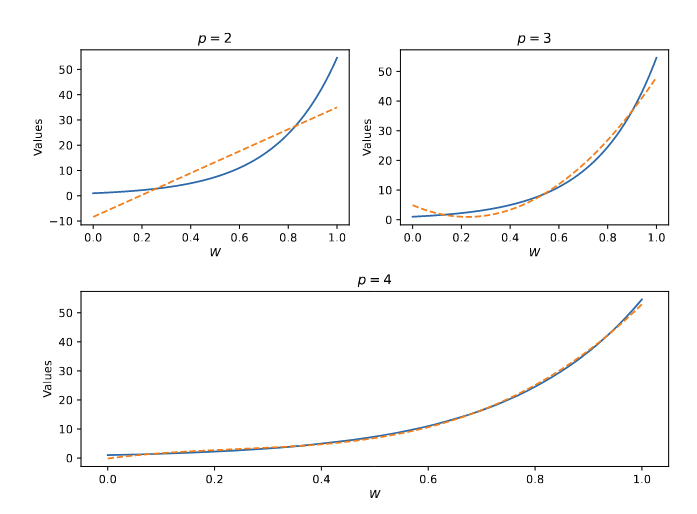

## Statistical Properties of Linear Regression 
In finite samples $(X_i, Y_i)_{i=1}^n$ are i.i.d. random variables, the Ordinary Least Squares (OLS) estimator of $\hat{\beta}$ is given by:
$$
\min_{b\in\mathbb{R}^p} \frac{1}{n}\sum_{i=1}^n (Y_i - b'X_i)^2 
$$
* The first-order condition is $\frac{1}{n}\sum_{i=1}^n (Y_i - b'X_i)X_i = 0$
* Define $\hat{\epsilon}_i:=Y_i-\hat{\beta}'X_i$, then we have 
  $$
  \frac{1}{n}\sum_{i=1}^n \hat{\epsilon}_i X_i = 0
  $$
* The key question is whether $\hat{\beta}$ estimates $\beta$ well.

### Approximation of BLP by OLS 
Intuitively, to estimate each parameter $\beta_j$ we need to have enough variation in $X_j$ (many observations per parameter) to identify the parameter, i.e., $n/p$ should be large enough 

> **Theorem**: (Approximation of BLP by OLS) Under regularity conditions, 
> $$
> \sqrt{E_x(\beta ' X-\hat{\beta}'X)^2} = \sqrt{(\hat{\beta}-\beta)'E_x(X X')(\hat{\beta}-\beta)} \\
> \leq const_p \sqrt{E(\epsilon^2)} \sqrt{\frac{p}{n}} $$
> The inequality holds with probability 1 as $n\to\infty$.

* When $p/n$ is small, the sample BLP approximates the population/true BLP well. 

### Analysis of Variance 
* The ratio of explained variation to the total variation is the **poluation $R^2$**:
$$
R_{pop}^2 = \frac{E[(\hat{\beta}'X)^2]}{E[Y^2]} = 1 -\frac{ E[\epsilon^2]}{E[Y^2]} \in [0,1]
$$
* The sample $R^2$ is defined as:
$$
R_{sample}^2 = 1 - \frac{E_n[\hat{\epsilon}^2]}{E_n[Y^2]} = 1 - \frac{E_n[\hat{\epsilon}^2]}{E_n[Y^2]} \in [0,1]
$$
 > When $p/n$ is small, $R_{sample}^2$ approximates $R_{pop}^2$ well.

### Overfitting Problem
* When $p/n$ is not small, the in-sample BLP becomes misleading 
* Consider $p=n$ and all $X_i$ are independent, we have 
  $$
  MSE_{sample}= 0 \text{ and }R^2_{sample} = 1
  $$
  no matter what $MSE_{pop}$ and $R^2_{pop}$ are. 
* With $p<n$, **adjusted $R^2$** and *adjusted MSE* are: 
  $$
  MSE_{adj} = \frac{n}{n-p} E_n[\hat{\epsilon}^2] \text{ and } R^2_{adj} = 1 - \frac{n}{n-p} \frac{E_n[\hat{\epsilon}^2]}{E_n[Y^2]}
  $$
  > $\frac{n}{n-p}$ corrects for overfitting. The intuition is that the in-sample fit increases as the number of parameters increase and potentially causes overfitting. 

In [33]:
import numpy as np
import statsmodels.api as sm
import warnings
warnings.simplefilter('ignore')

In [56]:
def regression_stats(n, p):
    np.random.seed(123)
    X = np.random.normal(size=(n, p))
    y = np.random.normal(size=(n, 1))
    R2 = sm.OLS(y, X).fit().rsquared
    R2_adj = sm.OLS(y, X).fit().rsquared_adj
    return R2, R2_adj

In [60]:
n = 1000
i = 0  
R2vec = np.zeros(7)
R2_adjvec = np.zeros(7)
# Loop over different values of p
for p in [50, 100, 200, 500, 800, 900, 1000]:
    R2, R2_adj = regression_stats(n, p)
    R2vec[i] = R2
    R2_adjvec[i] = R2_adj
    i = i + 1

Text(0.5, 1.0, 'R2 and R2_adj vs Number of Predictors')

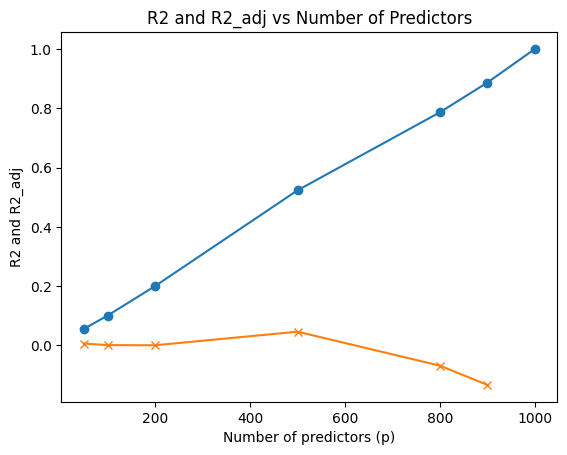

In [67]:
# plot the results
import matplotlib.pyplot as plt
plt.plot([50, 100, 200, 500, 800, 900, 1000], R2vec, "-o",label='R2')
plt.plot([50, 100, 200, 500, 800, 900, 1000], R2_adjvec,"-x", label='R2_adj')
plt.xlabel('Number of predictors (p)')
plt.ylabel('R2 and R2_adj')
plt.title('R2 and R2_adj vs Number of Predictors')

### Sample Splitting 
*Data splitting* is a common practice to measure predictive performance. The idea is as follows:
>    1. Use a **training sample** to estimate the model'
>    2. Use a **test sample** to evaluate the quality of the prediction rule, using $MSE$ and $R^2$

Formally, we define the **data splitting procedure** as:
> 1. *Randomly* partition the data into **training** and **testing** samples: $n$ observations for training and $m$ observations for testing.
> 2. Use the **training sample** to compute a prediction rule $\hat{f}(X)$. e.g., $\hat{f}(X) = \hat{\beta}'X$.
> 3. Use the **testing sample** to compute the prediction error:$MSE_{test}$ and $R^2_{test}$. 

* **Cross-validation** is a more data-efficient evaluation procedure. 
* **Stratified splitting** guarantees that the training and testing samples are similar. 

### Inference 
Let $X = (D, W')'$, where $D$ is the regressor of interest and $W$ other regressors/controls/covariates, we write the model as 
\begin{equation*}
Y = \underbrace{\beta_1 D + \beta_2 W}_{\text{predicted value}}+ \underbrace{\epsilon}_{\text{error}}
\end{equation*}
> The **Frisch-Waugh-Loveall Theorem**: 
> $$
> \beta_1 = argmin_{b1}E[(\tilde{Y}-b_1 \tilde{D})^2] =(E[\tilde{D}^2])^{-1}E[\tilde{D}\tilde{Y}]
> $$
> where $\tilde{Y}$ and $\tilde{D}$ are the residuals of $Y$ and $D$ after regressing on $W$.



> **Inference**: Under regularity conditions and if $p/n \approx 0$: 
> $$
> \sqrt{n}(\hat{\beta_1}-\beta_1) \xrightarrow{d} N(0, (E[\tilde{D}^2])^{-1}E[\tilde{D}^2\tilde{\epsilon}^2]E[\tilde{D}^2])^{-1})
> $$

* Then the 95% confidence interval can be constructed as:
$$
\left [\hat{\beta_1} - 1.96 \sqrt{\hat{V}/n} , \hat{\beta_1} + 1.96 \sqrt{\hat{V}/n}\right]
$$

## Application: Wage Prediction
In labor economics an important question is what determines the wage of workers. This is a causal question, but we could begin to investigate from a predictive perspective.

In the following wage example,  𝑌  is the `(log) hourly wage of a worker` and  𝑋  is a vector of `worker's characteristics`, e.g., education, experience, sex. Two main questions here are:

* How to use job-relevant characteristics, such as education and experience, to best predict wages?

* What is the difference in predicted wages between male and female workers with the same job-relevant characteristics?

In this lab, we focus on the prediction question first.

## Data

The data set we consider is from the March Supplement of the U.S. Current Population Survey, year 2015. 
* We select white non-hispanic individuals, aged 25 to 64 years, and working more than 35 hours per week during at least 50 weeks of the year. 
* We exclude self-employed workers; individuals living in group quarters; individuals in the military, agricultural or private household sectors; individuals with inconsistent reports on earnings and employment status; individuals with allocated or missing information in any of the variables used in the analysis; and individuals with hourly wage below  3 .

* The variable of interest  𝑌  is the (log) hourly wage rate constructed as the `ratio of the annual earnings to the total number of hours worked`, which is constructed in turn as the product of number of weeks worked and the usual number of hours worked per week. 
* Focus on single (never married) workers. The final sample is of size  $n=5150$ .

In [35]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import sklearn.linear_model as lm
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import warnings
# ignore potential convergence warnings; for some small penalty levels,
# tried out, optimization might not converge
warnings.simplefilter('ignore')

## Data Analysis

In [36]:
file = "https://raw.githubusercontent.com/CausalAIBook/MetricsMLNotebooks/main/data/wage2015_subsample_inference.csv"
df = pd.read_csv(file)
df.describe()

,wage,lwage,sex,shs,hsg,scl,clg,ad,mw,so,we,ne,exp1,exp2,exp3,exp4,occ,occ2,ind,ind2
count,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000
mean,23.410410,2.970787,0.444466,0.023301,0.243883,0.278058,0.317670,0.137087,0.259612,0.296505,0.216117,0.227767,13.760583,3.018925,8.235867,25.118038,5310.737476,11.670874,6629.154951,13.316893
std,21.003016,0.570385,0.496955,0.150872,0.429465,0.448086,0.465616,0.343973,0.438464,0.456761,0.411635,0.419432,10.609465,4.000904,14.488962,53.530225,11874.356080,6.966684,5333.443992,5.701019
min,3.021978,1.105912,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,1.000000,370.000000,2.000000
25%,13.461538,2.599837,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.250000,0.125000,0.062500,1740.000000,5.000000,4880.000000,9.000000
50%,19.230769,2.956512,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,1.000000,1.000000,1.000000,4040.000000,13.000000,7370.000000,14.000000
75%,27.777778,3.324236,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,21.000000,4.410000,9.261000,19.448100,5610.000000,17.000000,8190.000000,18.000000
max,528.845673,6.270697,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,47.000000,22.090000,103.823000,487.968100,100000.000000,22.000000,100000.000000,22.000000


### Variable Construction and Regression

We are constructing the output variable  $Y$  and the matrix  $Z$  which includes the characteristics of workers

In [37]:
Y = np.log(df['wage'])
Z = df.drop(['wage', 'lwage'], axis=1)
Z.shape

(5150, 18)

For the outcome variable (log) wage and a subset of the raw regressors, we calculate the empirical mean and other empirical measures to get familiar with the data.



In [38]:
Z.describe()

,sex,shs,hsg,scl,clg,ad,mw,so,we,ne,exp1,exp2,exp3,exp4,occ,occ2,ind,ind2
count,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000
mean,0.444466,0.023301,0.243883,0.278058,0.317670,0.137087,0.259612,0.296505,0.216117,0.227767,13.760583,3.018925,8.235867,25.118038,5310.737476,11.670874,6629.154951,13.316893
std,0.496955,0.150872,0.429465,0.448086,0.465616,0.343973,0.438464,0.456761,0.411635,0.419432,10.609465,4.000904,14.488962,53.530225,11874.356080,6.966684,5333.443992,5.701019
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,1.000000,370.000000,2.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.250000,0.125000,0.062500,1740.000000,5.000000,4880.000000,9.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,1.000000,1.000000,1.000000,4040.000000,13.000000,7370.000000,14.000000
75%,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,21.000000,4.410000,9.261000,19.448100,5610.000000,17.000000,8190.000000,18.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,47.000000,22.090000,103.823000,487.968100,100000.000000,22.000000,100000.000000,22.000000


E.g., the share of female workers in our sample is ~44% ( 𝑠𝑒𝑥=1  if female).

In [39]:
# if you want to print this table to latex
# print(Z.describe().style.to_latex())

## Prediction Question
Now, we will construct a prediction rule for hourly (log) wage  $Y$, which depends linearly on job-relevant characteristics  $X$:
$$
Y = \beta'X + \epsilon
$$
where  $X$  is a vector of characteristics of the worker, including `Female`,  `Some High School`, `High School Graduate`, `Some College`, `College Graduate`, `Advanced Degree`,  `Experience`.

Our goals are:

* Predict wages using various characteristics of workers.

* Assess the predictive performance of a given model using the (adjusted) sample MSE, the (adjusted) sample $R^2$ and the out-of-sample MSE and $R^2$.

### Measuring Prediction Quality
Toward answering the latter, we measure the prediction quality of the two models via **data splitting**:

- Randomly split the data into one training sample and one testing sample. Here we just use a simple method (stratified splitting is a more sophisticated version of splitting that we might consider).
- Use the training sample to estimate the parameters of the Basic Model and the Flexible Model.
- Before using the testing sample, we evaluate in-sample fit.


In [40]:
# split the data into train and test sets
# 80% train, 20% test   
# set random_state to ensure reproducibility
train, test = train_test_split(df, test_size=0.20, random_state=123)


We employ two different specifications for prediction:


1. **Basic Model**:   $X$ consists of a set of raw regressors (e.g. gender, experience, education indicators,  occupation and industry indicators and regional indicators).


2. **Flexible Model**:  $X$ consists of all raw regressors from the basic model plus a *dictionary of transformations** (e.g., ${exp}^2$ and ${exp}^3$) and additional two-way interactions of a polynomial in experience with other regressors. An example of a regressor created through a two-way interaction is *experience* times the indicator of having a *college degree*.

* Using the **Flexible Model** enables us to approximate the real relationship by a more complex regression model and therefore to reduce the bias. 
  
* The **Flexible Model** increases the range of potential shapes of the estimated regression function. In general, flexible models often deliver higher prediction accuracy but are harder to interpret.

## Data-Splitting: In-sample performance

Let us fit both models to our data by running ordinary least squares (ols):

In [41]:
# 1. Basic Model
model_base = 'lwage ~ sex + exp1 + shs + hsg+ scl + clg + mw + so + we + C(occ2) + C(ind2)'
base = smf.ols(model_base, data=train)
results_base = base.fit()

In [42]:
# R-squared and MSE for the basic model
rsquared_base = results_base.rsquared
rsquared_adj_base = results_base.rsquared_adj
mse_base = np.mean(results_base.resid**2)
mse_adj_base = results_base.mse_resid
print(f'Rsquared={rsquared_base:.4f}')
print(f'Rsquared_adjusted={rsquared_adj_base:.4f}')
print(f'MSE={mse_base:.4f}')
print(f'MSE_adjusted={mse_adj_base:.4f}')

Rsquared=0.3176
Rsquared_adjusted=0.3092
MSE=0.2202
MSE_adjusted=0.2229


In [43]:
# verify the formulas
X, y = base.data.exog, base.data.endog
n, p = X.shape
mse = np.mean((y - results_base.predict(X, transform=False))**2)
mse_adj = mse * n / (n - p)
rsquared = 1 - mse / np.var(y)
rsquared_adj = 1 - mse_adj / np.var(y)
print(f'Rsquared={rsquared:.4f}')
print(f'Rsquared_adjusted={rsquared_adj:.4f}')
print(f'MSE={mse:.4f}')
print(f'MSE_adjusted={mse_adj:.4f}')

Rsquared=0.3176
Rsquared_adjusted=0.3091
MSE=0.2202
MSE_adjusted=0.2229


In [44]:
# 2. Flexible Model
model_flex = ('lwage ~ sex + shs+hsg+scl+clg+C(occ2)+C(ind2)+mw+so+we '
              '+ (exp1+exp2+exp3+exp4)*(shs+hsg+scl+clg+C(occ2)+C(ind2)+mw+so+we)')
flex = smf.ols(model_flex, data=train)
results_flex = flex.fit()

In [45]:
rsquared_flex = results_flex.rsquared
rsquared_adj_flex = results_flex.rsquared_adj
mse_flex = np.mean(results_flex.resid**2)
mse_adj_flex = results_flex.mse_resid
print(f'Rsquared={rsquared_flex:.4f}')
print(f'Rsquared_adjusted={rsquared_adj_flex:.4f}')
print(f'MSE={mse_flex:.4f}')
print(f'MSE_adjusted={mse_adj_flex:.4f}')

Rsquared=0.3643
Rsquared_adjusted=0.3241
MSE=0.2051
MSE_adjusted=0.2181


In [46]:
# make a table of results for two models
results = pd.DataFrame({
    'Model': ['Baseline', 'Flexible'],
    'R2': [rsquared_base, rsquared_flex],
    'R2_adj': [rsquared_adj_base, rsquared_adj_flex],
    'MSE': [mse_base, mse_flex],
    'MSE_adj': [mse_adj_base, mse_adj_flex]
})
results = results.set_index('Model')
# print the table to html
print(results)

                R2    R2_adj       MSE   MSE_adj
Model                                           
Baseline  0.317622  0.309237  0.220187  0.222947
Flexible  0.364346  0.324146  0.205110  0.218135


### Inference
#### Impact of Gender on Wages 
**Question**: What is the difference in predicted wages between male and female workers with the same job-relevant characteristics?
we consider the following log-linear regression model

\begin{align*} \log(Y) &= \beta'X + \epsilon\\ &= \beta_1 D + \beta_2' W + \epsilon, \end{align*}
* $D$ is the indicator of being female ($1$ if female and $0$ otherwise) and the $W$'s are controls explaining variation in wages. 
* Considering transformed wages by the logarithm, we are analyzing the relative difference in the payment of male and female workers.


In [47]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
import sys
from sklearn.base import BaseEstimator
import warnings
# ignore potential convergence warnings; for some small
# penalty levels, tried out, optimization might not converge
warnings.simplefilter('ignore')

In [48]:
#descriptive statistics for wage gaps of sex
table = pd.DataFrame()
cols = ["lwage", "sex", "shs", "hsg", "scl",
        "clg", "ad", "ne", "mw", "so", "we", "exp1"]
table['Variable'] = ["Log Wage", "Sex", "Less then High School",
                     "High School Graduate", "Some College",
                     "Gollage Graduate", "Advanced Degree",
                     "Northeast", "Midwest", "South", "West", "Experience"]
table['All'] = df[cols].mean().values
table['Male'] = df[df['sex'] == 0][cols].mean().values
table['Female'] = df[df['sex'] == 1][cols].mean().values
# Show results
table

,Variable,All,Male,Female
0,Log Wage,2.970787,2.987830,2.949485
1,Sex,0.444466,0.000000,1.000000
2,Less then High School,0.023301,0.031807,0.012669
3,High School Graduate,0.243883,0.294303,0.180865
4,Some College,0.278058,0.273331,0.283967
5,Gollage Graduate,0.317670,0.293953,0.347313
6,Advanced Degree,0.137087,0.106606,0.175186
7,Northeast,0.227767,0.221950,0.235037
8,Midwest,0.259612,0.259000,0.260376
9,South,0.296505,0.298148,0.294452


In [49]:
# compute the wage difference 
table.loc[0, 'Female'] - table.loc[0, 'Male']

-0.03834473367441449

#### Unconditional Effect of Sex 
The unconditional wage gap is about  $3.8\%$ for the group of never married workers (female workers get paid less on average in our sample). 

This unconditional (predictive) effect of sex equals the coefficient  $\beta$  in the univariate ols regression of  $Y$  on  $D$ :

$$
log(Y)=\beta D+\epsilon.
$$

We verify this by running an ols regression.

In [50]:
# regression without controls with robust standard errors
nocontrol_fit = smf.ols("lwage ~ sex", data=df).fit()
nocontrol_est = nocontrol_fit.params['sex']
nocontrol_se = nocontrol_fit.HC3_se['sex']

print(f"The estimated sex coefficient is: {nocontrol_est:.4f} ")
print(f"and the corresponding robust standard error is: {nocontrol_se:.4f}")

The estimated sex coefficient is: -0.0383 
and the corresponding robust standard error is: 0.0159


#### Regression with Covariates 
We run an ols regression of  $Y$  on  $(D,W)$  to control for the effect of covariates summarized in  $W$ :

$$
log(Y)=\beta_1 D + \beta_2' W + \epsilon.
$$

Here $W$ controls for `experience`, `education`, `region`, and `occupation` and `industry indicators` plus transformations and two-way interactions.

In [51]:
# Ols regression with controls
flex = "lwage ~ sex + (exp1+exp2+exp3+exp4)*(shs+hsg+scl+clg+C(occ2)+C(ind2)+mw+so+we)"
# Note that ()*() operation in formula objects in statsmodels
# creates a formula of the sort:
#  (exp1+exp2+exp3+exp4)+ (shs+hsg+scl+clg+occ2+ind2+mw+so+we)
#  + (exp1+exp2+exp3+exp4)*(shs+hsg+scl+clg+occ2+ind2+mw+so+we)
control_fit = smf.ols(flex, data=df).fit()
control_est = control_fit.params['sex']
control_se = control_fit.HC3_se['sex']
control_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  lwage   R-squared:                       0.351
Model:                            OLS   Adj. R-squared:                  0.319
Method:                 Least Squares   F-statistic:                     10.83
Date:                Tue, 22 Apr 2025   Prob (F-statistic):          2.69e-305
Time:                        07:20:36   Log-Likelihood:                -3301.9
No. Observations:                5150   AIC:                             7096.
Df Residuals:                    4904   BIC:                             8706.
Df Model:                         245                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              3.8603      0.429      9.006      0.000       3.020       4.701
C(occ2)[T.2]           0.1613      0.130      1.244      0.214      -0.093       0.416
C(occ2)[T.3]           0.2102      0.169      1.246      0.213      -0.121       0.541
C(occ2)[T.4]           0.0709      0.184      0.386      0.700      -0.289       0.431
C(occ2)[T.5]          -0.3960      0.189     -2.100      0.036      -0.766      -0.026
C(occ2)[T.6]          -0.2311      0.187     -1.236      0.217      -0.598       0.135
C(occ2)[T.7]           0.3147      0.194      1.621      0.105      -0.066       0.695
C(occ2)[T.8]          -0.1875      0.169     -1.108      0.268      -0.519       0.144
C(occ2)[T.9]          -0.3390      0.167     -2.027      0.043      -0.667      -0.011
C(occ2)[T.10]          0.0210      0.156      0.134      0.893      -0.286       0.328
C(occ2)[T.11]         -0.6424      0.309     -2.078      0.038      -1.248      -0.036
C(occ2)[T.12]         -0.0675      0.252     -0.268      0.789      -0.562       0.427
C(occ2)[T.13]         -0.2330      0.232     -1.006      0.314      -0.687       0.221
C(occ2)[T.14]          0.2562      0.323      0.794      0.427      -0.376       0.889
C(occ2)[T.15]         -0.1939      0.260     -0.747      0.455      -0.703       0.315
C(occ2)[T.16]         -0.0551      0.147     -0.375      0.708      -0.343       0.233
C(occ2)[T.17]         -0.4156      0.136     -3.053      0.002      -0.682      -0.149
C(occ2)[T.18]         -0.4822      1.044     -0.462      0.644      -2.530       1.565
C(occ2)[T.19]         -0.2579      0.333     -0.776      0.438      -0.910       0.394
C(occ2)[T.20]         -0.3010      0.234     -1.286      0.199      -0.760       0.158
C(occ2)[T.21]         -0.4272      0.221     -1.936      0.053      -0.860       0.005
C(occ2)[T.22]         -0.8695      0.298     -2.922      0.003      -1.453      -0.286
C(ind2)[T.3]          -1.2474      0.645     -1.932      0.053      -2.513       0.018
C(ind2)[T.4]          -0.0948      0.464     -0.205      0.838      -1.004       0.814
C(ind2)[T.5]          -0.5294      0.435     -1.218      0.223      -1.381       0.323
C(ind2)[T.6]          -0.6222      0.435     -1.431      0.152      -1.474       0.230
C(ind2)[T.7]          -0.5047      0.502     -1.005      0.315      -1.490       0.480
C(ind2)[T.8]          -0.7295      0.467     -1.561      0.119      -1.646       0.187
C(ind2)[T.9]          -0.8025      0.425     -1.887      0.059      -1.636       0.031
C(ind2)[T.10]         -0.5806      0.481     -1.207      0.227      -1.523       0.362
C(ind2)[T.11]         -0.9852      0.448     -2.198      0.028      -1.864      -0.107
C(ind2)[T.12]         -0.7376      0.424     -1.738      0.082      -1.569       0.094
C(ind2)[T.13]         -1.0183      0.4

In [52]:
print(f"The estimated sex coefficient: {control_est:.4f} ")
print(f"The corresponding robust standard error: {control_se:.4f}")

The estimated sex coefficient: -0.0696 
The corresponding robust standard error: 0.0157


* The estimated regression coefficient  $\beta_1≈-0.06955$  measures how our linear prediction of wage changes if we set the sex variable  $D$  from 0 to 1, holding the controls  $W$  fixed. 

* We can call this the predictive effect (PE), as it measures the impact of a variable on the prediction we make. 
  
* The unconditional wage gap of size  4 \% for female workers increases to about  7 \% after controlling for worker characteristics.

We now show how the conditional gap and the remainder decompose the marginal wage gap into the parts explained and unexplained by the additional controls.

In [53]:
flex_without_sex = "lwage ~ (exp1+exp2+exp3+exp4)*(shs+hsg+scl+clg+C(occ2)+C(ind2)+mw+so+we)"
lm0 = smf.ols(flex_without_sex, data=df[df["sex"] == 0])
lm1 = smf.ols(flex_without_sex, data=df[df["sex"] == 1])
XX0 = lm0.exog #explantory variables beta_hat*X
y0 = lm0.endog #y_hat 
XX1 = lm1.exog
y1 = lm1.endog
# the coefficients excluding intercept and "sex"
betarest = control_fit.params[control_fit.params.index != "sex"][1:]
print("The marginal gap:", y1.mean() - y0.mean())
diff_unexplained = control_est
print("The unexplained difference: ", diff_unexplained)
diff_explained = betarest.dot(XX1.mean(0)[1:] - XX0.mean(0)[1:])
print("The explained difference:", diff_explained)
print("The sum of these differences:", diff_unexplained + diff_explained)

The marginal gap: -0.03834473367441449
The unexplained difference:  -0.06955320329684066
The explained difference: 0.031208469622388935
The sum of these differences: -0.03834473367445172


To understand the estimate, we can take average for the male and female groups:
\begin{align*}
\underbrace{E_n[Y|D=1] - E_n[Y|D=0]}_{-0.038} &= \\
\underbrace{\hat{\beta}_1}_{-0.070} + &\underbrace{\hat{\beta}'_2(E_n(W|D=1)-E_n(W|D=0))}_{0.031}
\end{align*}

* $E_n(\cdot)$ is the sample average 

### Oaxaca-Blinder Decomposition 
We can augment the original model by adding interaction of sex and other characteristics:
$$
Y = \beta_1 D + \beta_2' W + \beta_3'W\cdot D + \epsilon 
$$
This provides an alternative decomposition:

\begin{align*}
\underbrace{E_n[Y|D=1] - E_n[Y|D=0]}_{-0.038} &= \\
\underbrace{\hat{\beta}_1}_{-2.320} + \underbrace{\hat{\beta}'_2(E_n(W|D=1)-E_n(W|D=0))}_{0.002} & +\underbrace{\hat{\beta}_3' E_n[W|D=1]}_{2.280}
\end{align*}

* Attributed to difference in $W$: `0.002`
* Attributed to different predictive effect of $W$: `2.280`
* Unexplained difference: `-2.320` 

In [54]:
# The oaxaca decomposition
u1, s1, v1 = np.linalg.svd(XX1)
u0, s0, v0 = np.linalg.svd(XX0)
s1[s1 <= 1e-10] = 0
s1[s1 > 1e-10] = 1 / s1[s1 > 1e-10]
beta1 = (s1 * s1 * v1.T).dot(v1).dot(XX1.T).dot(y1)
s0[s0 <= 1e-10] = 0
s0[s0 > 1e-10] = 1 / s0[s0 > 1e-10]
beta0 = (s0 * s0 * v0.T).dot(v0).dot(XX0.T).dot(y0)
print("The marginal gap: ", y1.mean() - y0.mean())
diff_unexplained = beta1[0] - beta0[0]
print("The unexplained difference: ", diff_unexplained)
diff_endow = beta0.dot(XX1.mean(0) - XX0.mean(0))
print("The difference explained by covariates: ", diff_endow)
diff_coeff = (beta1[1:] - beta0[1:]).dot(XX1.mean(0)[1:])
print("The difference explained by interaction: ", diff_coeff)
print("The sum of these differences: ", diff_unexplained + diff_endow + diff_coeff)

The marginal gap:  -0.03834473367441449
The unexplained difference:  -2.3202078245207662
The difference explained by covariates:  0.0015954716257246097
The difference explained by interaction:  2.2802675893099984
The sum of these differences:  -0.03834476358504313


### Partialling-Out using Frisch-Waugh-Lovell Theorem 

We can partial-out the linear effect of the controls via OLS through the following procedures:
1. Regress $Y$ on the controls $W$ to get $\tilde{Y}$;
   
2. Regress $X$ on the controls $W$ to get $\tilde{X}$;

3. Regress $\tilde{Y}$ on $\tilde{X}$

In [68]:
# Partialling-Out using ols
# models
flex_y = "lwage ~  (exp1+exp2+exp3+exp4)*(shs+hsg+scl+clg+C(occ2)+C(ind2)+mw+so+we)"  # model for Y
flex_d = "sex ~ (exp1+exp2+exp3+exp4)*(shs+hsg+scl+clg+C(occ2)+C(ind2)+mw+so+we)"  # model for D
# partialling-out the linear effect of W from Y
t_Y = smf.ols(flex_y, data=df).fit().resid
# partialling-out the linear effect of W from D
t_D = smf.ols(flex_d, data=df).fit().resid
# regression of Y on D after partialling-out the effect of W
partial_fit = sm.OLS(t_Y, t_D).fit()
partial_est = partial_fit.params['x1']
print("Coefficient for D via partialling-out " + str(partial_est))
# standard error
partial_se = partial_fit.HC3_se['x1']
# confidence interval
print("95% CI: " + str(partial_fit.conf_int().values[0]))

Coefficient for D via partialling-out -0.06955320329684576
95% CI: [-0.09866859 -0.04043781]


In [69]:
print(f"The estimated sex coefficient is {partial_est:.4f} "
      f"and the corresponding robust standard error is {partial_se:.4f}")

The estimated sex coefficient is -0.0696 and the corresponding robust standard error is 0.0150


* The estimated coefficient measures the linear predictive effect (PE) of  $D$  on  $Y$  after taking out the linear effect of  $W$  on both of these variables.
  
* The partialling-out approach works well when the dimension of $W$ is low in relation to the sample size  $n$ . When the dimension of  $W$  is relatively high, we need to use variable selection or penalization for regularization purposes.

### OLS Overfitting Problem

We try an "extra" flexible model, where we take interactions of all controls, giving us about 1000 controls. To illustrate how OLS can overfit, we subset to the first 1000 observations so that $p \approx n$.

In [72]:
subset, test = train_test_split(df, train_size=1000, random_state=2724)
# model
extraflex = "lwage ~ sex + (exp1+exp2+exp3+exp4+shs+hsg+scl+clg+C(occ2)+C(ind2)+mw+so+we)**2"
control_fit_extra = smf.ols(extraflex, data=subset).fit()
control_extra_est = control_fit_extra.params['sex']
R2 = control_fit_extra.rsquared
R2_adj = control_fit_extra.rsquared_adj
n = subset.shape[0]
p = control_fit_extra.params.shape[0]
# Jackknife. Python regularizes in the background. Theory shouldn't really work here.
# Cattaneo, Jannson, and Newey (2018) (CJN) do verify that jackknife is valid,
# in the sense of being upward biased, in high-dimensional settings under
# regularity.
control_extra_se = control_fit_extra.HC3_se["sex"]
# HC0 will not work here. CJN show it is inconsistent even
# in moderate dimensional settings.
control_extra_se_HC0 = control_fit_extra.HC0_se["sex"]
# We should probably implement Cattaneo, Jannson, and Newey (2018)'s procedure -
# though it's not clear their regularity conditions would apply here anyway.
print("Number of Extra-Flex Controls: " + str(p - 1))
print("Coefficient of sex with extra flex controls: " + str(control_extra_est))
print("R-squared: " + str(R2))
print("R-squared adjusted: " + str(R2_adj))

Number of Extra-Flex Controls: 979
Coefficient of sex with extra flex controls: -0.0735508763751175
R-squared: 0.7607517491390923
R-squared adjusted: 0.3791973958180602


### Re-estimating the flexible model using Lasso
We re-estimate the flexible model using **Lasso** (the least absolute shrinkage and selection operator) rather than ols.
*  Lasso is a penalized regression method that can be used to reduce the complexity of a regression model when the ratio $p/n$ is not small.  


* We use the `statsmodels` package with the formula `api` for uniformity in feature construction and the `sklearn Lasso` with cross-validation to tune the regularization hyperparameter.

In [55]:
# Lasso with cross-validation
X = flex.data.exog[:, 1:]  # exclude the intercept; we don't want the lasso to penalize the intercept
y = flex.data.endog

# train model using Lasso with cross validation and variable normalization
lasso = Pipeline([('scale', StandardScaler()),  # standardize the variables
                  ('lasso', lm.LassoCV())])
lasso.fit(X, y)

AttributeError: 'str' object has no attribute 'data'

In [ ]:
# verify the formulas
n, p = X.shape
p += 1
mse_lasso = np.mean((y - lasso.predict(X))**2)
mse_adj_lasso = mse_lasso * n / (n - p)
rsquared_lasso = 1 - mse_lasso / np.var(y)
rsquared_adj_lasso = 1 - mse_adj_lasso / np.var(y)
print(f'Rsquared={rsquared_lasso:.4f}')
print(f'Rsquared_adjusted={rsquared_adj_lasso:.4f}')
print(f'MSE={mse_lasso:.4f}')
print(f'MSE_adjusted={mse_adj_lasso:.4f}')

In [ ]:
# store the results in a table
res_df = pd.DataFrame()

res_df['Model'] = ['Basic reg', 'Flexible reg', 'Flexible Lasso']

res_df['p'] = [results_base.params.shape[0],
               results_flex.params.shape[0],
               results_flex.params.shape[0]]

res_df['R2'] = [rsquared_base, rsquared_flex, rsquared_lasso]
res_df['MSE'] = [mse_base, mse_flex, mse_lasso]

res_df['adj_R2'] = [rsquared_adj_base, rsquared_adj_flex, rsquared_adj_lasso]
res_df['adj_MSE'] = [mse_adj_base, mse_adj_flex, mse_adj_lasso]

# Show results
res_df.head()

In [ ]:
# print to Latex
print(res_df.style.to_latex())

Considering the measures above, the flexible model performs slightly better than the basic model.

As $p/n$ is not large, the discrepancy between the adjusted and unadjusted measures is not large. However, if it were, we might still like to apply **data splitting** as a more general procedure to deal with potential overfitting if $p/n$. We illustrate the approach in the following.

## Data Splitting: Out-of-sample performance

Now that we have seen in-sample fit, we evaluate our models on the out-of-sample performance:
- Use the testing sample for evaluation. Predict the $\mathtt{wage}$  of every observation in the testing sample based on the estimated parameters in the training sample.
- Calculate the Mean Squared Prediction Error $MSE_{test}$ based on the testing sample for both prediction models.


In [ ]:
# We will use smf.ols just to get the full data frame and sm.OLS to
# test out of sample for convenience
# This is because predict is a bit tricky with smf.ols out of sample.
tmp = smf.ols(model_base, data=df)  # just to extract df, not actually using this model
X_full = tmp.data.exog
y_full = tmp.data.endog
X_train, X_test, y_train, y_test = train_test_split(X_full, y_full, test_size=.2, shuffle=True)

In [ ]:
# estimating the parameters in the training sample
regbasic = sm.OLS(y_train, X_train).fit()

# predict out of sample
yhat_reg_base = regbasic.predict(X_test)

# calculating out-of-sample MSE
MSE_test1 = sum((y_test - yhat_reg_base)**2) / y_test.shape[0]
R2_test1 = 1. - MSE_test1 / np.var(y_test)

print("Test MSE for the basic model: " + str(MSE_test1))
print("Test R2 for the basic model: " + str(R2_test1))

In the basic model, the  $𝑀𝑆𝐸_{𝑡𝑒𝑠𝑡}$  is quite closed to the  $𝑀𝑆𝐸_{𝑠𝑎𝑚𝑝𝑙𝑒}$.

In [ ]:
# We will use smf.ols just to get the full data frame and sm.OLS to test out of sample for convenience
# This is because predict is a bit tricky with smf.ols out of sample.
tmp = smf.ols(model_flex, data=df)  # just to extract df, not actually using this model
X_full = tmp.data.exog
y_full = tmp.data.endog
X_train, X_test, y_train, y_test = train_test_split(X_full, y_full, test_size=.2, shuffle=True)

# estimating the parameters in the training sample
regflex = sm.OLS(y_train, X_train).fit()

# predict out of sample
yhat_reg_flex = regflex.predict(X_test)

# calculating out-of-sample MSE
MSE_test2 = np.mean((y_test - yhat_reg_flex)**2)
R2_test2 = 1. - MSE_test2 / np.var(y_test)

print("Test MSE for the flexible model: " + str(MSE_test2))
print("Test R2 for the flexible model: " + str(R2_test2))

In the flexible model, the discrepancy between the  $𝑀𝑆𝐸_{𝑡𝑒𝑠𝑡}$  and the  $𝑀𝑆𝐸_{𝑠𝑎𝑚𝑝𝑙𝑒}$  is not large.

It is worth to notice that the  $𝑀𝑆𝐸_{𝑡𝑒𝑠𝑡}$  vary across different data splits. Hence, it is a good idea average the out-of-sample MSE over different data splits to get valid results.

Nevertheless, we observe that, based on the out-of-sample  $𝑀𝑆𝐸$ , the basic model using ols regression performs is about as well (or slightly better) than the flexible model.

Next, let us use lasso regression in the flexible model instead of ols regression. Note that the out-of-sample  𝑀𝑆𝐸  on the test sample can be computed for any other black-box prediction method as well. Thus, let us finally compare the performance of lasso regression in the flexible model to ols regression.

In [ ]:
# train model using Lasso with cross validation and variable normalization
lasso = Pipeline([('scale', StandardScaler()),  # standardize the variables
                  ('lasso', lm.LassoCV())])
lasso.fit(X_train[:, 1:], y_train)

# predict out of sample
yhat_test_lasso = lasso.predict(X_test[:, 1:])

# calculating out-of-sample MSE
MSE_test3 = np.mean((y_test - yhat_test_lasso)**2)
R2_test3 = 1. - MSE_test3 / np.var(y_test)

print("Test MSE for the basic model: " + str(MSE_test3))
print("Test R2 for the basic model: " + str(R2_test3))

In [ ]:
# store the results in a table
res_df2 = pd.DataFrame()

res_df2['Model'] = ['Basic reg', 'Flexible reg', 'Flexible Lasso']

res_df2['$MSE_{test}$'] = [MSE_test1, MSE_test2, MSE_test3]
res_df2['$R^2_{test}$'] = [R2_test1, R2_test2, R2_test3]

# Show results
res_df2.head()

In [ ]:
# print to Latex
print(res_df2.style.to_latex())

## Extra flexible model and Overfitting
Given the results above, it is not immediately clear why one would choose to use Lasso as results are fairly similar. To motivate, we consider an extra flexible model to show how OLS can overfit significantly to the in-sample train data and perform poorly on the out-of-sample testing data.



In [ ]:
# Extra Flexible Model
model_extra = ('lwage ~ sex + (exp1+exp2+exp3+exp4+shs+hsg+scl+clg+C(occ2)+C(ind2)+mw+so+we)**2')
tmp = smf.ols(model_extra, data=df)  # just to extract df, not actually using this model

# In-sample fit
insamplefit = tmp.fit()
rsquared_ex = insamplefit.rsquared
rsquared_adj_ex = insamplefit.rsquared_adj
mse_ex = np.mean(insamplefit.resid**2)
mse_adj_ex = insamplefit.mse_resid
print(f'(In-sample) Rsquared={rsquared_ex :.4f}')
print(f'(In-sample) Rsquared_adjusted={rsquared_adj_ex :.4f}')
print(f'(In-sample) MSE={mse_ex :.4f}')
print(f'(In-sample) MSE_adjusted={mse_adj_ex:.4f}')

# Train test Split
X_full = tmp.data.exog
y_full = tmp.data.endog
X_train, X_test, y_train, y_test = train_test_split(X_full, y_full, test_size=.2, shuffle=True)

# estimating the parameters in the training sample
regextra = sm.OLS(y_train, X_train).fit()

# predict out of sample
yhat_reg_extra = regextra.predict(X_test)

# calculating out-of-sample MSE
MSE_test4 = np.mean((y_test - yhat_reg_extra)**2)
R2_test4 = 1. - MSE_test4 / np.var(y_test)

print("Test MSE for the flexible model: " + str(MSE_test4))
print("Test R2 for the flexible model: " + str(R2_test4))

As we can see, a simple OLS overfits when the dimensionality of covariates is high, as the out-of-sample performance suffers dramatically in comparison to the in-sample performance.

Contrast this with Lasso:

In [ ]:
np.sum(lasso.named_steps['lasso'].coef_ != 0)

In [ ]:
# train model using Lasso with cross validation and variable normalization
lasso = Pipeline([('scale', StandardScaler()),  # standardize the variables
                  ('lasso', lm.LassoCV())])
lasso.fit(X_train[:, 1:], y_train)

# predict in sample
yhat_train_lasso = lasso.predict(X_train[:, 1:])

# Calculate R-squared
R2_L = 1 - np.sum((yhat_train_lasso - y_train)**2) / np.sum((y_train - np.mean(y_train))**2)

# Calculate adjusted R-squared
pL = np.sum(lasso.named_steps['lasso'].coef_ != 0)
ntrain = len(X_train)
baseline = np.sum((y_train - np.mean(y_train))**2) / (ntrain - 1)
R2_adjL = 1 - (np.sum((yhat_train_lasso - y_train)**2) / (ntrain - pL - 1)) / baseline

# Calculate Mean Squared Error (MSE)
lasso_res = y_train - yhat_train_lasso
MSEL = np.mean(lasso_res**2)

# Calculate adjusted MSE
MSE_adjL = (ntrain / (ntrain - pL - 1)) * MSEL

# Print the results
print("R-squared for the lasso with the extra flexible model (in-sample):", R2_L)
print("Adjusted R-squared for the extra flexible model (in-sample):", R2_adjL)
print("MSE for the lasso with the extra flexible model (in-sample):", MSEL)
print("Adjusted MSE for the lasso with the extra flexible model (in-sample):", MSE_adjL)

# predict out of sample
yhat_test_lasso = lasso.predict(X_test[:, 1:])

# calculating out-of-sample MSE
MSE_test5 = np.mean((y_test - yhat_test_lasso)**2)
R2_test5 = 1. - MSE_test5 / np.var(y_test)

print("Test MSE for the basic model: " + str(MSE_test5))
print("Test R2 for the basic model: " + str(R2_test5))

As shown above, the overfitting effect is mitigated with the penalized regression model.

## Introduction to Machine Learning: Applications in Economics 

Zhiyuan Chen

*Empirical Methods*

**Remin Business School**

**2025 Spring** 

## Roadmap 
- **Regression and the Best Linear Prediction Problem**
  - **Properties of Linear Regression** 
  - **Problem of Overfitting**
  - *Application: Wage Prediction*
- 

## Foundations of Linear Regression 
### Best Linear Predictor
The **Linear Regrssion** is to find the best linear predictor of the interested dependent variable $Y$ given the independent variables $X=(X_1, X_2,\cdots,X_p)$ by minimizing the *Mean Squared Error (MSE)*:
$$
\min_{b\in\mathbb{R}^p} E [(Y - b'X)^2],
$$
* The first-order conditions imply that: $E[(Y - \beta'X)X] = 0$
* Define the error as $\epsilon = Y - \beta'X$, then we have $E(\epsilon X) = 0$
* The Best Linear Predictor (BLP) provides a simple decomposition of the dependent variable $Y$:
$$
Y = \beta'X + \epsilon,
$$

### Best Linear Approximation Property 

By the law of iterated expectations:
$$
E[(Y - \beta'X)X] = 0 \Rightarrow E[(E[Y|X]-\beta ' X)X] =0 
$$

* The BLP of $Y$ is also the BLP for the conditional expectation given $X$, $E[Y|X]$
* This motivates the use of various transformations of regressors to form $X$ 

### From BLP to Best Predictor
Let $W$ be "raw" regressors/features, *constructed regressors* are of the form:
$$
X = T(W)=(T_1(W), T_2(W), \cdots, T_p(W))'
$$
* $T(W)$ is called *dictionary* of transformations 
* E.g., polynomials, interactions terms, logarithms, etc.

The **Best Predictor** of $Y$ solves the following best prediction problem:
$$
\min_{m(W)}E[(Y - m(W))^2].
$$

* The linear predictor provides the best linear approximation to the best predictor:
 \begin{equation*}
E[(Y-b'T(W))^2] = \underbrace{E[(g(W) - b'T(W))^2]}_{\text{mean squared prediction error}} + E[(Y-g(W))^2]
\end{equation*}
> Minimizing the MSE of the linear predictor is equivalent to minimizing the mean squared approximation error!

### Example: Approximating a Smooth Function with a Polynomial Dictionary 
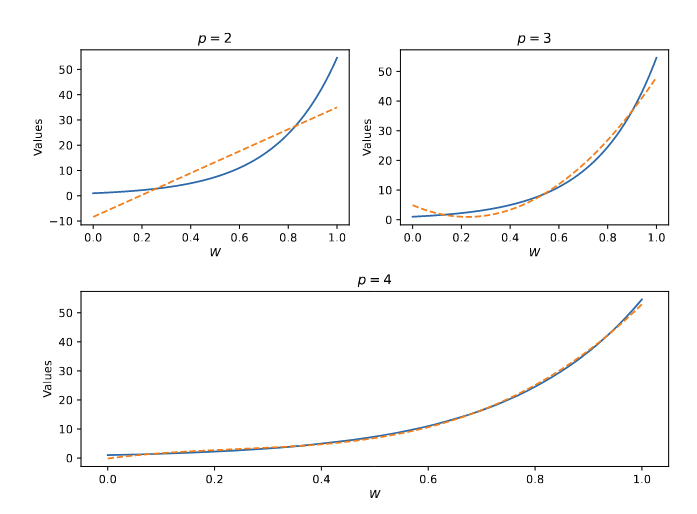

## Statistical Properties of Linear Regression 
In finite samples $(X_i, Y_i)_{i=1}^n$ are i.i.d. random variables, the Ordinary Least Squares (OLS) estimator of $\hat{\beta}$ is given by:
$$
\min_{b\in\mathbb{R}^p} \frac{1}{n}\sum_{i=1}^n (Y_i - b'X_i)^2 
$$
* The first-order condition is $\frac{1}{n}\sum_{i=1}^n (Y_i - b'X_i)X_i = 0$
* Define $\hat{\epsilon}_i:=Y_i-\hat{\beta}'X_i$, then we have 
  $$
  \frac{1}{n}\sum_{i=1}^n \hat{\epsilon}_i X_i = 0
  $$
* The key question is whether $\hat{\beta}$ estimates $\beta$ well.

### Approximation of BLP by OLS 
Intuitively, to estimate each parameter $\beta_j$ we need to have enough variation in $X_j$ (many observations per parameter) to identify the parameter, i.e., $n/p$ should be large enough 

> **Theorem**: (Approximation of BLP by OLS) Under regularity conditions, 
> $$
> \sqrt{E_x(\beta ' X-\hat{\beta}'X)^2} = \sqrt{(\hat{\beta}-\beta)'E_x(X X')(\hat{\beta}-\beta)} \\
> \leq const_p \sqrt{E(\epsilon^2)} \sqrt{\frac{p}{n}} $$
> The inequality holds with probability 1 as $n\to\infty$.

* When $p/n$ is small, the sample BLP approximates the population/true BLP well. 

### Analysis of Variance 
* The ratio of explained variation to the total variation is the **poluation $R^2$**:
$$
R_{pop}^2 = \frac{E[(\hat{\beta}'X)^2]}{E[Y^2]} = 1 -\frac{ E[\epsilon^2]}{E[Y^2]} \in [0,1]
$$
* The sample $R^2$ is defined as:
$$
R_{sample}^2 = 1 - \frac{E_n[\hat{\epsilon}^2]}{E_n[Y^2]} = 1 - \frac{E_n[\hat{\epsilon}^2]}{E_n[Y^2]} \in [0,1]
$$
 > When $p/n$ is small, $R_{sample}^2$ approximates $R_{pop}^2$ well.

### Overfitting Problem
* When $p/n$ is not small, the in-sample BLP becomes misleading 
* Consider $p=n$ and all $X_i$ are independent, we have 
  $$
  MSE_{sample}= 0 \text{ and }R^2_{sample} = 1
  $$
  no matter what $MSE_{pop}$ and $R^2_{pop}$ are. 
* With $p<n$, **adjusted $R^2$** and *adjusted MSE* are: 
  $$
  MSE_{adj} = \frac{n}{n-p} E_n[\hat{\epsilon}^2] \text{ and } R^2_{adj} = 1 - \frac{n}{n-p} \frac{E_n[\hat{\epsilon}^2]}{E_n[Y^2]}
  $$
  > $\frac{n}{n-p}$ corrects for overfitting. The intuition is that the in-sample fit increases as the number of parameters increase and potentially causes overfitting. 

In [33]:
import numpy as np
import statsmodels.api as sm
import warnings
warnings.simplefilter('ignore')

In [56]:
def regression_stats(n, p):
    np.random.seed(123)
    X = np.random.normal(size=(n, p))
    y = np.random.normal(size=(n, 1))
    R2 = sm.OLS(y, X).fit().rsquared
    R2_adj = sm.OLS(y, X).fit().rsquared_adj
    return R2, R2_adj

In [60]:
n = 1000
i = 0  
R2vec = np.zeros(7)
R2_adjvec = np.zeros(7)
# Loop over different values of p
for p in [50, 100, 200, 500, 800, 900, 1000]:
    R2, R2_adj = regression_stats(n, p)
    R2vec[i] = R2
    R2_adjvec[i] = R2_adj
    i = i + 1

Text(0.5, 1.0, 'R2 and R2_adj vs Number of Predictors')

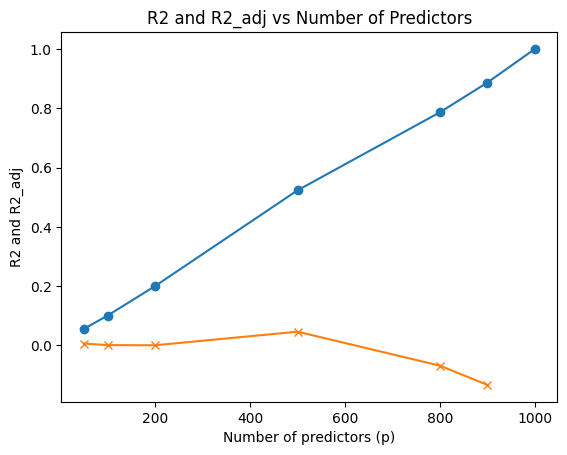

In [67]:
# plot the results
import matplotlib.pyplot as plt
plt.plot([50, 100, 200, 500, 800, 900, 1000], R2vec, "-o",label='R2')
plt.plot([50, 100, 200, 500, 800, 900, 1000], R2_adjvec,"-x", label='R2_adj')
plt.xlabel('Number of predictors (p)')
plt.ylabel('R2 and R2_adj')
plt.title('R2 and R2_adj vs Number of Predictors')

### Sample Splitting 
*Data splitting* is a common practice to measure predictive performance. The idea is as follows:
>    1. Use a **training sample** to estimate the model'
>    2. Use a **test sample** to evaluate the quality of the prediction rule, using $MSE$ and $R^2$

Formally, we define the **data splitting procedure** as:
> 1. *Randomly* partition the data into **training** and **testing** samples: $n$ observations for training and $m$ observations for testing.
> 2. Use the **training sample** to compute a prediction rule $\hat{f}(X)$. e.g., $\hat{f}(X) = \hat{\beta}'X$.
> 3. Use the **testing sample** to compute the prediction error:$MSE_{test}$ and $R^2_{test}$. 

* **Cross-validation** is a more data-efficient evaluation procedure. 
* **Stratified splitting** guarantees that the training and testing samples are similar. 

### Inference 
Let $X = (D, W')'$, where $D$ is the regressor of interest and $W$ other regressors/controls/covariates, we write the model as 
\begin{equation*}
Y = \underbrace{\beta_1 D + \beta_2 W}_{\text{predicted value}}+ \underbrace{\epsilon}_{\text{error}}
\end{equation*}
> The **Frisch-Waugh-Loveall Theorem**: 
> $$
> \beta_1 = argmin_{b1}E[(\tilde{Y}-b_1 \tilde{D})^2] =(E[\tilde{D}^2])^{-1}E[\tilde{D}\tilde{Y}]
> $$
> where $\tilde{Y}$ and $\tilde{D}$ are the residuals of $Y$ and $D$ after regressing on $W$.



> **Inference**: Under regularity conditions and if $p/n \approx 0$: 
> $$
> \sqrt{n}(\hat{\beta_1}-\beta_1) \xrightarrow{d} N(0, (E[\tilde{D}^2])^{-1}E[\tilde{D}^2\tilde{\epsilon}^2]E[\tilde{D}^2])^{-1})
> $$

* Then the 95% confidence interval can be constructed as:
$$
\left [\hat{\beta_1} - 1.96 \sqrt{\hat{V}/n} , \hat{\beta_1} + 1.96 \sqrt{\hat{V}/n}\right]
$$

## Application: Wage Prediction
In labor economics an important question is what determines the wage of workers. This is a causal question, but we could begin to investigate from a predictive perspective.

In the following wage example,  𝑌  is the `(log) hourly wage of a worker` and  𝑋  is a vector of `worker's characteristics`, e.g., education, experience, sex. Two main questions here are:

* How to use job-relevant characteristics, such as education and experience, to best predict wages?

* What is the difference in predicted wages between male and female workers with the same job-relevant characteristics?

In this lab, we focus on the prediction question first.

## Data

The data set we consider is from the March Supplement of the U.S. Current Population Survey, year 2015. 
* We select white non-hispanic individuals, aged 25 to 64 years, and working more than 35 hours per week during at least 50 weeks of the year. 
* We exclude self-employed workers; individuals living in group quarters; individuals in the military, agricultural or private household sectors; individuals with inconsistent reports on earnings and employment status; individuals with allocated or missing information in any of the variables used in the analysis; and individuals with hourly wage below  3 .

* The variable of interest  𝑌  is the (log) hourly wage rate constructed as the `ratio of the annual earnings to the total number of hours worked`, which is constructed in turn as the product of number of weeks worked and the usual number of hours worked per week. 
* Focus on single (never married) workers. The final sample is of size  $n=5150$ .

In [35]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import sklearn.linear_model as lm
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import warnings
# ignore potential convergence warnings; for some small penalty levels,
# tried out, optimization might not converge
warnings.simplefilter('ignore')

## Data Analysis

In [36]:
file = "https://raw.githubusercontent.com/CausalAIBook/MetricsMLNotebooks/main/data/wage2015_subsample_inference.csv"
df = pd.read_csv(file)
df.describe()

,wage,lwage,sex,shs,hsg,scl,clg,ad,mw,so,we,ne,exp1,exp2,exp3,exp4,occ,occ2,ind,ind2
count,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000
mean,23.410410,2.970787,0.444466,0.023301,0.243883,0.278058,0.317670,0.137087,0.259612,0.296505,0.216117,0.227767,13.760583,3.018925,8.235867,25.118038,5310.737476,11.670874,6629.154951,13.316893
std,21.003016,0.570385,0.496955,0.150872,0.429465,0.448086,0.465616,0.343973,0.438464,0.456761,0.411635,0.419432,10.609465,4.000904,14.488962,53.530225,11874.356080,6.966684,5333.443992,5.701019
min,3.021978,1.105912,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,1.000000,370.000000,2.000000
25%,13.461538,2.599837,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.250000,0.125000,0.062500,1740.000000,5.000000,4880.000000,9.000000
50%,19.230769,2.956512,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,1.000000,1.000000,1.000000,4040.000000,13.000000,7370.000000,14.000000
75%,27.777778,3.324236,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,21.000000,4.410000,9.261000,19.448100,5610.000000,17.000000,8190.000000,18.000000
max,528.845673,6.270697,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,47.000000,22.090000,103.823000,487.968100,100000.000000,22.000000,100000.000000,22.000000


### Variable Construction and Regression

We are constructing the output variable  $Y$  and the matrix  $Z$  which includes the characteristics of workers

In [37]:
Y = np.log(df['wage'])
Z = df.drop(['wage', 'lwage'], axis=1)
Z.shape

(5150, 18)

For the outcome variable (log) wage and a subset of the raw regressors, we calculate the empirical mean and other empirical measures to get familiar with the data.



In [38]:
Z.describe()

,sex,shs,hsg,scl,clg,ad,mw,so,we,ne,exp1,exp2,exp3,exp4,occ,occ2,ind,ind2
count,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000
mean,0.444466,0.023301,0.243883,0.278058,0.317670,0.137087,0.259612,0.296505,0.216117,0.227767,13.760583,3.018925,8.235867,25.118038,5310.737476,11.670874,6629.154951,13.316893
std,0.496955,0.150872,0.429465,0.448086,0.465616,0.343973,0.438464,0.456761,0.411635,0.419432,10.609465,4.000904,14.488962,53.530225,11874.356080,6.966684,5333.443992,5.701019
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,1.000000,370.000000,2.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.250000,0.125000,0.062500,1740.000000,5.000000,4880.000000,9.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,1.000000,1.000000,1.000000,4040.000000,13.000000,7370.000000,14.000000
75%,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,21.000000,4.410000,9.261000,19.448100,5610.000000,17.000000,8190.000000,18.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,47.000000,22.090000,103.823000,487.968100,100000.000000,22.000000,100000.000000,22.000000


E.g., the share of female workers in our sample is ~44% ( 𝑠𝑒𝑥=1  if female).

In [39]:
# if you want to print this table to latex
# print(Z.describe().style.to_latex())

## Prediction Question
Now, we will construct a prediction rule for hourly (log) wage  $Y$, which depends linearly on job-relevant characteristics  $X$:
$$
Y = \beta'X + \epsilon
$$
where  $X$  is a vector of characteristics of the worker, including `Female`,  `Some High School`, `High School Graduate`, `Some College`, `College Graduate`, `Advanced Degree`,  `Experience`.

Our goals are:

* Predict wages using various characteristics of workers.

* Assess the predictive performance of a given model using the (adjusted) sample MSE, the (adjusted) sample $R^2$ and the out-of-sample MSE and $R^2$.

### Measuring Prediction Quality
Toward answering the latter, we measure the prediction quality of the two models via **data splitting**:

- Randomly split the data into one training sample and one testing sample. Here we just use a simple method (stratified splitting is a more sophisticated version of splitting that we might consider).
- Use the training sample to estimate the parameters of the Basic Model and the Flexible Model.
- Before using the testing sample, we evaluate in-sample fit.


In [40]:
# split the data into train and test sets
# 80% train, 20% test   
# set random_state to ensure reproducibility
train, test = train_test_split(df, test_size=0.20, random_state=123)


We employ two different specifications for prediction:


1. **Basic Model**:   $X$ consists of a set of raw regressors (e.g. gender, experience, education indicators,  occupation and industry indicators and regional indicators).


2. **Flexible Model**:  $X$ consists of all raw regressors from the basic model plus a *dictionary of transformations** (e.g., ${exp}^2$ and ${exp}^3$) and additional two-way interactions of a polynomial in experience with other regressors. An example of a regressor created through a two-way interaction is *experience* times the indicator of having a *college degree*.

* Using the **Flexible Model** enables us to approximate the real relationship by a more complex regression model and therefore to reduce the bias. 
  
* The **Flexible Model** increases the range of potential shapes of the estimated regression function. In general, flexible models often deliver higher prediction accuracy but are harder to interpret.

## Data-Splitting: In-sample performance

Let us fit both models to our data by running ordinary least squares (ols):

In [41]:
# 1. Basic Model
model_base = 'lwage ~ sex + exp1 + shs + hsg+ scl + clg + mw + so + we + C(occ2) + C(ind2)'
base = smf.ols(model_base, data=train)
results_base = base.fit()

In [42]:
# R-squared and MSE for the basic model
rsquared_base = results_base.rsquared
rsquared_adj_base = results_base.rsquared_adj
mse_base = np.mean(results_base.resid**2)
mse_adj_base = results_base.mse_resid
print(f'Rsquared={rsquared_base:.4f}')
print(f'Rsquared_adjusted={rsquared_adj_base:.4f}')
print(f'MSE={mse_base:.4f}')
print(f'MSE_adjusted={mse_adj_base:.4f}')

Rsquared=0.3176
Rsquared_adjusted=0.3092
MSE=0.2202
MSE_adjusted=0.2229


In [43]:
# verify the formulas
X, y = base.data.exog, base.data.endog
n, p = X.shape
mse = np.mean((y - results_base.predict(X, transform=False))**2)
mse_adj = mse * n / (n - p)
rsquared = 1 - mse / np.var(y)
rsquared_adj = 1 - mse_adj / np.var(y)
print(f'Rsquared={rsquared:.4f}')
print(f'Rsquared_adjusted={rsquared_adj:.4f}')
print(f'MSE={mse:.4f}')
print(f'MSE_adjusted={mse_adj:.4f}')

Rsquared=0.3176
Rsquared_adjusted=0.3091
MSE=0.2202
MSE_adjusted=0.2229


In [44]:
# 2. Flexible Model
model_flex = ('lwage ~ sex + shs+hsg+scl+clg+C(occ2)+C(ind2)+mw+so+we '
              '+ (exp1+exp2+exp3+exp4)*(shs+hsg+scl+clg+C(occ2)+C(ind2)+mw+so+we)')
flex = smf.ols(model_flex, data=train)
results_flex = flex.fit()

In [45]:
rsquared_flex = results_flex.rsquared
rsquared_adj_flex = results_flex.rsquared_adj
mse_flex = np.mean(results_flex.resid**2)
mse_adj_flex = results_flex.mse_resid
print(f'Rsquared={rsquared_flex:.4f}')
print(f'Rsquared_adjusted={rsquared_adj_flex:.4f}')
print(f'MSE={mse_flex:.4f}')
print(f'MSE_adjusted={mse_adj_flex:.4f}')

Rsquared=0.3643
Rsquared_adjusted=0.3241
MSE=0.2051
MSE_adjusted=0.2181


In [46]:
# make a table of results for two models
results = pd.DataFrame({
    'Model': ['Baseline', 'Flexible'],
    'R2': [rsquared_base, rsquared_flex],
    'R2_adj': [rsquared_adj_base, rsquared_adj_flex],
    'MSE': [mse_base, mse_flex],
    'MSE_adj': [mse_adj_base, mse_adj_flex]
})
results = results.set_index('Model')
# print the table to html
print(results)

                R2    R2_adj       MSE   MSE_adj
Model                                           
Baseline  0.317622  0.309237  0.220187  0.222947
Flexible  0.364346  0.324146  0.205110  0.218135


### Inference
#### Impact of Gender on Wages 
**Question**: What is the difference in predicted wages between male and female workers with the same job-relevant characteristics?
we consider the following log-linear regression model

\begin{align*} \log(Y) &= \beta'X + \epsilon\\ &= \beta_1 D + \beta_2' W + \epsilon, \end{align*}
* $D$ is the indicator of being female ($1$ if female and $0$ otherwise) and the $W$'s are controls explaining variation in wages. 
* Considering transformed wages by the logarithm, we are analyzing the relative difference in the payment of male and female workers.


In [47]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
import sys
from sklearn.base import BaseEstimator
import warnings
# ignore potential convergence warnings; for some small
# penalty levels, tried out, optimization might not converge
warnings.simplefilter('ignore')

In [48]:
#descriptive statistics for wage gaps of sex
table = pd.DataFrame()
cols = ["lwage", "sex", "shs", "hsg", "scl",
        "clg", "ad", "ne", "mw", "so", "we", "exp1"]
table['Variable'] = ["Log Wage", "Sex", "Less then High School",
                     "High School Graduate", "Some College",
                     "Gollage Graduate", "Advanced Degree",
                     "Northeast", "Midwest", "South", "West", "Experience"]
table['All'] = df[cols].mean().values
table['Male'] = df[df['sex'] == 0][cols].mean().values
table['Female'] = df[df['sex'] == 1][cols].mean().values
# Show results
table

,Variable,All,Male,Female
0,Log Wage,2.970787,2.987830,2.949485
1,Sex,0.444466,0.000000,1.000000
2,Less then High School,0.023301,0.031807,0.012669
3,High School Graduate,0.243883,0.294303,0.180865
4,Some College,0.278058,0.273331,0.283967
5,Gollage Graduate,0.317670,0.293953,0.347313
6,Advanced Degree,0.137087,0.106606,0.175186
7,Northeast,0.227767,0.221950,0.235037
8,Midwest,0.259612,0.259000,0.260376
9,South,0.296505,0.298148,0.294452


In [49]:
# compute the wage difference 
table.loc[0, 'Female'] - table.loc[0, 'Male']

-0.03834473367441449

#### Unconditional Effect of Sex 
The unconditional wage gap is about  $3.8\%$ for the group of never married workers (female workers get paid less on average in our sample). 

This unconditional (predictive) effect of sex equals the coefficient  $\beta$  in the univariate ols regression of  $Y$  on  $D$ :

$$
log(Y)=\beta D+\epsilon.
$$

We verify this by running an ols regression.

In [50]:
# regression without controls with robust standard errors
nocontrol_fit = smf.ols("lwage ~ sex", data=df).fit()
nocontrol_est = nocontrol_fit.params['sex']
nocontrol_se = nocontrol_fit.HC3_se['sex']

print(f"The estimated sex coefficient is: {nocontrol_est:.4f} ")
print(f"and the corresponding robust standard error is: {nocontrol_se:.4f}")

The estimated sex coefficient is: -0.0383 
and the corresponding robust standard error is: 0.0159


#### Regression with Covariates 
We run an ols regression of  $Y$  on  $(D,W)$  to control for the effect of covariates summarized in  $W$ :

$$
log(Y)=\beta_1 D + \beta_2' W + \epsilon.
$$

Here $W$ controls for `experience`, `education`, `region`, and `occupation` and `industry indicators` plus transformations and two-way interactions.

In [51]:
# Ols regression with controls
flex = "lwage ~ sex + (exp1+exp2+exp3+exp4)*(shs+hsg+scl+clg+C(occ2)+C(ind2)+mw+so+we)"
# Note that ()*() operation in formula objects in statsmodels
# creates a formula of the sort:
#  (exp1+exp2+exp3+exp4)+ (shs+hsg+scl+clg+occ2+ind2+mw+so+we)
#  + (exp1+exp2+exp3+exp4)*(shs+hsg+scl+clg+occ2+ind2+mw+so+we)
control_fit = smf.ols(flex, data=df).fit()
control_est = control_fit.params['sex']
control_se = control_fit.HC3_se['sex']
control_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  lwage   R-squared:                       0.351
Model:                            OLS   Adj. R-squared:                  0.319
Method:                 Least Squares   F-statistic:                     10.83
Date:                Tue, 22 Apr 2025   Prob (F-statistic):          2.69e-305
Time:                        07:20:36   Log-Likelihood:                -3301.9
No. Observations:                5150   AIC:                             7096.
Df Residuals:                    4904   BIC:                             8706.
Df Model:                         245                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              3.8603      0.429      9.006      0.000       3.020       4.701
C(occ2)[T.2]           0.1613      0.130      1.244      0.214      -0.093       0.416
C(occ2)[T.3]           0.2102      0.169      1.246      0.213      -0.121       0.541
C(occ2)[T.4]           0.0709      0.184      0.386      0.700      -0.289       0.431
C(occ2)[T.5]          -0.3960      0.189     -2.100      0.036      -0.766      -0.026
C(occ2)[T.6]          -0.2311      0.187     -1.236      0.217      -0.598       0.135
C(occ2)[T.7]           0.3147      0.194      1.621      0.105      -0.066       0.695
C(occ2)[T.8]          -0.1875      0.169     -1.108      0.268      -0.519       0.144
C(occ2)[T.9]          -0.3390      0.167     -2.027      0.043      -0.667      -0.011
C(occ2)[T.10]          0.0210      0.156      0.134      0.893      -0.286       0.328
C(occ2)[T.11]         -0.6424      0.309     -2.078      0.038      -1.248      -0.036
C(occ2)[T.12]         -0.0675      0.252     -0.268      0.789      -0.562       0.427
C(occ2)[T.13]         -0.2330      0.232     -1.006      0.314      -0.687       0.221
C(occ2)[T.14]          0.2562      0.323      0.794      0.427      -0.376       0.889
C(occ2)[T.15]         -0.1939      0.260     -0.747      0.455      -0.703       0.315
C(occ2)[T.16]         -0.0551      0.147     -0.375      0.708      -0.343       0.233
C(occ2)[T.17]         -0.4156      0.136     -3.053      0.002      -0.682      -0.149
C(occ2)[T.18]         -0.4822      1.044     -0.462      0.644      -2.530       1.565
C(occ2)[T.19]         -0.2579      0.333     -0.776      0.438      -0.910       0.394
C(occ2)[T.20]         -0.3010      0.234     -1.286      0.199      -0.760       0.158
C(occ2)[T.21]         -0.4272      0.221     -1.936      0.053      -0.860       0.005
C(occ2)[T.22]         -0.8695      0.298     -2.922      0.003      -1.453      -0.286
C(ind2)[T.3]          -1.2474      0.645     -1.932      0.053      -2.513       0.018
C(ind2)[T.4]          -0.0948      0.464     -0.205      0.838      -1.004       0.814
C(ind2)[T.5]          -0.5294      0.435     -1.218      0.223      -1.381       0.323
C(ind2)[T.6]          -0.6222      0.435     -1.431      0.152      -1.474       0.230
C(ind2)[T.7]          -0.5047      0.502     -1.005      0.315      -1.490       0.480
C(ind2)[T.8]          -0.7295      0.467     -1.561      0.119      -1.646       0.187
C(ind2)[T.9]          -0.8025      0.425     -1.887      0.059      -1.636       0.031
C(ind2)[T.10]         -0.5806      0.481     -1.207      0.227      -1.523       0.362
C(ind2)[T.11]         -0.9852      0.448     -2.198      0.028      -1.864      -0.107
C(ind2)[T.12]         -0.7376      0.424     -1.738      0.082      -1.569       0.094
C(ind2)[T.13]         -1.0183      0.4

In [52]:
print(f"The estimated sex coefficient: {control_est:.4f} ")
print(f"The corresponding robust standard error: {control_se:.4f}")

The estimated sex coefficient: -0.0696 
The corresponding robust standard error: 0.0157


* The estimated regression coefficient  $\beta_1≈-0.06955$  measures how our linear prediction of wage changes if we set the sex variable  $D$  from 0 to 1, holding the controls  $W$  fixed. 

* We can call this the predictive effect (PE), as it measures the impact of a variable on the prediction we make. 
  
* The unconditional wage gap of size  4 \% for female workers increases to about  7 \% after controlling for worker characteristics.

We now show how the conditional gap and the remainder decompose the marginal wage gap into the parts explained and unexplained by the additional controls.

In [53]:
flex_without_sex = "lwage ~ (exp1+exp2+exp3+exp4)*(shs+hsg+scl+clg+C(occ2)+C(ind2)+mw+so+we)"
lm0 = smf.ols(flex_without_sex, data=df[df["sex"] == 0])
lm1 = smf.ols(flex_without_sex, data=df[df["sex"] == 1])
XX0 = lm0.exog #explantory variables beta_hat*X
y0 = lm0.endog #y_hat 
XX1 = lm1.exog
y1 = lm1.endog
# the coefficients excluding intercept and "sex"
betarest = control_fit.params[control_fit.params.index != "sex"][1:]
print("The marginal gap:", y1.mean() - y0.mean())
diff_unexplained = control_est
print("The unexplained difference: ", diff_unexplained)
diff_explained = betarest.dot(XX1.mean(0)[1:] - XX0.mean(0)[1:])
print("The explained difference:", diff_explained)
print("The sum of these differences:", diff_unexplained + diff_explained)

The marginal gap: -0.03834473367441449
The unexplained difference:  -0.06955320329684066
The explained difference: 0.031208469622388935
The sum of these differences: -0.03834473367445172


To understand the estimate, we can take average for the male and female groups:
\begin{align*}
\underbrace{E_n[Y|D=1] - E_n[Y|D=0]}_{-0.038} &= \\
\underbrace{\hat{\beta}_1}_{-0.070} + &\underbrace{\hat{\beta}'_2(E_n(W|D=1)-E_n(W|D=0))}_{0.031}
\end{align*}

* $E_n(\cdot)$ is the sample average 

### Oaxaca-Blinder Decomposition 
We can augment the original model by adding interaction of sex and other characteristics:
$$
Y = \beta_1 D + \beta_2' W + \beta_3'W\cdot D + \epsilon 
$$
This provides an alternative decomposition:

\begin{align*}
\underbrace{E_n[Y|D=1] - E_n[Y|D=0]}_{-0.038} &= \\
\underbrace{\hat{\beta}_1}_{-2.320} + \underbrace{\hat{\beta}'_2(E_n(W|D=1)-E_n(W|D=0))}_{0.002} & +\underbrace{\hat{\beta}_3' E_n[W|D=1]}_{2.280}
\end{align*}

* Attributed to difference in $W$: `0.002`
* Attributed to different predictive effect of $W$: `2.280`
* Unexplained difference: `-2.320` 

In [54]:
# The oaxaca decomposition
u1, s1, v1 = np.linalg.svd(XX1)
u0, s0, v0 = np.linalg.svd(XX0)
s1[s1 <= 1e-10] = 0
s1[s1 > 1e-10] = 1 / s1[s1 > 1e-10]
beta1 = (s1 * s1 * v1.T).dot(v1).dot(XX1.T).dot(y1)
s0[s0 <= 1e-10] = 0
s0[s0 > 1e-10] = 1 / s0[s0 > 1e-10]
beta0 = (s0 * s0 * v0.T).dot(v0).dot(XX0.T).dot(y0)
print("The marginal gap: ", y1.mean() - y0.mean())
diff_unexplained = beta1[0] - beta0[0]
print("The unexplained difference: ", diff_unexplained)
diff_endow = beta0.dot(XX1.mean(0) - XX0.mean(0))
print("The difference explained by covariates: ", diff_endow)
diff_coeff = (beta1[1:] - beta0[1:]).dot(XX1.mean(0)[1:])
print("The difference explained by interaction: ", diff_coeff)
print("The sum of these differences: ", diff_unexplained + diff_endow + diff_coeff)

The marginal gap:  -0.03834473367441449
The unexplained difference:  -2.3202078245207662
The difference explained by covariates:  0.0015954716257246097
The difference explained by interaction:  2.2802675893099984
The sum of these differences:  -0.03834476358504313


### Partialling-Out using Frisch-Waugh-Lovell Theorem 

We can partial-out the linear effect of the controls via OLS through the following procedures:
1. Regress $Y$ on the controls $W$ to get $\tilde{Y}$;
   
2. Regress $X$ on the controls $W$ to get $\tilde{X}$;

3. Regress $\tilde{Y}$ on $\tilde{X}$

In [68]:
# Partialling-Out using ols
# models
flex_y = "lwage ~  (exp1+exp2+exp3+exp4)*(shs+hsg+scl+clg+C(occ2)+C(ind2)+mw+so+we)"  # model for Y
flex_d = "sex ~ (exp1+exp2+exp3+exp4)*(shs+hsg+scl+clg+C(occ2)+C(ind2)+mw+so+we)"  # model for D
# partialling-out the linear effect of W from Y
t_Y = smf.ols(flex_y, data=df).fit().resid
# partialling-out the linear effect of W from D
t_D = smf.ols(flex_d, data=df).fit().resid
# regression of Y on D after partialling-out the effect of W
partial_fit = sm.OLS(t_Y, t_D).fit()
partial_est = partial_fit.params['x1']
print("Coefficient for D via partialling-out " + str(partial_est))
# standard error
partial_se = partial_fit.HC3_se['x1']
# confidence interval
print("95% CI: " + str(partial_fit.conf_int().values[0]))

Coefficient for D via partialling-out -0.06955320329684576
95% CI: [-0.09866859 -0.04043781]


In [69]:
print(f"The estimated sex coefficient is {partial_est:.4f} "
      f"and the corresponding robust standard error is {partial_se:.4f}")

The estimated sex coefficient is -0.0696 and the corresponding robust standard error is 0.0150


* The estimated coefficient measures the linear predictive effect (PE) of  $D$  on  $Y$  after taking out the linear effect of  $W$  on both of these variables.
  
* The partialling-out approach works well when the dimension of $W$ is low in relation to the sample size  $n$ . When the dimension of  $W$  is relatively high, we need to use variable selection or penalization for regularization purposes.

### OLS Overfitting Problem

We try an "extra" flexible model, where we take interactions of all controls, giving us about 1000 controls. To illustrate how OLS can overfit, we subset to the first 1000 observations so that $p \approx n$.

In [72]:
subset, test = train_test_split(df, train_size=1000, random_state=2724)
# model
extraflex = "lwage ~ sex + (exp1+exp2+exp3+exp4+shs+hsg+scl+clg+C(occ2)+C(ind2)+mw+so+we)**2"
control_fit_extra = smf.ols(extraflex, data=subset).fit()
control_extra_est = control_fit_extra.params['sex']
R2 = control_fit_extra.rsquared
R2_adj = control_fit_extra.rsquared_adj
n = subset.shape[0]
p = control_fit_extra.params.shape[0]
# Jackknife. Python regularizes in the background. Theory shouldn't really work here.
# Cattaneo, Jannson, and Newey (2018) (CJN) do verify that jackknife is valid,
# in the sense of being upward biased, in high-dimensional settings under
# regularity.
control_extra_se = control_fit_extra.HC3_se["sex"]
# HC0 will not work here. CJN show it is inconsistent even
# in moderate dimensional settings.
control_extra_se_HC0 = control_fit_extra.HC0_se["sex"]
# We should probably implement Cattaneo, Jannson, and Newey (2018)'s procedure -
# though it's not clear their regularity conditions would apply here anyway.
print("Number of Extra-Flex Controls: " + str(p - 1))
print("Coefficient of sex with extra flex controls: " + str(control_extra_est))
print("R-squared: " + str(R2))
print("R-squared adjusted: " + str(R2_adj))

Number of Extra-Flex Controls: 979
Coefficient of sex with extra flex controls: -0.0735508763751175
R-squared: 0.7607517491390923
R-squared adjusted: 0.3791973958180602
